Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [10]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from metrics import print_evaluation_metrics

Load dataset

In [11]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column, 'New_cases_yesterday']]
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
dates = df.index.values

Create model

In [12]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


In [13]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [14]:
print(model_lists["univariate"])

['FFT', 'ConstantNaive', 'SeasonalNaive', 'DatepartRegression', 'ARCH', 'LastValueNaive', 'KalmanStateSpace', 'NeuralProphet', 'ARDL', 'MLEnsemble', 'PreprocessingRegression', 'Theta', 'MetricMotif', 'SeasonalityMotif', 'UnivariateMotif', 'ARIMA', 'UnobservedComponents', 'ETS', 'GLM', 'UnivariateRegression', 'FBProphet', 'GLS', 'AverageValueNaive']


Train test split, fit and prediction

In [15]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]
model.fit(train)
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04210D+00    |proj g|=  6.13241D-02


 This problem is unconstrained.



At iterate    1    f=  9.03609D+00    |proj g|=  5.31338D-02

At iterate    2    f=  9.03219D+00    |proj g|=  2.61606D-02

At iterate    3    f=  9.03032D+00    |proj g|=  2.00666D-02

At iterate    4    f=  9.02794D+00    |proj g|=  2.15335D-02

At iterate    5    f=  9.02458D+00    |proj g|=  2.32838D-02

At iterate    6    f=  9.02077D+00    |proj g|=  3.53904D-02

At iterate    7    f=  9.01609D+00    |proj g|=  5.21585D-02

At iterate    8    f=  9.00853D+00    |proj g|=  5.49024D-02

At iterate    9    f=  9.00228D+00    |proj g|=  1.34950D-01

At iterate   10    f=  8.99815D+00    |proj g|=  5.76993D-02

At iterate   11    f=  8.99585D+00    |proj g|=  3.89188D-02

At iterate   12    f=  8.99397D+00    |proj g|=  3.04762D-02

At iterate   13    f=  8.99122D+00    |proj g|=  2.51368D-02

At iterate   14    f=  8.98884D+00    |proj g|=  3.55730D-02

At iterate   15    f=  8.98664D+00    |proj g|=  4.17289D-02

At iterate   16    f=  8.98501D+00    |proj g|=  2.17169D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.43838D+01    |proj g|=  1.73525D-01

At iterate    3    f=  1.43556D+01    |proj g|=  7.15064D-02

At iterate    4    f=  1.43484D+01    |proj g|=  3.52266D-02

At iterate    5    f=  1.43412D+01    |proj g|=  4.69778D-02

At iterate    6    f=  1.43161D+01    |proj g|=  8.77468D-02

At iterate    7    f=  1.43056D+01    |proj g|=  6.06023D-02

At iterate    8    f=  1.42986D+01    |proj g|=  1.23822D-01

At iterate    9    f=  1.42959D+01    |proj g|=  7.36479D-02

At iterate   10    f=  1.42900D+01    |proj g|=  9.63115D-02

At iterate   11    f=  1.42881D+01    |proj g|=  1.12182D-01

At iterate   12    f=  1.42839D+01    |proj g|=  4.45253D-02

At iterate   13    f=  1.42807D+01    |proj g|=  7.04345D-02

At iterate   14    f=  1.42778D+01    |proj g|=  5.50331D-02

At iterate   15    f=  1.42766D+01    |proj g|=  2.76282D-02

At iterate   16    f=  1.42757D+01    |proj g|=  2.09561D-02

At iterate   17    f=  1.42742D+01    |proj g|=  1.86663D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5
Epoch 1/50
36/36 [==============================] - 8s 6ms/step - loss: 0.4107
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 0.4064
Epoch 3/50
36/36 [==============================] - 0s 8ms/step - loss: 0.4035
Epoch 4/50
36/36 [==============================] - 0s 5ms/step - loss: 0.4014
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 0.4011
Epoch 6/50
36/36 [==============================] - 0s 6ms/step - loss: 0.4006
Epoch 7/50
36/36 [==============================] - 0s 10ms/step - loss: 0.4035
Epoch 8/50
36/36 [==============================] - 0s 11ms/step - loss: 0.3976
Epoch 9/50
36/36 [==============================] - 0s 10ms/step - loss: 0.3979
Epoch 10/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3955
Epoch 11/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3967
Epoch 12/50
36/36 [==============================] - 0s 8ms

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 77 with model FFT in generation 0 of 5
Model Number: 78 with model SeasonalNaive in generation 0 of 5
Model Number: 79 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 79 in generation 0: PreprocessingRegression
Model Number: 80 with model LastValueNaive in generation 0 of 5
Model Number: 81 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.55595D+00    |proj g|=  9.57398D-01


 This problem is unconstrained.



At iterate    1    f=  9.46072D+00    |proj g|=  7.38123D-01

At iterate    2    f=  9.21568D+00    |proj g|=  1.42225D-01

At iterate    3    f=  9.20056D+00    |proj g|=  1.06341D-01

At iterate    4    f=  9.18383D+00    |proj g|=  6.90201D-02

At iterate    5    f=  9.16897D+00    |proj g|=  5.05223D-02

At iterate    6    f=  9.13991D+00    |proj g|=  6.02169D-02

At iterate    7    f=  9.12765D+00    |proj g|=  6.31872D-02

At iterate    8    f=  9.12152D+00    |proj g|=  2.56195D-02

At iterate    9    f=  9.11698D+00    |proj g|=  1.66391D-02

At iterate   10    f=  9.11465D+00    |proj g|=  1.96870D-02

At iterate   11    f=  9.11282D+00    |proj g|=  2.88023D-02

At iterate   12    f=  9.11116D+00    |proj g|=  1.75145D-02

At iterate   13    f=  9.11047D+00    |proj g|=  9.42457D-03

At iterate   14    f=  9.10980D+00    |proj g|=  1.10089D-02

At iterate   15    f=  9.10849D+00    |proj g|=  1.52273D-02

At iterate   16    f=  9.10784D+00    |proj g|=  2.09301D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48282D+01    |proj g|=  1.02101D+00


 This problem is unconstrained.



At iterate    1    f=  1.47117D+01    |proj g|=  1.04664D+00

At iterate    2    f=  1.44429D+01    |proj g|=  2.02145D-01

At iterate    3    f=  1.44162D+01    |proj g|=  1.47612D-01

At iterate    4    f=  1.43922D+01    |proj g|=  7.93279D-02

At iterate    5    f=  1.43802D+01    |proj g|=  4.19118D-02

At iterate    6    f=  1.43684D+01    |proj g|=  2.06876D-02

At iterate    7    f=  1.43657D+01    |proj g|=  5.51866D-02

At iterate    8    f=  1.43631D+01    |proj g|=  4.52226D-02

At iterate    9    f=  1.43621D+01    |proj g|=  1.42041D-02

At iterate   10    f=  1.43612D+01    |proj g|=  1.04262D-02

At iterate   11    f=  1.43596D+01    |proj g|=  2.45846D-02

At iterate   12    f=  1.43584D+01    |proj g|=  1.46808D-02

At iterate   13    f=  1.43579D+01    |proj g|=  4.67062D-02

At iterate   14    f=  1.43564D+01    |proj g|=  9.95754D-03

At iterate   15    f=  1.43561D+01    |proj g|=  8.07642D-03

At iterate   16    f=  1.43555D+01    |proj g|=  5.88774D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72960704056235.7, tolerance: 16704715128.668526
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 85 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 85 in generation 0: ARCH
Model Number: 86 with model UnivariateRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/impute.py:54: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 86 in generation 0: UnivariateRegression
Model Number: 87 with model UnivariateMotif in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 87 in generation 0: UnivariateMotif
Model Number: 88 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 88 in generation 0: ARCH
Model Number: 89 with model KalmanStateSpace in generation 0 of 5
Model Number: 90 with model AverageValueNaive in generation 0 of 5
Model Number: 91 with model GLS in generation 0 of 5
Model Number: 92 with model AverageValueNaive in generation 0 of 5
Model Number: 93 with model ConstantNaive in generation 0 of 5
Model Number: 94 with model KalmanStateSpace in generation 0 of 5
Model Number: 95 with model MLEnsemble in generation 0 of 5
Model Number: 96 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.



At iterate    1    f=  6.05349D+00    |proj g|=  2.95115D-01

At iterate    2    f=  6.02135D+00    |proj g|=  1.01959D-01

At iterate    3    f=  6.01259D+00    |proj g|=  6.26949D-02

At iterate    4    f=  6.00982D+00    |proj g|=  3.18171D-02

At iterate    5    f=  6.00751D+00    |proj g|=  2.53060D-02

At iterate    6    f=  5.99951D+00    |proj g|=  9.35272D-02

At iterate    7    f=  5.99839D+00    |proj g|=  1.01759D-01

At iterate    8    f=  5.99235D+00    |proj g|=  8.45334D-02

At iterate    9    f=  5.98745D+00    |proj g|=  1.80187D-02

At iterate   10    f=  5.98701D+00    |proj g|=  5.34418D-03

At iterate   11    f=  5.98696D+00    |proj g|=  2.52822D-03

At iterate   12    f=  5.98695D+00    |proj g|=  1.37648D-03

At iterate   13    f=  5.98695D+00    |proj g|=  1.80562D-03

At iterate   14    f=  5.98694D+00    |proj g|=  2.53123D-03

At iterate   15    f=  5.98690D+00    |proj g|=  5.51153D-03

At iterate   16    f=  5.98685D+00    |proj g|=  8.75563D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16259D+01    |proj g|=  1.53112D+00

At iterate    1    f=  1.09533D+01    |proj g|=  1.68252D-01

At iterate    2    f=  1.09390D+01    |proj g|=  1.46855D-01

At iterate    3    f=  1.09080D+01    |proj g|=  4.49824D-02

At iterate    4    f=  1.09066D+01    |proj g|=  1.65185D-02

At iterate    5    f=  1.09064D+01    |proj g|=  1.33862D-02


 This problem is unconstrained.



At iterate    6    f=  1.09054D+01    |proj g|=  1.60524D-02

At iterate    7    f=  1.09048D+01    |proj g|=  1.79106D-02

At iterate    8    f=  1.09033D+01    |proj g|=  4.06178D-02

At iterate    9    f=  1.09014D+01    |proj g|=  1.50337D-02

At iterate   10    f=  1.09001D+01    |proj g|=  1.79476D-02

At iterate   11    f=  1.08993D+01    |proj g|=  1.64668D-02

At iterate   12    f=  1.08984D+01    |proj g|=  1.17366D-02

At iterate   13    f=  1.08979D+01    |proj g|=  2.66514D-02

At iterate   14    f=  1.08972D+01    |proj g|=  4.73192D-02

At iterate   15    f=  1.08966D+01    |proj g|=  1.57585D-02

At iterate   16    f=  1.08964D+01    |proj g|=  1.73415D-02

At iterate   17    f=  1.08962D+01    |proj g|=  5.45328D-03

At iterate   18    f=  1.08959D+01    |proj g|=  8.24663D-03

At iterate   19    f=  1.08958D+01    |proj g|=  2.25685D-02

At iterate   20    f=  1.08957D+01    |proj g|=  5.44640D-03

At iterate   21    f=  1.08956D+01    |proj g|=  7.70896D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 98 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 98 in generation 0: MetricMotif
Model Number: 99 with model FBProphet in generation 0 of 5
Model Number: 100 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 100 in generation 0: ARCH
Model Number: 101 with model LastValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 101 in generation 0: LastValueNaive
Model Number: 102 with model SeasonalityMotif in generation 0 of 5
Model Number: 103 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 21') in model 103 in generation 0: MLEnsemble
Model Number: 104 with model The

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185687323692382.44, tolerance: 53517565670.40542
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 139 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 139 in generation 0: PreprocessingRegression
Model Number: 140 with model SeasonalityMotif in generation 0 of 5
Model Number: 141 with model FBProphet in generation 0 of 5
Model Number: 142 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 142 in generation 0: DatepartRegression
Model Number: 143 with model MetricMotif in generation 0 of 5
Model Number: 144 with model AverageValueNaive in generation 0 of 5
Model Number: 145 with model FFT in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438144820990475.7, tolerance: 97953139156.12787
  ) = cd_fast.enet_coordinate_descent_multi_task(


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 145 in generation 0: FFT
Model Number: 146 with model ETS in generation 0 of 5
Model Number: 147 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 147 in generation 0: PreprocessingRegression
Model Number: 148 with model MetricMotif in generation 0 of 5
Model Number: 149 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 149 in generation 0: UnobservedComponents
Model Number: 150 with model ConstantNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 150 in generation 0: ConstantNaive
Model Number: 151 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 151 in generation 0: GLM
Model Number: 152 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 152 in generation 0: ARCH
Model Number: 153 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 153 in generation 0: MetricMotif
Model Number: 154 with model LastValueNaive in generation 0 of 5
Model Number: 155 with model MetricMotif in generation 0 of 5
Model Number: 156 with model AverageValueNaive in generation 0 of 5
Model Number: 157 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 157 in generation 0: UnivariateRegression
New Generation: 1 of 5
Model Number: 158 with model SeasonalNaive in generation 1 of 5
Model Number: 159 with model FBProphet 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 162 with model UnobservedComponents in generation 1 of 5
Model Number: 163 with model SeasonalNaive in generation 1 of 5
Model Number: 164 with model SeasonalNaive in generation 1 of 5
Model Number: 165 with model Theta in generation 1 of 5
Model Number: 166 with model ConstantNaive in generation 1 of 5
Model Number: 167 with model FFT in generation 1 of 5
Model Number: 168 with model MetricMotif in generation 1 of 5
Model Number: 169 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 169 in generation 1: DatepartRegression
Model Number: 170 with model KalmanStateSpace in generation 1 of 5
Model Number: 171 with model LastValueNaive in generation 1 of 5
Model Number: 172 with model FBProphet in generation 1 of 5
Model Number: 173 with model SeasonalityMotif in generation 1 of 5
Model Number: 174 with model SeasonalityMotif in generation 1 of 5
Model Number: 175 with model ARI

 This problem is unconstrained.



At iterate    1    f=  9.74619D+00    |proj g|=  2.99760D-01

At iterate    2    f=  9.69930D+00    |proj g|=  1.01570D-01

At iterate    3    f=  9.68699D+00    |proj g|=  8.06918D-02

At iterate    4    f=  9.67236D+00    |proj g|=  5.96183D-02

At iterate    5    f=  9.66147D+00    |proj g|=  4.15580D-02

At iterate    6    f=  9.64819D+00    |proj g|=  3.92003D-02

At iterate    7    f=  9.63333D+00    |proj g|=  2.52977D-02

At iterate    8    f=  9.62771D+00    |proj g|=  3.11300D-02

At iterate    9    f=  9.62427D+00    |proj g|=  9.00535D-02

At iterate   10    f=  9.62255D+00    |proj g|=  2.89394D-02

At iterate   11    f=  9.61957D+00    |proj g|=  1.76176D-02

At iterate   12    f=  9.61750D+00    |proj g|=  1.65912D-02

At iterate   13    f=  9.61377D+00    |proj g|=  9.89163D-03

At iterate   14    f=  9.61079D+00    |proj g|=  1.69449D-02

At iterate   15    f=  9.60878D+00    |proj g|=  1.84468D-02

At iterate   16    f=  9.60800D+00    |proj g|=  1.90185D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.50387D+01    |proj g|=  6.93976D-02

At iterate    3    f=  1.50301D+01    |proj g|=  4.80365D-02

At iterate    4    f=  1.50226D+01    |proj g|=  3.82939D-02

At iterate    5    f=  1.50187D+01    |proj g|=  2.08209D-02

At iterate    6    f=  1.50148D+01    |proj g|=  3.66277D-02

At iterate    7    f=  1.50103D+01    |proj g|=  5.38047D-02

At iterate    8    f=  1.50042D+01    |proj g|=  5.30929D-02

At iterate    9    f=  1.50012D+01    |proj g|=  3.06997D-02

At iterate   10    f=  1.49988D+01    |proj g|=  9.65998D-02

At iterate   11    f=  1.49969D+01    |proj g|=  1.34966D-02

At iterate   12    f=  1.49967D+01    |proj g|=  1.33783D-02

At iterate   13    f=  1.49958D+01    |proj g|=  4.70221D-02

At iterate   14    f=  1.49952D+01    |proj g|=  3.28716D-02

At iterate   15    f=  1.49939D+01    |proj g|=  2.71493D-02

At iterate   16    f=  1.49927D+01    |proj g|=  1.15285D-01

At iterate   17    f=  1.49911D+01    |proj g|=  6.95069D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 191 with model ETS in generation 1 of 5
Model Number: 192 with model ARDL in generation 1 of 5
Model Number: 193 with model GLM in generation 1 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 193 in generation 1: GLM
Model Number: 194 with model SeasonalityMotif in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 195 with model AverageValueNaive in generation 1 of 5
Model Number: 196 with model ETS in generation 1 of 5
Model Number: 197 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 197 in generation 1: DatepartRegression
Model Number: 198 with model UnobservedComponents in generation 1 of 5
Model Number: 199 with model LastValueNaive in generation 1 of 5
Model Number: 200 with model ETS in generation 1 of 5
Model Number: 201 with model ETS in generation 1 of 5
Model Number: 202 with model FBProphet in generation 1 of 5
Model Number: 203 with model UnobservedComponents in generation 1 of 5
Model Number: 204 with model FFT in generation 1 of 5
Model Number: 205 with model AverageValueNaive in generation 1 of 5
Model Number: 206 with model MetricMotif in generation 1 of 5
Model Number: 207 with model ETS in generation 1 of 5
Model Number: 208 with model SeasonalNaive in generation 1 of 5
Model Number: 209 with model GLS in generation 1 of 5
Model Number: 210 with model FFT in generation 1 of 5
Model Number: 211 with model LastValueNaive

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 234 in generation 1: DatepartRegression
Model Number: 235 with model FFT in generation 1 of 5
Model Number: 236 with model LastValueNaive in generation 1 of 5
Model Number: 237 with model UnivariateMotif in generation 1 of 5
Model Number: 238 with model AverageValueNaive in generation 1 of 5
Model Number: 239 with model MetricMotif in generation 1 of 5
Model Number: 240 with model UnobservedComponents in generation 1 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 240 in generation 1: UnobservedComponents
Model Number: 241 with model MetricMotif in generation 1 of 5
Model Number: 242 with model GLM in generation 1 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 242 in generation 1: GLM
Model Number: 243 with model SeasonalityMotif in generation 1 of 5
Model Number: 244 with model ARIMA 

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 245 with model KalmanStateSpace in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 246 with model GLS in generation 1 of 5
Model Number: 247 with model GLS in generation 1 of 5
Model Number: 248 with model FBProphet in generation 1 of 5
Model Number: 249 with model FBProphet in generation 1 of 5
Model Number: 250 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 250 in generation 1: ARDL
Model Number: 251 with model SeasonalNaive in generation 1 of 5
Model Number: 252 with model AverageValueNaive in generation 1 of 5
Model Number: 253 with model ConstantNaive in generation 1 of 5
Model Number: 254 with model MetricMotif in generation 1 of 5
Model Number: 255 with model GLS in generation 1 of 5
Model Number: 256 with model GLS in generation 1 of 5
Model Number: 257 with model SeasonalNaive in generation 1 of 5
Model Number: 258 with model ConstantNaive in generation 1 of 5
Template Eval Error: ValueError("Model r

 This problem is unconstrained.



At iterate    1    f= -1.77497D+00    |proj g|=  4.11585D-01

At iterate    2    f= -1.77505D+00    |proj g|=  5.88625D-02

At iterate    3    f= -1.77511D+00    |proj g|=  6.14530D-02

At iterate    4    f= -1.77521D+00    |proj g|=  3.99356D-02

At iterate    5    f= -1.77529D+00    |proj g|=  4.46616D-02

At iterate    6    f= -1.77597D+00    |proj g|=  1.22406D-01

At iterate    7    f= -1.77664D+00    |proj g|=  1.29224D-01

At iterate    8    f= -1.77686D+00    |proj g|=  1.45132D-01

At iterate    9    f= -1.77720D+00    |proj g|=  6.33353D-02

At iterate   10    f= -1.77729D+00    |proj g|=  1.63264D-02

At iterate   11    f= -1.77731D+00    |proj g|=  1.37778D-02

At iterate   12    f= -1.77734D+00    |proj g|=  2.50020D-02

At iterate   13    f= -1.77736D+00    |proj g|=  2.69714D-01

At iterate   14    f= -1.77742D+00    |proj g|=  3.74243D-02

At iterate   15    f= -1.77746D+00    |proj g|=  5.26358D-02

At iterate   16    f= -1.77747D+00    |proj g|=  3.37860D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.43630D+00    |proj g|=  9.78449D+00


 This problem is unconstrained.



At iterate    1    f= -2.44808D+00    |proj g|=  6.71491D+00

At iterate    2    f= -2.45161D+00    |proj g|=  1.97428D+00

At iterate    3    f= -2.45207D+00    |proj g|=  3.08236D-01

At iterate    4    f= -2.45212D+00    |proj g|=  2.25764D-01

At iterate    5    f= -2.45222D+00    |proj g|=  5.18969D-01

At iterate    6    f= -2.45252D+00    |proj g|=  1.34665D+00

At iterate    7    f= -2.45315D+00    |proj g|=  2.31315D+00

At iterate    8    f= -2.45431D+00    |proj g|=  2.99073D+00

At iterate    9    f= -2.45559D+00    |proj g|=  2.29428D+00

At iterate   10    f= -2.45632D+00    |proj g|=  7.56279D-01

At iterate   11    f= -2.45651D+00    |proj g|=  2.75866D-01

At iterate   12    f= -2.45657D+00    |proj g|=  6.16163D-01

At iterate   13    f= -2.45671D+00    |proj g|=  1.12801D+00

At iterate   14    f= -2.45704D+00    |proj g|=  1.80167D+00

At iterate   15    f= -2.45777D+00    |proj g|=  2.60078D+00

At iterate   16    f= -2.45906D+00    |proj g|=  3.05587D+00

At iter

 This problem is unconstrained.



At iterate    1    f=  9.03564D+00    |proj g|=  4.41171D-02

At iterate    2    f=  9.03235D+00    |proj g|=  4.05226D-02

At iterate    3    f=  9.02992D+00    |proj g|=  2.56803D-02

At iterate    4    f=  9.02707D+00    |proj g|=  1.14562D-02

At iterate    5    f=  9.02578D+00    |proj g|=  1.10288D-02

At iterate    6    f=  9.02461D+00    |proj g|=  1.93470D-02

At iterate    7    f=  9.02165D+00    |proj g|=  3.70903D-02

At iterate    8    f=  9.02089D+00    |proj g|=  6.41999D-02

At iterate    9    f=  9.02044D+00    |proj g|=  8.80257D-02

At iterate   10    f=  9.01702D+00    |proj g|=  2.17801D-02

At iterate   11    f=  9.01589D+00    |proj g|=  4.28930D-02

At iterate   12    f=  9.01474D+00    |proj g|=  2.59358D-02

At iterate   13    f=  9.01289D+00    |proj g|=  5.41102D-02

At iterate   14    f=  9.01069D+00    |proj g|=  5.18556D-02

At iterate   15    f=  9.01010D+00    |proj g|=  8.11270D-02

At iterate   16    f=  9.00968D+00    |proj g|=  2.68177D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  1.43496D+01    |proj g|=  2.72224D-02

At iterate    5    f=  1.43422D+01    |proj g|=  3.54446D-02

At iterate    6    f=  1.43408D+01    |proj g|=  2.73838D-02

At iterate    7    f=  1.43393D+01    |proj g|=  3.28985D-02

At iterate    8    f=  1.43388D+01    |proj g|=  3.99940D-02

At iterate    9    f=  1.43381D+01    |proj g|=  2.27420D-02

At iterate   10    f=  1.43378D+01    |proj g|=  8.19650D-03

At iterate   11    f=  1.43375D+01    |proj g|=  1.91763D-02

At iterate   12    f=  1.43372D+01    |proj g|=  1.79214D-02

At iterate   13    f=  1.43368D+01    |proj g|=  1.53338D-02

At iterate   14    f=  1.43358D+01    |proj g|=  3.26125D-02

At iterate   15    f=  1.43353D+01    |proj g|=  3.43588D-02

At iterate   16    f=  1.43349D+01    |proj g|=  2.03793D-02

At iterate   17    f=  1.43348D+01    |proj g|=  2.09665D-02

At iterate   18    f=  1.43347D+01    |proj g|=  6.85649D-03

At iterate   19    f=  1.43346D+01    |proj g|=  2.09986D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


New Generation: 2 of 5
Model Number: 273 with model ETS in generation 2 of 5
Model Number: 274 with model FFT in generation 2 of 5
Model Number: 275 with model ETS in generation 2 of 5
Model Number: 276 with model SeasonalNaive in generation 2 of 5
Model Number: 277 with model FBProphet in generation 2 of 5
Model Number: 278 with model SeasonalityMotif in generation 2 of 5
Model Number: 279 with model FFT in generation 2 of 5
Model Number: 280 with model FBProphet in generation 2 of 5
Model Number: 281 with model LastValueNaive in generation 2 of 5
Model Number: 282 with model SeasonalityMotif in generation 2 of 5
Model Number: 283 with model SeasonalNaive in generation 2 of 5
Model Number: 284 with model LastValueNaive in generation 2 of 5
Model Number: 285 with model SeasonalityMotif in generation 2 of 5
Model Number: 286 with model GLS in generation 2 of 5
Model Number: 287 with model Theta in generation 2 of 5
Model Number: 288 with model ETS in generation 2 of 5
Model Number: 289 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 302 with model LastValueNaive in generation 2 of 5
Model Number: 303 with model MetricMotif in generation 2 of 5
Model Number: 304 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.76003D+00    |proj g|=  1.04010D+00


 This problem is unconstrained.



At iterate    1    f= -1.76016D+00    |proj g|=  9.02747D-01

At iterate    2    f= -1.76053D+00    |proj g|=  5.94840D-02

At iterate    3    f= -1.76053D+00    |proj g|=  2.63828D-02

At iterate    4    f= -1.76054D+00    |proj g|=  4.99714D-02

At iterate    5    f= -1.76055D+00    |proj g|=  1.11589D-01

At iterate    6    f= -1.76058D+00    |proj g|=  1.20559D-01

At iterate    7    f= -1.76063D+00    |proj g|=  1.45199D-01

At iterate    8    f= -1.76083D+00    |proj g|=  1.78892D-01

At iterate    9    f= -1.76114D+00    |proj g|=  2.07703D-01

At iterate   10    f= -1.76148D+00    |proj g|=  1.29385D-01

At iterate   11    f= -1.76162D+00    |proj g|=  1.30956D-01

At iterate   12    f= -1.76165D+00    |proj g|=  3.15151D-02

At iterate   13    f= -1.76166D+00    |proj g|=  3.35158D-02

At iterate   14    f= -1.76166D+00    |proj g|=  5.26744D-02

At iterate   15    f= -1.76166D+00    |proj g|=  2.60770D-02

At iterate   16    f= -1.76167D+00    |proj g|=  1.91660D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -2.44475D+00    |proj g|=  1.16666D-01

At iterate    2    f= -2.44475D+00    |proj g|=  8.78935D-02

At iterate    3    f= -2.44477D+00    |proj g|=  2.01100D-01

At iterate    4    f= -2.44483D+00    |proj g|=  5.31958D-01

At iterate    5    f= -2.44496D+00    |proj g|=  1.00798D+00

At iterate    6    f= -2.44525D+00    |proj g|=  1.59906D+00

At iterate    7    f= -2.44578D+00    |proj g|=  2.02606D+00

At iterate    8    f= -2.44646D+00    |proj g|=  1.80559D+00

At iterate    9    f= -2.44748D+00    |proj g|=  1.21706D+00

At iterate   10    f= -2.44931D+00    |proj g|=  6.85207D-01

At iterate   11    f= -2.45049D+00    |proj g|=  1.91691D+00

At iterate   12    f= -2.45172D+00    |proj g|=  2.40526D+00

At iterate   13    f= -2.45260D+00    |proj g|=  1.21558D+00

At iterate   14    f= -2.45287D+00    |proj g|=  1.23006D-01

At iterate   15    f= -2.45290D+00    |proj g|=  2.90469D-01

At iterate   16    f= -2.45293D+00    |proj g|=  5.14742D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 305 with model AverageValueNaive in generation 2 of 5
Model Number: 306 with model FBProphet in generation 2 of 5
Model Number: 307 with model ETS in generation 2 of 5
Model Number: 308 with model UnivariateMotif in generation 2 of 5
Model Number: 309 with model SeasonalityMotif in generation 2 of 5
Model Number: 310 with model ConstantNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 310 in generation 2: ConstantNaive
Model Number: 311 with model SeasonalNaive in generation 2 of 5
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 311 in generation 2: SeasonalNaive
Model Number: 312 with model Theta in generation 2 of 5
Template Eval Error: Exception('Transformer PCA failed on fit') in model 312 in generation 2: Theta
Model Number: 313 with model MetricMotif in generation 2 of 5
Model Number: 314 with model UnobservedComponents in generation 2 of 5
Model Number: 315 with

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 329 with model SeasonalNaive in generation 2 of 5
Model Number: 330 with model AverageValueNaive in generation 2 of 5
Model Number: 331 with model UnobservedComponents in generation 2 of 5
Model Number: 332 with model GLS in generation 2 of 5
Model Number: 333 with model Theta in generation 2 of 5
Template Eval Error: Exception('Transformer PCA failed on fit') in model 333 in generation 2: Theta
Model Number: 334 with model UnobservedComponents in generation 2 of 5
Model Number: 335 with model UnobservedComponents in generation 2 of 5
Model Number: 336 with model ETS in generation 2 of 5
Model Number: 337 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 338 with model LastValueNaive in generation 2 of 5
Model Number: 339 with model SeasonalityMotif in generation 2 of 5
Model Number: 340 with model FBProphet in generation 2 of 5
Model Number: 341 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12907D-01    |proj g|=  1.96124D-01

At iterate    1    f=  7.92664D-01    |proj g|=  1.92776D-01

At iterate    2    f=  7.75041D-01    |proj g|=  2.06215D-01

At iterate    3    f=  7.47530D-01    |proj g|=  3.57098D-01


 This problem is unconstrained.



At iterate    4    f=  7.09059D-01    |proj g|=  2.89032D-01

At iterate    5    f=  6.69381D-01    |proj g|=  1.08499D-01

At iterate    6    f=  6.57020D-01    |proj g|=  3.13368D-01

At iterate    7    f=  6.45232D-01    |proj g|=  1.79077D-01

At iterate    8    f=  6.26938D-01    |proj g|=  2.31503D-01

At iterate    9    f=  6.17491D-01    |proj g|=  9.78984D-02

At iterate   10    f=  5.99087D-01    |proj g|=  1.20079D-01

At iterate   11    f=  5.81410D-01    |proj g|=  1.01977D-01

At iterate   12    f=  5.76720D-01    |proj g|=  7.48509D-02

At iterate   13    f=  5.69305D-01    |proj g|=  2.11212D-01

At iterate   14    f=  5.63360D-01    |proj g|=  1.03363D-01

At iterate   15    f=  5.55824D-01    |proj g|=  1.34613D-01

At iterate   16    f=  5.51807D-01    |proj g|=  1.28056D-01

At iterate   17    f=  5.47486D-01    |proj g|=  1.14200D-01

At iterate   18    f=  5.44554D-01    |proj g|=  5.66674D-02

At iterate   19    f=  5.40291D-01    |proj g|=  1.45670D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  134    f=  5.15480D-01    |proj g|=  1.67143D-04

At iterate  135    f=  5.15480D-01    |proj g|=  1.30097D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    135    182      2     0     0   1.301D-04   5.155D-01
  F =  0.51547967682405338     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13805D+00    |proj g|=  1.59365D+00

At iterate    1    f=  9.15866D-01    |proj g|=  4.25251D-01

At iter

 This problem is unconstrained.



At iterate    6    f=  7.05206D-01    |proj g|=  2.34616D-01

At iterate    7    f=  6.75743D-01    |proj g|=  2.50469D-01

At iterate    8    f=  6.23832D-01    |proj g|=  3.78803D-01

At iterate    9    f=  5.99331D-01    |proj g|=  1.35397D-01

At iterate   10    f=  5.89135D-01    |proj g|=  5.66083D-01

At iterate   11    f=  5.77471D-01    |proj g|=  1.54270D-01

At iterate   12    f=  5.69351D-01    |proj g|=  1.75276D-01

At iterate   13    f=  5.52810D-01    |proj g|=  2.53287D-01

At iterate   14    f=  5.37254D-01    |proj g|=  1.75816D-01

At iterate   15    f=  5.33545D-01    |proj g|=  1.32245D-01

At iterate   16    f=  5.30144D-01    |proj g|=  8.75931D-02

At iterate   17    f=  5.16090D-01    |proj g|=  1.39225D-01

At iterate   18    f=  5.02875D-01    |proj g|=  1.28955D-01

At iterate   19    f=  4.94558D-01    |proj g|=  1.54840D-01

At iterate   20    f=  4.91750D-01    |proj g|=  6.08079D-02

At iterate   21    f=  4.91029D-01    |proj g|=  8.27300D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 342 with model Theta in generation 2 of 5
Model Number: 343 with model FFT in generation 2 of 5
Model Number: 344 with model UnivariateMotif in generation 2 of 5
Model Number: 345 with model ETS in generation 2 of 5
Model Number: 346 with model Theta in generation 2 of 5
Model Number: 347 with model FBProphet in generation 2 of 5
Model Number: 348 with model ETS in generation 2 of 5
Model Number: 349 with model GLS in generation 2 of 5
Model Number: 350 with model SeasonalNaive in generation 2 of 5
Model Number: 351 with model SeasonalNaive in generation 2 of 5
Model Number: 352 with model GLS in generation 2 of 5
Model Number: 353 with model SeasonalityMotif in generation 2 of 5
Model Number: 354 with model DatepartRegression in generation 2 of 5
Model Number: 355 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 355 in generation 2: ARIMA
Model Number: 356 with model GLS in generati

 This problem is unconstrained.



At iterate    3    f=  8.56677D+00    |proj g|=  1.61687D-01

At iterate    4    f=  8.55361D+00    |proj g|=  3.24833D-01

At iterate    5    f=  8.53114D+00    |proj g|=  1.68307D-01

At iterate    6    f=  8.52642D+00    |proj g|=  7.09672D-02

At iterate    7    f=  8.52405D+00    |proj g|=  3.11121D-02

At iterate    8    f=  8.52398D+00    |proj g|=  8.69144D-02

At iterate    9    f=  8.52346D+00    |proj g|=  1.69694D-02

At iterate   10    f=  8.52342D+00    |proj g|=  8.34923D-03

At iterate   11    f=  8.52337D+00    |proj g|=  8.84670D-03

At iterate   12    f=  8.52322D+00    |proj g|=  1.52349D-02

At iterate   13    f=  8.52294D+00    |proj g|=  1.79291D-02

At iterate   14    f=  8.52275D+00    |proj g|=  7.28830D-02

At iterate   15    f=  8.52254D+00    |proj g|=  1.97294D-02

At iterate   16    f=  8.52247D+00    |proj g|=  8.23637D-03

At iterate   17    f=  8.52240D+00    |proj g|=  1.76664D-02

At iterate   18    f=  8.52226D+00    |proj g|=  3.27311D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.36267D+01    |proj g|=  2.91862D-01

At iterate    2    f=  1.36247D+01    |proj g|=  1.20723D-01

At iterate    3    f=  1.36238D+01    |proj g|=  7.27826D-02

At iterate    4    f=  1.36235D+01    |proj g|=  7.12220D-02

At iterate    5    f=  1.36227D+01    |proj g|=  5.88663D-02

At iterate    6    f=  1.36222D+01    |proj g|=  3.27094D-01

At iterate    7    f=  1.36210D+01    |proj g|=  8.75544D-02

At iterate    8    f=  1.36207D+01    |proj g|=  4.11139D-02

At iterate    9    f=  1.36205D+01    |proj g|=  2.75434D-02

At iterate   10    f=  1.36204D+01    |proj g|=  2.28346D-02

At iterate   11    f=  1.36199D+01    |proj g|=  7.01859D-02

At iterate   12    f=  1.36191D+01    |proj g|=  1.02970D-01

At iterate   13    f=  1.36180D+01    |proj g|=  1.50201D-01

At iterate   14    f=  1.36174D+01    |proj g|=  1.36907D-01

At iterate   15    f=  1.36165D+01    |proj g|=  5.59925D-02

At iterate   16    f=  1.36163D+01    |proj g|=  4.09678D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  5.26860D-01    |proj g|=  2.12689D-02

At iterate    2    f=  5.26798D-01    |proj g|=  1.05720D-02

At iterate    3    f=  5.26711D-01    |proj g|=  1.07056D-02

At iterate    4    f=  5.26556D-01    |proj g|=  2.22299D-02

At iterate    5    f=  5.26453D-01    |proj g|=  2.32759D-02

At iterate    6    f=  5.26417D-01    |proj g|=  1.24142D-02

At iterate    7    f=  5.26390D-01    |proj g|=  4.29377D-03

At iterate    8    f=  5.26380D-01    |proj g|=  4.44910D-03

At iterate    9    f=  5.26361D-01    |proj g|=  7.15519D-03

At iterate   10    f=  5.26349D-01    |proj g|=  8.94510D-03

At iterate   11    f=  5.26337D-01    |proj g|=  2.79155D-03

At iterate   12    f=  5.26331D-01    |proj g|=  3.03474D-03

At iterate   13    f=  5.26327D-01    |proj g|=  4.20201D-03

At iterate   14    f=  5.26319D-01    |proj g|=  3.67391D-03

At iterate   15    f=  5.26312D-01    |proj g|=  5.98587D-03

At iterate   16    f=  5.26304D-01    |proj g|=  3.19083D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  4.93632D-01    |proj g|=  1.12059D-01

At iterate    2    f=  4.93207D-01    |proj g|=  6.08445D-02

At iterate    3    f=  4.93041D-01    |proj g|=  2.77138D-02

At iterate    4    f=  4.93004D-01    |proj g|=  1.06889D-02

At iterate    5    f=  4.92954D-01    |proj g|=  3.10189D-02

At iterate    6    f=  4.92888D-01    |proj g|=  4.93255D-02

At iterate    7    f=  4.92804D-01    |proj g|=  3.82577D-02

At iterate    8    f=  4.92750D-01    |proj g|=  1.76740D-02

At iterate    9    f=  4.92729D-01    |proj g|=  3.18207D-03

At iterate   10    f=  4.92725D-01    |proj g|=  6.27293D-03

At iterate   11    f=  4.92721D-01    |proj g|=  5.99906D-03

At iterate   12    f=  4.92711D-01    |proj g|=  5.04101D-03

At iterate   13    f=  4.92708D-01    |proj g|=  1.18684D-02

At iterate   14    f=  4.92700D-01    |proj g|=  2.84577D-03

At iterate   15    f=  4.92698D-01    |proj g|=  2.36990D-03

At iterate   16    f=  4.92693D-01    |proj g|=  2.61180D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -1.71517D+00    |proj g|=  3.00580D-01

At iterate    2    f= -1.71522D+00    |proj g|=  1.18871D-01

At iterate    3    f= -1.71525D+00    |proj g|=  1.19066D-01

At iterate    4    f= -1.71541D+00    |proj g|=  3.54174D-01

At iterate    5    f= -1.71573D+00    |proj g|=  7.22009D-01

At iterate    6    f= -1.71649D+00    |proj g|=  1.21353D+00

At iterate    7    f= -1.71773D+00    |proj g|=  1.46328D+00

At iterate    8    f= -1.71928D+00    |proj g|=  1.12116D+00

At iterate    9    f= -1.72065D+00    |proj g|=  3.08970D-01

At iterate   10    f= -1.72126D+00    |proj g|=  3.83810D-01

At iterate   11    f= -1.72160D+00    |proj g|=  7.22065D-01

At iterate   12    f= -1.72211D+00    |proj g|=  9.61188D-01

At iterate   13    f= -1.72277D+00    |proj g|=  8.31266D-01

At iterate   14    f= -1.72318D+00    |proj g|=  2.09977D-01

At iterate   15    f= -1.72322D+00    |proj g|=  1.60697D-02

At iterate   16    f= -1.72323D+00    |proj g|=  4.61643D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -2.38707D+00    |proj g|=  2.34205D-01

At iterate    3    f= -2.38825D+00    |proj g|=  3.17580D-01

At iterate    4    f= -2.38838D+00    |proj g|=  8.21357D-02

At iterate    5    f= -2.38872D+00    |proj g|=  4.66441D-01

At iterate    6    f= -2.38882D+00    |proj g|=  3.65524D-01

At iterate    7    f= -2.38908D+00    |proj g|=  1.57837D-01

At iterate    8    f= -2.38953D+00    |proj g|=  5.11705D-01

At iterate    9    f= -2.39002D+00    |proj g|=  9.13014D-01

At iterate   10    f= -2.39064D+00    |proj g|=  9.01251D-01

At iterate   11    f= -2.39100D+00    |proj g|=  3.58800D-01

At iterate   12    f= -2.39115D+00    |proj g|=  1.06349D-01

At iterate   13    f= -2.39118D+00    |proj g|=  1.82695D-01

At iterate   14    f= -2.39119D+00    |proj g|=  4.47973D-02

At iterate   15    f= -2.39121D+00    |proj g|=  1.72383D-01

At iterate   16    f= -2.39123D+00    |proj g|=  3.37538D-01

At iterate   17    f= -2.39128D+00    |proj g|=  5.72098D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'linear', 'transformations': {'0': 'LevelShiftTransformer', '1': 'AlignLastValue', '2': 'Discretize', '3': 'MaxAbsScaler'}, 'transformation_params': {'0': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 4, 'max_level_shifts': 10, 'alignment': 'last_value'}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': True}, '2': {'discretization': 'lower', 'n_bins': 20}, '3': {}}}. fail_on_forecast_nan=True") in model 432 in generation 3: DatepartRegression
Model Number: 433 with model SeasonalityMotif in generation 3 of 5
Model Number: 434 with model MetricMotif in generation 3 of 5
Model Number: 435 with model FFT in generation 3 of 5
Model Number: 436 with model SeasonalNaive in generation 3 of 5
Model Number: 437 with model SeasonalityMotif in generation 3 of 5
Model Number: 438 with model ETS in generation 3 of 5
Model Number: 439 with model 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47127D+01    |proj g|=  2.19412D-03

At iterate    1    f=  1.47127D+01    |proj g|=  3.42377D-04

At iterate    2    f=  1.47127D+01    |proj g|=  1.84865D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.849D-06   1.471D+01
  F =   14.712678869292949     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 441 with model FBProphet in generation 3 of 5


 This problem is unconstrained.


Model Number: 442 with model UnobservedComponents in generation 3 of 5
Model Number: 443 with model SeasonalityMotif in generation 3 of 5
Model Number: 444 with model FBProphet in generation 3 of 5
Model Number: 445 with model DatepartRegression in generation 3 of 5
Model Number: 446 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44370D+00    |proj g|=  9.33365D-02


 This problem is unconstrained.



At iterate    1    f=  8.43320D+00    |proj g|=  5.04606D-02

At iterate    2    f=  8.43095D+00    |proj g|=  3.46927D-02

At iterate    3    f=  8.43011D+00    |proj g|=  2.01937D-02

At iterate    4    f=  8.42899D+00    |proj g|=  1.68727D-02

At iterate    5    f=  8.42640D+00    |proj g|=  2.93169D-02

At iterate    6    f=  8.42492D+00    |proj g|=  3.48364D-02

At iterate    7    f=  8.42297D+00    |proj g|=  1.03296D-02

At iterate    8    f=  8.42251D+00    |proj g|=  1.06633D-02

At iterate    9    f=  8.42194D+00    |proj g|=  1.18270D-02

At iterate   10    f=  8.42050D+00    |proj g|=  2.14689D-02

At iterate   11    f=  8.41962D+00    |proj g|=  2.45546D-02

At iterate   12    f=  8.41818D+00    |proj g|=  4.86410D-02

At iterate   13    f=  8.41564D+00    |proj g|=  7.16969D-02

At iterate   14    f=  8.41285D+00    |proj g|=  1.87278D-02

At iterate   15    f=  8.41242D+00    |proj g|=  1.47740D-02

At iterate   16    f=  8.41194D+00    |proj g|=  1.54505D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  1.40088D+01    |proj g|=  9.35622D-03

At iterate    4    f=  1.40083D+01    |proj g|=  1.22346D-02

At iterate    5    f=  1.40077D+01    |proj g|=  1.45931D-02

At iterate    6    f=  1.40072D+01    |proj g|=  1.21611D-02

At iterate    7    f=  1.40070D+01    |proj g|=  6.89619D-03

At iterate    8    f=  1.40069D+01    |proj g|=  3.84705D-03

At iterate    9    f=  1.40068D+01    |proj g|=  3.20085D-03

At iterate   10    f=  1.40067D+01    |proj g|=  2.49593D-03

At iterate   11    f=  1.40067D+01    |proj g|=  2.23886D-03

At iterate   12    f=  1.40067D+01    |proj g|=  6.06651D-04

At iterate   13    f=  1.40067D+01    |proj g|=  6.24977D-04

At iterate   14    f=  1.40067D+01    |proj g|=  1.27809D-03

At iterate   15    f=  1.40067D+01    |proj g|=  5.69711D-04

At iterate   16    f=  1.40067D+01    |proj g|=  4.63428D-04

At iterate   17    f=  1.40067D+01    |proj g|=  6.38317D-04

At iterate   18    f=  1.40067D+01    |proj g|=  5.66500D-04

At iter

16:39:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:39:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 468 with model MetricMotif in generation 3 of 5
Model Number: 469 with model FBProphet in generation 3 of 5
Model Number: 470 with model ETS in generation 3 of 5
Model Number: 471 with model UnivariateMotif in generation 3 of 5
Model Number: 472 with model DatepartRegression in generation 3 of 5
Model Number: 473 with model SeasonalNaive in generation 3 of 5
Model Number: 474 with model UnobservedComponents in generation 3 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 474 in generation 3: UnobservedComponents
Model Number: 475 with model GLS in generation 3 of 5
Model Number: 476 with model AverageValueNaive in generation 3 of 5
Model Number: 477 with model MetricMotif in generation 3 of 5
Model Number: 478 with model SeasonalNaive in generation 3 of 5
Model Number: 479 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are ex

 This problem is unconstrained.



At iterate    1    f=  5.51972D-01    |proj g|=  1.97684D-02

At iterate    2    f=  5.51861D-01    |proj g|=  1.75106D-02

At iterate    3    f=  5.51438D-01    |proj g|=  3.70463D-02

At iterate    4    f=  5.51241D-01    |proj g|=  1.45345D-02

At iterate    5    f=  5.51210D-01    |proj g|=  8.65435D-03

At iterate    6    f=  5.51186D-01    |proj g|=  7.04983D-03

At iterate    7    f=  5.51170D-01    |proj g|=  8.93716D-03

At iterate    8    f=  5.51146D-01    |proj g|=  6.50614D-03

At iterate    9    f=  5.51133D-01    |proj g|=  7.85152D-03

At iterate   10    f=  5.51124D-01    |proj g|=  2.97746D-03

At iterate   11    f=  5.51117D-01    |proj g|=  4.02072D-03

At iterate   12    f=  5.51111D-01    |proj g|=  2.78623D-03

At iterate   13    f=  5.51096D-01    |proj g|=  3.48704D-03

At iterate   14    f=  5.51074D-01    |proj g|=  9.08497D-03

At iterate   15    f=  5.51050D-01    |proj g|=  4.52038D-03

At iterate   16    f=  5.51025D-01    |proj g|=  8.74795D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  5.00483D-01    |proj g|=  1.09976D-01

At iterate    2    f=  5.00106D-01    |proj g|=  6.61043D-02

At iterate    3    f=  4.99919D-01    |proj g|=  6.97141D-02

At iterate    4    f=  4.99784D-01    |proj g|=  1.21769D-02

At iterate    5    f=  4.99751D-01    |proj g|=  2.33520D-02

At iterate    6    f=  4.99634D-01    |proj g|=  4.96978D-02

At iterate    7    f=  4.99523D-01    |proj g|=  3.91785D-02

At iterate    8    f=  4.99428D-01    |proj g|=  2.05089D-02

At iterate    9    f=  4.99404D-01    |proj g|=  9.50634D-03

At iterate   10    f=  4.99392D-01    |proj g|=  3.22928D-03

At iterate   11    f=  4.99388D-01    |proj g|=  3.58890D-03

At iterate   12    f=  4.99376D-01    |proj g|=  5.31295D-03

At iterate   13    f=  4.99362D-01    |proj g|=  1.91477D-02

At iterate   14    f=  4.99353D-01    |proj g|=  1.10515D-02

At iterate   15    f=  4.99346D-01    |proj g|=  3.11576D-03

At iterate   16    f=  4.99343D-01    |proj g|=  2.86369D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 492 with model FFT in generation 3 of 5
Model Number: 493 with model LastValueNaive in generation 3 of 5
Model Number: 494 with model FBProphet in generation 3 of 5
Model Number: 495 with model MetricMotif in generation 3 of 5
Model Number: 496 with model AverageValueNaive in generation 3 of 5
Model Number: 497 with model AverageValueNaive in generation 3 of 5
Model Number: 498 with model FBProphet in generation 3 of 5


16:41:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:41:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 499 with model KalmanStateSpace in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 500 with model AverageValueNaive in generation 3 of 5
Model Number: 501 with model SeasonalityMotif in generation 3 of 5
Model Number: 502 with model ETS in generation 3 of 5
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 502 in generation 3: ETS
New Generation: 4 of 5
Model Number: 503 with model UnobservedComponents in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 503 in generation 4: UnobservedComponents
Model Number: 504 with model FFT in generation 4 of 5
Model Number: 505 with model AverageValueNaive in generation 4 of 5
Model Number: 506 with model MetricMotif in generation 4 of 5
Model Number: 507 with model ETS in generation 4 of 5
Model Number: 508 with model KalmanStateSpace in generation 4 of 5
Model Number: 509 with model MetricMotif in generation 4 of 5
Model Number: 510 with model ETS in generation 4 of 5
Model Number: 511 with m

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339075365103533.7, tolerance: 83173295670.75969
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 524 with model ConstantNaive in generation 4 of 5
Model Number: 525 with model KalmanStateSpace in generation 4 of 5
Model Number: 526 with model UnobservedComponents in generation 4 of 5
Model Number: 527 with model GLS in generation 4 of 5
Model Number: 528 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 528 in generation 4: SeasonalityMotif
Model Number: 529 with model GLS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 530 with model SeasonalNaive in generation 4 of 5
Model Number: 531 with model DatepartRegression in generation 4 of 5
Model Number: 532 with model SeasonalNaive in generation 4 of 5
Model Number: 533 with model ARDL in generation 4 of 5
Model Number: 534 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 535 with model GLS in generation 4 of 5
Model Number: 536 with model ETS in generation 4 of 5
Model Number: 537 with model UnobservedComponents in generation 4 of 5
Model Number: 538 with model Theta in generation 4 of 5
Model Number: 539 with model AverageValueNaive in generation 4 of 5
Model Number: 540 with model SeasonalNaive in generation 4 of 5
Model Number: 541 with model SeasonalityMotif in generation 4 of 5
Model Number: 542 with model SeasonalNaive in generation 4 of 5
Model Number: 543 with model SeasonalityMotif in generation 4 of 5
Model Number: 544 with model AverageValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 544 in generation 4: AverageValueNaive
Model Number: 545 with model SeasonalNaive in generation 4 of 5
Model Number: 546 with model SeasonalityMotif in generation 4 of 5
Model Number: 547 with model KalmanStateSpace in generation 4 of 5
Model Number: 548 with model UnobservedCom

 This problem is unconstrained.



At iterate    5    f=  4.24330D-02    |proj g|=  3.07683D-01

At iterate    6    f=  3.71452D-02    |proj g|=  2.50420D-01

At iterate    7    f=  3.60837D-02    |proj g|=  5.86887D-02

At iterate    8    f=  3.59923D-02    |proj g|=  8.86655D-03

At iterate    9    f=  3.59712D-02    |proj g|=  9.28345D-03

At iterate   10    f=  3.59251D-02    |proj g|=  5.59441D-03

At iterate   11    f=  3.59028D-02    |proj g|=  2.74367D-03

At iterate   12    f=  3.59019D-02    |proj g|=  2.67520D-04

At iterate   13    f=  3.59018D-02    |proj g|=  2.97218D-04

At iterate   14    f=  3.59017D-02    |proj g|=  2.99812D-04

At iterate   15    f=  3.59017D-02    |proj g|=  2.04221D-05

At iterate   16    f=  3.59017D-02    |proj g|=  1.07859D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    1    f= -4.04348D-01    |proj g|=  4.73407D-01

At iterate    2    f= -4.05736D-01    |proj g|=  1.32041D-01

At iterate    3    f= -4.07722D-01    |proj g|=  1.36352D-01

At iterate    4    f= -4.12515D-01    |proj g|=  2.33056D-01

At iterate    5    f= -4.14782D-01    |proj g|=  1.06805D-01

At iterate    6    f= -4.18385D-01    |proj g|=  2.35646D-01

At iterate    7    f= -4.20753D-01    |proj g|=  3.57819D-01

At iterate    8    f= -4.23737D-01    |proj g|=  2.59647D-01

At iterate    9    f= -4.25003D-01    |proj g|=  6.19679D-02

At iterate   10    f= -4.25633D-01    |proj g|=  1.02279D-01

At iterate   11    f= -4.25895D-01    |proj g|=  1.38478D-01

At iterate   12    f= -4.26332D-01    |proj g|=  1.20413D-01

At iterate   13    f= -4.26565D-01    |proj g|=  7.80417D-03

At iterate   14    f= -4.26595D-01    |proj g|=  2.62728D-03

At iterate   15    f= -4.26596D-01    |proj g|=  8.58831D-03

At iterate   16    f= -4.26597D-01    |proj g|=  6.44510D-03

At iter

 This problem is unconstrained.



At iterate    4    f=  8.53869D+00    |proj g|=  1.62241D-02

At iterate    5    f=  8.53772D+00    |proj g|=  1.70974D-02

At iterate    6    f=  8.53762D+00    |proj g|=  2.49416D-02

At iterate    7    f=  8.53737D+00    |proj g|=  7.02437D-03

At iterate    8    f=  8.53735D+00    |proj g|=  2.60342D-03

At iterate    9    f=  8.53735D+00    |proj g|=  2.60241D-03

At iterate   10    f=  8.53733D+00    |proj g|=  2.64631D-03

At iterate   11    f=  8.53731D+00    |proj g|=  2.79911D-03

At iterate   12    f=  8.53730D+00    |proj g|=  2.34615D-03

At iterate   13    f=  8.53730D+00    |proj g|=  1.12408D-03

At iterate   14    f=  8.53730D+00    |proj g|=  8.03978D-04

At iterate   15    f=  8.53730D+00    |proj g|=  2.67011D-04

At iterate   16    f=  8.53730D+00    |proj g|=  3.07311D-04

At iterate   17    f=  8.53730D+00    |proj g|=  6.13046D-04

At iterate   18    f=  8.53730D+00    |proj g|=  6.28880D-04

At iterate   19    f=  8.53730D+00    |proj g|=  2.13572D-04

At iter

 This problem is unconstrained.



At iterate    1    f=  1.41105D+01    |proj g|=  4.43324D-01

At iterate    2    f=  1.40676D+01    |proj g|=  2.71636D-01

At iterate    3    f=  1.40555D+01    |proj g|=  1.21974D-01

At iterate    4    f=  1.40488D+01    |proj g|=  1.16599D-01

At iterate    5    f=  1.40213D+01    |proj g|=  1.40970D-01

At iterate    6    f=  1.40143D+01    |proj g|=  4.60783D-02

At iterate    7    f=  1.40127D+01    |proj g|=  2.62729D-02

At iterate    8    f=  1.40095D+01    |proj g|=  2.84095D-02

At iterate    9    f=  1.40067D+01    |proj g|=  3.95669D-02

At iterate   10    f=  1.40063D+01    |proj g|=  4.45335D-02

At iterate   11    f=  1.40060D+01    |proj g|=  8.14316D-03

At iterate   12    f=  1.40059D+01    |proj g|=  9.60434D-03

At iterate   13    f=  1.40057D+01    |proj g|=  1.24010D-02

At iterate   14    f=  1.40055D+01    |proj g|=  1.97157D-02

At iterate   15    f=  1.40050D+01    |proj g|=  3.82899D-02

At iterate   16    f=  1.40046D+01    |proj g|=  1.51735D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -3.24628D-01    |proj g|=  3.67644D-02

At iterate    2    f= -3.24695D-01    |proj g|=  3.58343D-02

At iterate    3    f= -3.25013D-01    |proj g|=  8.14159D-02

At iterate    4    f= -3.25592D-01    |proj g|=  1.45699D-01

At iterate    5    f= -3.26315D-01    |proj g|=  1.55980D-01

At iterate    6    f= -3.26429D-01    |proj g|=  8.89171D-02

At iterate    7    f= -3.26670D-01    |proj g|=  3.08243D-02

At iterate    8    f= -3.26721D-01    |proj g|=  1.25645D-02

At iterate    9    f= -3.26743D-01    |proj g|=  2.54459D-02

At iterate   10    f= -3.26777D-01    |proj g|=  3.63590D-02

At iterate   11    f= -3.26829D-01    |proj g|=  3.44271D-02

At iterate   12    f= -3.26840D-01    |proj g|=  3.09218D-02

At iterate   13    f= -3.26862D-01    |proj g|=  1.16465D-02

At iterate   14    f= -3.26867D-01    |proj g|=  6.50837D-03

At iterate   15    f= -3.26871D-01    |proj g|=  1.08544D-02

At iterate   16    f= -3.26877D-01    |proj g|=  1.33102D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   53    f= -3.27230D-01    |proj g|=  1.94981D-03

At iterate   54    f= -3.27231D-01    |proj g|=  2.20558D-03

At iterate   55    f= -3.27233D-01    |proj g|=  8.99492D-04

At iterate   56    f= -3.27233D-01    |proj g|=  2.02231D-03

At iterate   57    f= -3.27233D-01    |proj g|=  1.67622D-03

At iterate   58    f= -3.27234D-01    |proj g|=  2.13986D-03

At iterate   59    f= -3.27234D-01    |proj g|=  2.08208D-03

At iterate   60    f= -3.27235D-01    |proj g|=  1.56876D-03

At iterate   61    f= -3.27235D-01    |proj g|=  7.63367D-04

At iterate   62    f= -3.27235D-01    |proj g|=  9.25771D-04

At iterate   63    f= -3.27235D-01    |proj g|=  2.44507D-03

At iterate   64    f= -3.27236D-01    |proj g|=  3.04540D-03

At iterate   65    f= -3.27236D-01    |proj g|=  8.50252D-03

At iterate   66    f= -3.27237D-01    |proj g|=  2.17821D-03

At iterate   67    f= -3.27238D-01    |proj g|=  8.60931D-04

At iterate   68    f= -3.27238D-01    |proj g|=  1.59083D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  5.53292D-01    |proj g|=  2.41978D-01

At iterate    2    f=  5.48993D-01    |proj g|=  8.75386D-02

At iterate    3    f=  5.48153D-01    |proj g|=  6.25311D-02

At iterate    4    f=  5.46990D-01    |proj g|=  8.01267D-02

At iterate    5    f=  5.44876D-01    |proj g|=  1.09238D-01

At iterate    6    f=  5.44439D-01    |proj g|=  5.49585D-02

At iterate    7    f=  5.44236D-01    |proj g|=  2.15184D-02

At iterate    8    f=  5.44167D-01    |proj g|=  1.95725D-02

At iterate    9    f=  5.44078D-01    |proj g|=  1.76302D-02

At iterate   10    f=  5.43860D-01    |proj g|=  2.92068D-02

At iterate   11    f=  5.43688D-01    |proj g|=  3.26732D-02

At iterate   12    f=  5.43635D-01    |proj g|=  1.90352D-02

At iterate   13    f=  5.43586D-01    |proj g|=  9.77873D-03

At iterate   14    f=  5.43559D-01    |proj g|=  9.38171D-03

At iterate   15    f=  5.43499D-01    |proj g|=  1.60316D-02

At iterate   16    f=  5.43450D-01    |proj g|=  2.00069D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  8.22622D+00    |proj g|=  8.63024D-02

At iterate    3    f=  8.22381D+00    |proj g|=  2.67012D-02

At iterate    4    f=  8.22343D+00    |proj g|=  2.51895D-02

At iterate    5    f=  8.22169D+00    |proj g|=  3.82426D-02

At iterate    6    f=  8.22118D+00    |proj g|=  3.44317D-02

At iterate    7    f=  8.22071D+00    |proj g|=  1.47706D-02

At iterate    8    f=  8.22048D+00    |proj g|=  3.86675D-03

At iterate    9    f=  8.22045D+00    |proj g|=  4.42692D-03

At iterate   10    f=  8.22036D+00    |proj g|=  3.79908D-03

At iterate   11    f=  8.22030D+00    |proj g|=  2.27164D-03

At iterate   12    f=  8.22030D+00    |proj g|=  1.12807D-03

At iterate   13    f=  8.22030D+00    |proj g|=  5.60453D-04

At iterate   14    f=  8.22030D+00    |proj g|=  4.96620D-04

At iterate   15    f=  8.22030D+00    |proj g|=  2.95821D-04

At iterate   16    f=  8.22030D+00    |proj g|=  1.71306D-03

At iterate   17    f=  8.22030D+00    |proj g|=  3.50897D-04

At iter

 This problem is unconstrained.



At iterate    1    f=  1.39531D+01    |proj g|=  1.46154D-01

At iterate    2    f=  1.39456D+01    |proj g|=  5.85653D-02

At iterate    3    f=  1.39433D+01    |proj g|=  4.19272D-02

At iterate    4    f=  1.39412D+01    |proj g|=  5.72032D-02

At iterate    5    f=  1.39388D+01    |proj g|=  7.43644D-02

At iterate    6    f=  1.39375D+01    |proj g|=  3.24067D-02

At iterate    7    f=  1.39371D+01    |proj g|=  1.08784D-02

At iterate    8    f=  1.39370D+01    |proj g|=  1.06828D-02

At iterate    9    f=  1.39368D+01    |proj g|=  8.75661D-03

At iterate   10    f=  1.39367D+01    |proj g|=  1.06211D-02

At iterate   11    f=  1.39366D+01    |proj g|=  3.95197D-03

At iterate   12    f=  1.39366D+01    |proj g|=  1.30497D-03

At iterate   13    f=  1.39366D+01    |proj g|=  1.02075D-03

At iterate   14    f=  1.39366D+01    |proj g|=  2.35405D-03

At iterate   15    f=  1.39366D+01    |proj g|=  1.13593D-03

At iterate   16    f=  1.39366D+01    |proj g|=  9.75776D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f=  6.72000D+00    |proj g|=  2.22447D-02

At iterate    4    f=  1.16485D+01    |proj g|=  1.00749D-02

At iterate    2    f=  8.20300D+00    |proj g|=  4.58916D-02

At iterate    4    f=  6.71696D+00    |proj g|=  3.24825D-02

At iterate    2    f=  1.40057D+01    |proj g|=  1.25739D-01


At iterate    5    f=  1.16483D+01    |proj g|=  7.96989D-03
At iterate    3    f=  8.20250D+00    |proj g|=  4.44961D-02

At iterate    4    f=  8.19786D+00    |proj g|=  6.74889D-02

At iterate    3    f=  1.39973D+01    |proj g|=  1.00632D-01

At iterate    6    f=  1.16473D+01    |proj g|=  1.50140D-02

At iterate    5    f=  6.71354D+00    |proj g|=  4.86391D-02

At iterate    7    f=  1.16455D+01    |proj g|=  1.99834D-02

At iterate    5    f=  8.19575D+00    |proj g|=  6.30604D-02

At iterate    4    f=  1.39945D+01    |proj g|=  4.22848D-02

At iterate    6    f=  8.19560D+00    |proj g|=  4.67251D-02

At iterate    8    f=  1.16446D+01    |proj g|=  1.74003D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 584 with model SeasonalityMotif in generation 4 of 5
Model Number: 585 with model UnobservedComponents in generation 4 of 5
Model Number: 586 with model Theta in generation 4 of 5
Model Number: 587 with model FFT in generation 4 of 5
Model Number: 588 with model SeasonalityMotif in generation 4 of 5
Model Number: 589 with model SeasonalityMotif in generation 4 of 5
Model Number: 590 with model GLS in generation 4 of 5
Model Number: 591 with model ETS in generation 4 of 5
Model Number: 592 with model UnobservedComponents in generation 4 of 5
Model Number: 593 with model SeasonalNaive in generation 4 of 5
Model Number: 594 with model ETS in generation 4 of 5
Model Number: 595 with model GLS in generation 4 of 5
Model Number: 596 with model GLS in generation 4 of 5
Model Number: 597 with model GLS in generation 4 of 5
Model Number: 598 with model SeasonalityMotif in generation 4 of 5
Model Number: 599 with model Theta in generation 4 of 5
Model Number: 600 with model FFT in 

 This problem is unconstrained.



At iterate    1    f=  9.22670D+00    |proj g|=  1.00459D-01

At iterate    2    f=  9.21632D+00    |proj g|=  5.67590D-02

At iterate    3    f=  9.21057D+00    |proj g|=  2.91413D-02

At iterate    4    f=  9.20722D+00    |proj g|=  2.50505D-02

At iterate    5    f=  9.20299D+00    |proj g|=  2.45074D-02

At iterate    6    f=  9.20034D+00    |proj g|=  2.35323D-02

At iterate    7    f=  9.19690D+00    |proj g|=  1.77260D-02

At iterate    8    f=  9.18946D+00    |proj g|=  2.73777D-02

At iterate    9    f=  9.18500D+00    |proj g|=  3.54968D-02

At iterate   10    f=  9.18427D+00    |proj g|=  5.42466D-02

At iterate   11    f=  9.17997D+00    |proj g|=  2.28693D-02

At iterate   12    f=  9.17727D+00    |proj g|=  1.39245D-02

At iterate   13    f=  9.17459D+00    |proj g|=  2.42214D-02

At iterate   14    f=  9.17274D+00    |proj g|=  1.11710D-02

At iterate   15    f=  9.17157D+00    |proj g|=  9.22084D-03

At iterate   16    f=  9.17038D+00    |proj g|=  9.90637D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.47001D+01    |proj g|=  6.02489D-01

At iterate    2    f=  1.45317D+01    |proj g|=  1.69354D-01

At iterate    3    f=  1.45014D+01    |proj g|=  1.17445D-01

At iterate    4    f=  1.44758D+01    |proj g|=  4.56869D-02

At iterate    5    f=  1.44677D+01    |proj g|=  5.05141D-02

At iterate    6    f=  1.44498D+01    |proj g|=  5.28368D-02

At iterate    7    f=  1.44442D+01    |proj g|=  5.06075D-02

At iterate    8    f=  1.44420D+01    |proj g|=  2.22410D-02

At iterate    9    f=  1.44416D+01    |proj g|=  1.96110D-02

At iterate   10    f=  1.44398D+01    |proj g|=  2.26602D-02

At iterate   11    f=  1.44384D+01    |proj g|=  2.68432D-02

At iterate   12    f=  1.44366D+01    |proj g|=  2.29924D-02

At iterate   13    f=  1.44362D+01    |proj g|=  1.95739D-02

At iterate   14    f=  1.44359D+01    |proj g|=  8.02214D-03

At iterate   15    f=  1.44358D+01    |proj g|=  1.15496D-02

At iterate   16    f=  1.44356D+01    |proj g|=  9.80101D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  8.48004D+00    |proj g|=  4.04695D-02

At iterate    2    f=  8.47996D+00    |proj g|=  3.11826D-02

At iterate    3    f=  8.47972D+00    |proj g|=  5.42167D-02

At iterate    4    f=  8.47952D+00    |proj g|=  1.03628D-02

At iterate    5    f=  8.47950D+00    |proj g|=  1.12520D-02

At iterate    6    f=  8.47948D+00    |proj g|=  1.86295D-02

At iterate    7    f=  8.47941D+00    |proj g|=  2.99510D-02

At iterate    8    f=  8.47936D+00    |proj g|=  1.38673D-02

At iterate    9    f=  8.47931D+00    |proj g|=  9.10847D-03

At iterate   10    f=  8.47928D+00    |proj g|=  2.39439D-02

At iterate   11    f=  8.47921D+00    |proj g|=  4.50347D-02

At iterate   12    f=  8.47910D+00    |proj g|=  5.66646D-02

At iterate   13    f=  8.47903D+00    |proj g|=  7.98783D-02

At iterate   14    f=  8.47891D+00    |proj g|=  2.74574D-02

At iterate   15    f=  8.47886D+00    |proj g|=  1.22399D-02

At iterate   16    f=  8.47882D+00    |proj g|=  1.33300D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.35099D+01    |proj g|=  2.29523D-01

At iterate    2    f=  1.35059D+01    |proj g|=  1.95980D-01

At iterate    3    f=  1.35029D+01    |proj g|=  2.67989D-01

At iterate    4    f=  1.34990D+01    |proj g|=  7.57898D-02

At iterate    5    f=  1.34988D+01    |proj g|=  2.67193D-02

At iterate    6    f=  1.34985D+01    |proj g|=  5.37399D-02

At iterate    7    f=  1.34981D+01    |proj g|=  9.44516D-02

At iterate    8    f=  1.34976D+01    |proj g|=  8.09240D-02

At iterate    9    f=  1.34971D+01    |proj g|=  9.18009D-02

At iterate   10    f=  1.34964D+01    |proj g|=  4.46160D-02

At iterate   11    f=  1.34955D+01    |proj g|=  9.32578D-02

At iterate   12    f=  1.34947D+01    |proj g|=  9.76828D-02

At iterate   13    f=  1.34938D+01    |proj g|=  6.48501D-02

At iterate   14    f=  1.34928D+01    |proj g|=  6.05169D-02

At iterate   15    f=  1.34922D+01    |proj g|=  7.60482D-02

At iterate   16    f=  1.34915D+01    |proj g|=  6.29934D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 615 in generation 4: GLM
Model Number: 616 with model UnobservedComponents in generation 4 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 616 in generation 4: UnobservedComponents
Model Number: 617 with model FFT in generation 4 of 5
New Generation: 5 of 5
Model Number: 618 with model MetricMotif in generation 5 of 5
Model Number: 619 with model SeasonalNaive in generation 5 of 5
Model Number: 620 with model GLS in generation 5 of 5
Model Number: 621 with model Theta in generation 5 of 5
Model Number: 622 with model LastValueNaive in generation 5 of 5
Model Number: 623 with model FFT in generation 5 of 5
Model Number: 624 with model UnobservedComponents in generation 5 of 5
Model Number: 625 with model AverageValueNaive in generation 5 of 5
Model Number: 626 with model SeasonalityMotif in generation 5 of 5
Mod

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301664668043656.2, tolerance: 67129485349.05255
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 637 with model GLS in generation 5 of 5
Model Number: 638 with model SeasonalNaive in generation 5 of 5
Model Number: 639 with model ETS in generation 5 of 5
Model Number: 640 with model ConstantNaive in generation 5 of 5
Model Number: 641 with model AverageValueNaive in generation 5 of 5
Model Number: 642 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 642 in generation 5: DatepartRegression
Model Number: 643 with model DatepartRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 644 with model ETS in generation 5 of 5
Model Number: 645 with model SeasonalNaive in generation 5 of 5
Model Number: 646 with model Theta in generation 5 of 5
Model Number: 647 with model DatepartRegression in generation 5 of 5
Model Number: 648 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31194D+00    |proj g|=  7.09881D+02

At iterate    1    f=  9.53007D-01    |proj g|=  9.61189D-01


 This problem is unconstrained.



At iterate    2    f= -7.42742D-01    |proj g|=  7.44377D-01

At iterate    3    f= -7.45667D-01    |proj g|=  6.94809D-01

At iterate    4    f= -1.00414D+00    |proj g|=  7.78508D+00

At iterate    5    f= -1.37997D+00    |proj g|=  3.11967D+00

At iterate    6    f= -1.59857D+00    |proj g|=  2.74195D+01

At iterate    7    f= -1.83003D+00    |proj g|=  3.31121D+01

At iterate    8    f= -2.20589D+00    |proj g|=  2.04333D+01

At iterate    9    f= -2.29772D+00    |proj g|=  4.07079D+00

At iterate   10    f= -2.30761D+00    |proj g|=  2.01982D-01

At iterate   11    f= -2.30781D+00    |proj g|=  2.73890D-01

At iterate   12    f= -2.31260D+00    |proj g|=  1.12855D+00

At iterate   13    f= -2.32919D+00    |proj g|=  3.82172D+00

At iterate   14    f= -2.37486D+00    |proj g|=  8.95637D+00

At iterate   15    f= -2.38151D+00    |proj g|=  8.92750D+00

At iterate   16    f= -2.42677D+00    |proj g|=  1.09657D+01

At iterate   17    f= -2.53765D+00    |proj g|=  1.26240D+01

At iter

 This problem is unconstrained.



At iterate    2    f= -7.09554D-01    |proj g|=  9.60015D+00

At iterate    3    f= -7.61517D-01    |proj g|=  2.78297D+00

At iterate    4    f= -7.95576D-01    |proj g|=  2.01910D+00

At iterate    5    f= -8.28123D-01    |proj g|=  7.73897D-01

At iterate    6    f= -8.39485D-01    |proj g|=  1.15402D+00

At iterate    7    f= -9.08260D-01    |proj g|=  5.91454D+00

At iterate    8    f= -1.04104D+00    |proj g|=  1.06768D+01

At iterate    9    f= -1.46017D+00    |proj g|=  1.78206D+01

At iterate   10    f= -1.67262D+00    |proj g|=  7.79350D+00

At iterate   11    f= -2.15792D+00    |proj g|=  2.12238D+01

At iterate   12    f= -2.39732D+00    |proj g|=  2.24910D+01

At iterate   13    f= -2.40423D+00    |proj g|=  1.16481D+01

At iterate   14    f= -2.45338D+00    |proj g|=  3.93009D+00

At iterate   15    f= -2.45524D+00    |proj g|=  3.05191D+00

At iterate   16    f= -2.45675D+00    |proj g|=  3.95695D-01

At iterate   17    f= -2.45750D+00    |proj g|=  2.42367D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  9.07909D+00    |proj g|=  1.46050D-02

At iterate   16    f=  9.07903D+00    |proj g|=  4.38946D-02

At iterate   17    f=  9.07736D+00    |proj g|=  7.01852D-03

At iterate   18    f=  9.07704D+00    |proj g|=  2.84422D-03

At iterate   19    f=  9.07677D+00    |proj g|=  4.49479D-03

At iterate   20    f=  9.07658D+00    |proj g|=  2.04323D-03

At iterate   21    f=  9.07654D+00    |proj g|=  7.92620D-03

At iterate   22    f=  9.07648D+00    |proj g|=  8.87292D-04

At iterate   23    f=  9.07647D+00    |proj g|=  4.58990D-04

At iterate   24    f=  9.07647D+00    |proj g|=  5.69024D-04

At iterate   25    f=  9.07647D+00    |proj g|=  8.52827D-05

At iterate   26    f=  9.07647D+00    |proj g|=  6.98009D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    6    f=  1.50555D+01    |proj g|=  5.29962D-03

At iterate    7    f=  1.50533D+01    |proj g|=  4.72982D-02

At iterate    8    f=  1.50533D+01    |proj g|=  4.96122D-02

At iterate    9    f=  1.50519D+01    |proj g|=  4.16712D-02

At iterate   10    f=  1.50493D+01    |proj g|=  1.19441D-02

At iterate   11    f=  1.50489D+01    |proj g|=  8.26895D-03

At iterate   12    f=  1.50487D+01    |proj g|=  6.97936D-03

At iterate   13    f=  1.50486D+01    |proj g|=  7.16414D-03

At iterate   14    f=  1.50485D+01    |proj g|=  1.43098D-03

At iterate   15    f=  1.50485D+01    |proj g|=  2.59369D-04

At iterate   16    f=  1.50485D+01    |proj g|=  6.14701D-05

At iterate   17    f=  1.50485D+01    |proj g|=  3.21144D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301664668043656.2, tolerance: 67129485349.05255
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 694 with model UnobservedComponents in generation 5 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 694 in generation 5: UnobservedComponents
Model Number: 695 with model SeasonalityMotif in generation 5 of 5
Model Number: 696 with model SeasonalNaive in generation 5 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 696 in generation 5: SeasonalNaive
Model Number: 697 with model SeasonalNaive in generation 5 of 5
Model Number: 698 with model MLEnsemble in generation 5 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 21') in model 698 in generation 5: MLEnsemble
Model Number: 699 with model LastValueNaive in generation 5 of 5
Model Number: 700 with model ETS in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 701 with model ConstantNaive in generation 5 of 5
Model Number: 702 with model UnobservedComponents in generation 5 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 702 in generation 5: UnobservedComponents
Model Number: 703 with model FBProphet in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 703 in generation 5: FBProphet
Model Number: 704 with model UnobservedComponents in generation 5 of 5
Model Number: 705 with model SeasonalityMotif in generation 5 of 5
Model Number: 706 with model GLS in generation 5 of 5
Model Number: 707 with model ETS in generation 5 of 5
Model Number: 708 with model Theta in generation 5 of 5
Model Number: 709 with model FBProphet in generation 5 of 5
Validation Round: 1
Model Number: 1 of 107 with model SeasonalNaive for Validation 1
📈 1 - SeasonalNaive with avg smape 55.2: 
Model Number: 2 of 107 with model FBProphet for Validation 1
2 

 This problem is unconstrained.



At iterate    2    f= -7.37320D-01    |proj g|=  1.16980D+00
  ys=-1.972E-01  -gs= 8.672E-01 BFGS update SKIPPED

At iterate    3    f= -7.48150D-01    |proj g|=  6.61176D-01

At iterate    4    f= -7.60306D-01    |proj g|=  1.27595D+00

At iterate    5    f= -7.75597D-01    |proj g|=  1.91785D+00

At iterate    6    f= -8.65315D-01    |proj g|=  5.05241D+00

At iterate    7    f= -9.70748D-01    |proj g|=  8.94545D+00

At iterate    8    f= -1.25488D+00    |proj g|=  1.62505D+01

At iterate    9    f= -1.61167D+00    |proj g|=  3.38153D+00

At iterate   10    f= -1.62722D+00    |proj g|=  3.71477D+00

At iterate   11    f= -1.65485D+00    |proj g|=  1.02422D+01

At iterate   12    f= -2.17594D+00    |proj g|=  1.05812D+01

At iterate   13    f= -2.23563D+00    |proj g|=  1.02519D+01

At iterate   14    f= -2.28751D+00    |proj g|=  1.33154D+01

At iterate   15    f= -2.29367D+00    |proj g|=  6.49484D+00

At iterate   16    f= -2.30385D+00    |proj g|=  1.51230D+00

At iterate   17  

 This problem is unconstrained.



At iterate    2    f= -6.14978D-01    |proj g|=  9.29723D+00

At iterate    3    f= -6.84356D-01    |proj g|=  2.38582D+00

At iterate    4    f= -7.12542D-01    |proj g|=  1.70508D+00

At iterate    5    f= -7.43058D-01    |proj g|=  7.64378D-01

At iterate    6    f= -7.55537D-01    |proj g|=  1.08855D+00

At iterate    7    f= -8.33866D-01    |proj g|=  3.35657D+00

At iterate    8    f= -9.52839D-01    |proj g|=  9.33147D+00

At iterate    9    f= -1.14408D+00    |proj g|=  2.57150D+01

At iterate   10    f= -1.51107D+00    |proj g|=  9.81148D-01

At iterate   11    f= -1.58262D+00    |proj g|=  2.16274D+00

At iterate   12    f= -1.65448D+00    |proj g|=  4.79676D+00

At iterate   13    f= -2.11569D+00    |proj g|=  1.92733D+01

At iterate   14    f= -2.19921D+00    |proj g|=  2.66113D+01

At iterate   15    f= -2.26959D+00    |proj g|=  1.07289D+01

At iterate   16    f= -2.29518D+00    |proj g|=  6.24533D+00

At iterate   17    f= -2.30458D+00    |proj g|=  1.03631D+00

At iter

 This problem is unconstrained.



At iterate    1    f=  8.25823D+00    |proj g|=  1.12780D-01

At iterate    2    f=  8.25412D+00    |proj g|=  5.80517D-02

At iterate    3    f=  8.25190D+00    |proj g|=  2.71706D-02

At iterate    4    f=  8.25157D+00    |proj g|=  2.13352D-02

At iterate    5    f=  8.25102D+00    |proj g|=  3.62357D-02

At iterate    6    f=  8.25018D+00    |proj g|=  4.66185D-02

At iterate    7    f=  8.24962D+00    |proj g|=  1.67672D-02

At iterate    8    f=  8.24953D+00    |proj g|=  5.33565D-03

At iterate    9    f=  8.24951D+00    |proj g|=  3.48083D-03

At iterate   10    f=  8.24950D+00    |proj g|=  3.40980D-03

At iterate   11    f=  8.24947D+00    |proj g|=  4.40934D-03

At iterate   12    f=  8.24945D+00    |proj g|=  5.14874D-03

At iterate   13    f=  8.24944D+00    |proj g|=  6.91016D-03

At iterate   14    f=  8.24943D+00    |proj g|=  2.18507D-03

At iterate   15    f=  8.24943D+00    |proj g|=  5.14047D-04

At iterate   16    f=  8.24943D+00    |proj g|=  4.36998D-04

At iter

 This problem is unconstrained.



At iterate    3    f=  1.36414D+01    |proj g|=  2.33099D-02

At iterate    4    f=  1.36412D+01    |proj g|=  1.46798D-02

At iterate    5    f=  1.36411D+01    |proj g|=  1.37182D-02

At iterate    6    f=  1.36408D+01    |proj g|=  1.94755D-02

At iterate    7    f=  1.36405D+01    |proj g|=  1.60054D-02

At iterate    8    f=  1.36405D+01    |proj g|=  1.80893D-02

At iterate    9    f=  1.36404D+01    |proj g|=  2.12004D-03

At iterate   10    f=  1.36404D+01    |proj g|=  1.83446D-03

At iterate   11    f=  1.36404D+01    |proj g|=  1.90895D-03

At iterate   12    f=  1.36404D+01    |proj g|=  2.62706D-03

At iterate   13    f=  1.36404D+01    |proj g|=  3.79399D-03

At iterate   14    f=  1.36404D+01    |proj g|=  1.06484D-03

At iterate   15    f=  1.36404D+01    |proj g|=  6.19226D-04

At iterate   16    f=  1.36404D+01    |proj g|=  6.51755D-04

At iterate   17    f=  1.36404D+01    |proj g|=  8.41953D-04

At iterate   18    f=  1.36404D+01    |proj g|=  1.27462D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


55 - DatepartRegression with avg smape 62.98: 
Model Number: 56 of 107 with model Theta for Validation 1
56 - Theta with avg smape 63.37: 
Model Number: 57 of 107 with model MetricMotif for Validation 1
57 - MetricMotif with avg smape 66.04: 
Model Number: 58 of 107 with model MetricMotif for Validation 1
58 - MetricMotif with avg smape 63.52: 
Model Number: 59 of 107 with model Theta for Validation 1
59 - Theta with avg smape 63.01: 
Model Number: 60 of 107 with model FFT for Validation 1
60 - FFT with avg smape 61.08: 
Model Number: 61 of 107 with model FFT for Validation 1
61 - FFT with avg smape 61.08: 
Model Number: 62 of 107 with model MetricMotif for Validation 1
62 - MetricMotif with avg smape 71.11: 
Model Number: 63 of 107 with model FFT for Validation 1
63 - FFT with avg smape 76.14: 
Model Number: 64 of 107 with model MLEnsemble for Validation 1
64 - MLEnsemble with avg smape 63.05: 
Model Number: 65 of 107 with model MetricMotif for Validation 1
65 - MetricMotif with avg s

 This problem is unconstrained.



At iterate    1    f=  6.18768D-01    |proj g|=  2.23654D-02

At iterate    2    f=  6.18533D-01    |proj g|=  2.35515D-02

At iterate    3    f=  6.18056D-01    |proj g|=  3.66484D-02

At iterate    4    f=  6.17332D-01    |proj g|=  2.95939D-02

At iterate    5    f=  6.17207D-01    |proj g|=  2.46665D-02

At iterate    6    f=  6.17030D-01    |proj g|=  8.64444D-03

At iterate    7    f=  6.16975D-01    |proj g|=  7.80387D-03

At iterate    8    f=  6.16935D-01    |proj g|=  9.29081D-03

At iterate    9    f=  6.16897D-01    |proj g|=  5.23986D-03

At iterate   10    f=  6.16880D-01    |proj g|=  7.03239D-03

At iterate   11    f=  6.16869D-01    |proj g|=  6.23427D-03

At iterate   12    f=  6.16864D-01    |proj g|=  4.52672D-03

At iterate   13    f=  6.16854D-01    |proj g|=  2.32986D-03

At iterate   14    f=  6.16844D-01    |proj g|=  3.08884D-03

At iterate   15    f=  6.16832D-01    |proj g|=  1.21731D-02

At iterate   16    f=  6.16806D-01    |proj g|=  6.32039D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  4.72984D-01    |proj g|=  3.06699D-02

At iterate    2    f=  4.72586D-01    |proj g|=  3.10505D-02

At iterate    3    f=  4.72109D-01    |proj g|=  1.05938D-01

At iterate    4    f=  4.71756D-01    |proj g|=  2.21297D-02

At iterate    5    f=  4.71719D-01    |proj g|=  1.40251D-02

At iterate    6    f=  4.71661D-01    |proj g|=  1.72766D-02

At iterate    7    f=  4.71553D-01    |proj g|=  3.61553D-02

At iterate    8    f=  4.71450D-01    |proj g|=  2.98224D-02

At iterate    9    f=  4.71393D-01    |proj g|=  1.97652D-02

At iterate   10    f=  4.71354D-01    |proj g|=  5.61254D-03

At iterate   11    f=  4.71337D-01    |proj g|=  1.05927D-02

At iterate   12    f=  4.71318D-01    |proj g|=  9.80721D-03

At iterate   13    f=  4.71296D-01    |proj g|=  4.04757D-03

At iterate   14    f=  4.71276D-01    |proj g|=  1.17043D-02

At iterate   15    f=  4.71265D-01    |proj g|=  3.88114D-03

At iterate   16    f=  4.71255D-01    |proj g|=  9.57629D-03

At iter

 This problem is unconstrained.



At iterate    7    f=  5.54877D-01    |proj g|=  9.90823D-02

At iterate    8    f=  5.54320D-01    |proj g|=  3.68715D-03

At iterate    9    f=  5.54300D-01    |proj g|=  2.41136D-03

At iterate   10    f=  5.54295D-01    |proj g|=  9.71541D-04

At iterate   11    f=  5.54294D-01    |proj g|=  2.48748D-04

At iterate   12    f=  5.54294D-01    |proj g|=  5.41488D-05

At iterate   13    f=  5.54294D-01    |proj g|=  8.54233D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   8.542D-06   5.543D-01
  F =  0.55429437161316819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    1    f= -4.28771D-01    |proj g|=  1.63220D-01

At iterate    2    f= -4.31868D-01    |proj g|=  1.53427D-01

At iterate    3    f= -4.42801D-01    |proj g|=  2.32285D-01

At iterate    4    f= -4.48808D-01    |proj g|=  1.11441D-01

At iterate    5    f= -4.58750D-01    |proj g|=  2.79270D-01

At iterate    6    f= -4.64641D-01    |proj g|=  2.15631D-01

At iterate    7    f= -4.65241D-01    |proj g|=  1.16435D-01

At iterate    8    f= -4.65866D-01    |proj g|=  4.87571D-02

At iterate    9    f= -4.65955D-01    |proj g|=  3.24629D-02

At iterate   10    f= -4.66079D-01    |proj g|=  1.15926D-02

At iterate   11    f= -4.66163D-01    |proj g|=  1.62772D-02

At iterate   12    f= -4.66176D-01    |proj g|=  2.35779D-03

At iterate   13    f= -4.66178D-01    |proj g|=  3.78537D-03

At iterate   14    f= -4.66178D-01    |proj g|=  1.43540D-03

At iterate   15    f= -4.66178D-01    |proj g|=  2.07355D-03

At iterate   16    f= -4.66178D-01    |proj g|=  2.33872D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


74 - DatepartRegression with avg smape 172.68: 
Model Number: 75 of 107 with model LastValueNaive for Validation 1
75 - LastValueNaive with avg smape 62.98: 
Model Number: 76 of 107 with model MetricMotif for Validation 1
76 - MetricMotif with avg smape 66.51: 
Model Number: 77 of 107 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.86555D+00    |proj g|=  2.12022D+00


 This problem is unconstrained.



At iterate    1    f= -1.86735D+00    |proj g|=  1.43420D-01

At iterate    2    f= -1.86739D+00    |proj g|=  9.82017D-02

At iterate    3    f= -1.86747D+00    |proj g|=  2.20279D-01

At iterate    4    f= -1.86759D+00    |proj g|=  3.12104D-01

At iterate    5    f= -1.86769D+00    |proj g|=  1.39329D-01

At iterate    6    f= -1.86774D+00    |proj g|=  5.89858D-02

At iterate    7    f= -1.86779D+00    |proj g|=  2.16949D-01

At iterate    8    f= -1.86789D+00    |proj g|=  4.30554D-01

At iterate    9    f= -1.86809D+00    |proj g|=  6.64953D-01

At iterate   10    f= -1.86843D+00    |proj g|=  7.90366D-01

At iterate   11    f= -1.86902D+00    |proj g|=  7.33740D-01

At iterate   12    f= -1.86994D+00    |proj g|=  9.73066D-01

At iterate   13    f= -1.87010D+00    |proj g|=  1.20336D-01

At iterate   14    f= -1.87039D+00    |proj g|=  1.17233D-01

At iterate   15    f= -1.87043D+00    |proj g|=  7.71863D-02

At iterate   16    f= -1.87043D+00    |proj g|=  2.62713D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74220D+00    |proj g|=  1.52923D+01


 This problem is unconstrained.



At iterate    1    f= -2.76274D+00    |proj g|=  4.91327D+00

At iterate    2    f= -2.76388D+00    |proj g|=  2.83273D+00

At iterate    3    f= -2.76432D+00    |proj g|=  2.29123D-01

At iterate    4    f= -2.76435D+00    |proj g|=  1.95250D-01

At iterate    5    f= -2.76449D+00    |proj g|=  8.63071D-01

At iterate    6    f= -2.76474D+00    |proj g|=  1.78106D+00

At iterate    7    f= -2.76538D+00    |proj g|=  3.07577D+00

At iterate    8    f= -2.76636D+00    |proj g|=  3.64586D+00

At iterate    9    f= -2.76747D+00    |proj g|=  2.50678D+00

At iterate   10    f= -2.76807D+00    |proj g|=  5.14593D-01

At iterate   11    f= -2.76822D+00    |proj g|=  6.05519D-01

At iterate   12    f= -2.76831D+00    |proj g|=  1.19041D+00

At iterate   13    f= -2.76854D+00    |proj g|=  2.08174D+00

At iterate   14    f= -2.76905D+00    |proj g|=  3.26807D+00

At iterate   15    f= -2.77024D+00    |proj g|=  4.75867D+00

At iterate   16    f= -2.77261D+00    |proj g|=  5.98735D+00

At iter

 This problem is unconstrained.



At iterate    6    f=  8.43061D+00    |proj g|=  3.67643D-02

At iterate    7    f=  8.42880D+00    |proj g|=  4.11214D-02

At iterate    8    f=  8.42772D+00    |proj g|=  2.19636D-02

At iterate    9    f=  8.42717D+00    |proj g|=  9.64382D-03

At iterate   10    f=  8.42701D+00    |proj g|=  1.15437D-02

At iterate   11    f=  8.42651D+00    |proj g|=  1.22876D-02

At iterate   12    f=  8.42563D+00    |proj g|=  1.77893D-02

At iterate   13    f=  8.42478D+00    |proj g|=  1.19627D-02

At iterate   14    f=  8.42418D+00    |proj g|=  3.19259D-02

At iterate   15    f=  8.42364D+00    |proj g|=  7.45880D-03

At iterate   16    f=  8.42346D+00    |proj g|=  5.62473D-03

At iterate   17    f=  8.42332D+00    |proj g|=  7.44873D-03

At iterate   18    f=  8.42323D+00    |proj g|=  8.53389D-03

At iterate   19    f=  8.42315D+00    |proj g|=  5.66603D-03

At iterate   20    f=  8.42311D+00    |proj g|=  3.73753D-03

At iterate   21    f=  8.42310D+00    |proj g|=  2.41470D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.39048D+01    |proj g|=  3.08497D-01

At iterate    2    f=  1.39041D+01    |proj g|=  1.29896D-01

At iterate    3    f=  1.39031D+01    |proj g|=  2.14974D-01

At iterate    4    f=  1.38997D+01    |proj g|=  3.94522D-01

At iterate    5    f=  1.38941D+01    |proj g|=  2.86197D-01

At iterate    6    f=  1.38912D+01    |proj g|=  3.14016D-01

At iterate    7    f=  1.38828D+01    |proj g|=  2.00898D-01

At iterate    8    f=  1.38625D+01    |proj g|=  6.36721D-02

At iterate    9    f=  1.38587D+01    |proj g|=  1.14639D-01

At iterate   10    f=  1.38506D+01    |proj g|=  3.75292D-01

At iterate   11    f=  1.38461D+01    |proj g|=  4.17695D-01

At iterate   12    f=  1.38376D+01    |proj g|=  2.67536D-01

At iterate   13    f=  1.38275D+01    |proj g|=  2.85612D-01

At iterate   14    f=  1.38236D+01    |proj g|=  1.05671D-01

At iterate   15    f=  1.38219D+01    |proj g|=  4.31733D-02

At iterate   16    f=  1.38211D+01    |proj g|=  4.14637D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


97 - GLM with avg smape 200.0: 
Model Number: 98 of 107 with model MLEnsemble for Validation 1
98 - MLEnsemble with avg smape 88.84: 
Model Number: 99 of 107 with model MLEnsemble for Validation 1
99 - MLEnsemble with avg smape 94.27: 
Model Number: 100 of 107 with model UnivariateMotif for Validation 1
100 - UnivariateMotif with avg smape 78.98: 
Model Number: 101 of 107 with model ARDL for Validation 1
101 - ARDL with avg smape 79.09: 
Model Number: 102 of 107 with model UnivariateMotif for Validation 1
102 - UnivariateMotif with avg smape 55.7: 
Model Number: 103 of 107 with model MLEnsemble for Validation 1
103 - MLEnsemble with avg smape 86.63: 
Model Number: 104 of 107 with model GLM for Validation 1
104 - GLM with avg smape 89.73: 
Model Number: 105 of 107 with model UnivariateMotif for Validation 1
105 - UnivariateMotif with avg smape 52.14: 
Model Number: 106 of 107 with model ARDL for Validation 1
106 - ARDL with avg smape 70.13: 
Model Number: 107 of 107 with model Univariat

 This problem is unconstrained.



At iterate    2    f= -6.84574D-01    |proj g|=  3.20998D+00

At iterate    3    f= -7.40900D-01    |proj g|=  2.58006D+00

At iterate    4    f= -7.93108D-01    |proj g|=  6.72383D-01

At iterate    5    f= -8.07070D-01    |proj g|=  1.29799D+00

At iterate    6    f= -8.50234D-01    |proj g|=  2.80441D+00

At iterate    7    f= -9.81273D-01    |proj g|=  8.19934D+00

At iterate    8    f= -1.13396D+00    |proj g|=  1.32706D+01

At iterate    9    f= -1.47733D+00    |proj g|=  3.87124D+00

At iterate   10    f= -1.55940D+00    |proj g|=  4.19902D+00

At iterate   11    f= -1.91994D+00    |proj g|=  1.14512D+01

At iterate   12    f= -2.03876D+00    |proj g|=  1.47784D+01

At iterate   13    f= -2.29625D+00    |proj g|=  1.64576D+01

At iterate   14    f= -2.35017D+00    |proj g|=  8.38106D+00

At iterate   15    f= -2.39881D+00    |proj g|=  1.04599D+01

At iterate   16    f= -2.40782D+00    |proj g|=  3.78814D+00

At iterate   17    f= -2.41545D+00    |proj g|=  2.67974D+00

At iter

 This problem is unconstrained.



At iterate    4    f= -8.00974D-01    |proj g|=  7.45822D-01

At iterate    5    f= -8.16653D-01    |proj g|=  1.65833D+00

At iterate    6    f= -1.09590D+00    |proj g|=  6.76827D-01

At iterate    7    f= -1.76716D+00    |proj g|=  7.66281D+00

At iterate    8    f= -1.77984D+00    |proj g|=  6.75672D+00

At iterate    9    f= -1.82287D+00    |proj g|=  1.96928D+00

At iterate   10    f= -1.87273D+00    |proj g|=  9.30392D+00

At iterate   11    f= -2.00902D+00    |proj g|=  1.47014D+01

At iterate   12    f= -2.25849D+00    |proj g|=  2.65887D+01

At iterate   13    f= -2.38832D+00    |proj g|=  1.51463D+01

At iterate   14    f= -2.42271D+00    |proj g|=  3.87273D+00

At iterate   15    f= -2.42991D+00    |proj g|=  1.79428D+00

At iterate   16    f= -2.43134D+00    |proj g|=  6.77096D-01

At iterate   17    f= -2.43145D+00    |proj g|=  2.73571D-01

At iterate   18    f= -2.43155D+00    |proj g|=  2.22375D-01

At iterate   19    f= -2.43218D+00    |proj g|=  4.85254D-01

At iter

 This problem is unconstrained.



At iterate    6    f=  8.39822D+00    |proj g|=  2.87795D-02

At iterate    7    f=  8.39800D+00    |proj g|=  1.24715D-02

At iterate    8    f=  8.39796D+00    |proj g|=  3.03199D-03

At iterate    9    f=  8.39796D+00    |proj g|=  2.33865D-03

At iterate   10    f=  8.39795D+00    |proj g|=  3.48961D-03

At iterate   11    f=  8.39794D+00    |proj g|=  5.43595D-03

At iterate   12    f=  8.39794D+00    |proj g|=  3.30593D-03

At iterate   13    f=  8.39794D+00    |proj g|=  1.29541D-03

At iterate   14    f=  8.39794D+00    |proj g|=  5.87756D-04

At iterate   15    f=  8.39794D+00    |proj g|=  3.61449D-04

At iterate   16    f=  8.39794D+00    |proj g|=  3.27106D-04

At iterate   17    f=  8.39794D+00    |proj g|=  3.69836D-04

At iterate   18    f=  8.39793D+00    |proj g|=  5.31244D-04

At iterate   19    f=  8.39793D+00    |proj g|=  7.25897D-04

At iterate   20    f=  8.39793D+00    |proj g|=  1.53854D-03

At iterate   21    f=  8.39793D+00    |proj g|=  9.55646D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  1.39258D+01    |proj g|=  2.42583D-02

At iterate    6    f=  1.39252D+01    |proj g|=  1.54262D-02

At iterate    7    f=  1.39251D+01    |proj g|=  8.92575D-03

At iterate    8    f=  1.39251D+01    |proj g|=  2.67310D-03

At iterate    9    f=  1.39250D+01    |proj g|=  2.00993D-03

At iterate   10    f=  1.39250D+01    |proj g|=  1.37272D-03

At iterate   11    f=  1.39250D+01    |proj g|=  1.30326D-03

At iterate   12    f=  1.39250D+01    |proj g|=  1.28958D-03

At iterate   13    f=  1.39250D+01    |proj g|=  3.01892D-03

At iterate   14    f=  1.39249D+01    |proj g|=  3.59810D-03

At iterate   15    f=  1.39248D+01    |proj g|=  9.72236D-03

At iterate   16    f=  1.39247D+01    |proj g|=  7.65265D-03

At iterate   17    f=  1.39247D+01    |proj g|=  8.83425D-03

At iterate   18    f=  1.39246D+01    |proj g|=  4.04565D-03

At iterate   19    f=  1.39246D+01    |proj g|=  3.17599D-03

At iterate   20    f=  1.39246D+01    |proj g|=  1.03789D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


55 - DatepartRegression with avg smape 43.76: 
Model Number: 56 of 107 with model Theta for Validation 2
56 - Theta with avg smape 40.69: 
Model Number: 57 of 107 with model MetricMotif for Validation 2
57 - MetricMotif with avg smape 40.09: 
Model Number: 58 of 107 with model MetricMotif for Validation 2
58 - MetricMotif with avg smape 42.3: 
Model Number: 59 of 107 with model Theta for Validation 2
59 - Theta with avg smape 43.4: 
Model Number: 60 of 107 with model FFT for Validation 2
60 - FFT with avg smape 38.45: 
Model Number: 61 of 107 with model FFT for Validation 2
61 - FFT with avg smape 38.45: 
Model Number: 62 of 107 with model MetricMotif for Validation 2
62 - MetricMotif with avg smape 49.75: 
Model Number: 63 of 107 with model FFT for Validation 2
63 - FFT with avg smape 62.67: 
Model Number: 64 of 107 with model MLEnsemble for Validation 2
64 - MLEnsemble with avg smape 43.65: 
Model Number: 65 of 107 with model MetricMotif for Validation 2
65 - MetricMotif with avg sma

 This problem is unconstrained.



At iterate    1    f=  5.94013D-01    |proj g|=  9.65659D-02

At iterate    2    f=  5.93362D-01    |proj g|=  1.70719D-02

At iterate    3    f=  5.93266D-01    |proj g|=  1.47643D-02

At iterate    4    f=  5.92847D-01    |proj g|=  1.98232D-02

At iterate    5    f=  5.92826D-01    |proj g|=  3.21677D-02

At iterate    6    f=  5.92764D-01    |proj g|=  8.92100D-03

At iterate    7    f=  5.92743D-01    |proj g|=  6.23765D-03

At iterate    8    f=  5.92664D-01    |proj g|=  9.79813D-03

At iterate    9    f=  5.92616D-01    |proj g|=  1.02334D-02

At iterate   10    f=  5.92529D-01    |proj g|=  1.32593D-02

At iterate   11    f=  5.92511D-01    |proj g|=  1.28507D-02

At iterate   12    f=  5.92486D-01    |proj g|=  5.13456D-03

At iterate   13    f=  5.92476D-01    |proj g|=  3.51364D-03

At iterate   14    f=  5.92463D-01    |proj g|=  4.96530D-03

At iterate   15    f=  5.92447D-01    |proj g|=  4.64180D-03

At iterate   16    f=  5.92435D-01    |proj g|=  1.47737D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91438D-01    |proj g|=  1.24589D-01


 This problem is unconstrained.



At iterate    1    f=  4.90476D-01    |proj g|=  2.90850D-02

At iterate    2    f=  4.90201D-01    |proj g|=  2.64363D-02

At iterate    3    f=  4.89365D-01    |proj g|=  5.70552D-02

At iterate    4    f=  4.89246D-01    |proj g|=  5.55000D-02

At iterate    5    f=  4.89062D-01    |proj g|=  1.16940D-02

At iterate    6    f=  4.89036D-01    |proj g|=  1.02082D-02

At iterate    7    f=  4.88910D-01    |proj g|=  1.20363D-02

At iterate    8    f=  4.88882D-01    |proj g|=  1.26998D-02

At iterate    9    f=  4.88853D-01    |proj g|=  7.74769D-03

At iterate   10    f=  4.88824D-01    |proj g|=  8.83299D-03

At iterate   11    f=  4.88768D-01    |proj g|=  1.57378D-02

At iterate   12    f=  4.88708D-01    |proj g|=  1.58343D-02

At iterate   13    f=  4.88583D-01    |proj g|=  2.01124D-02

At iterate   14    f=  4.88484D-01    |proj g|=  4.48253D-02

At iterate   15    f=  4.88309D-01    |proj g|=  6.35452D-03

At iterate   16    f=  4.88246D-01    |proj g|=  5.81286D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  8.19369D-01    |proj g|=  1.13363D-01

At iterate    3    f=  8.15037D-01    |proj g|=  9.20438D-02

At iterate    4    f=  8.01993D-01    |proj g|=  1.27180D-01

At iterate    5    f=  7.90451D-01    |proj g|=  1.20013D-01

At iterate    6    f=  7.85608D-01    |proj g|=  5.66967D-02

At iterate    7    f=  7.85090D-01    |proj g|=  1.39841D-02

At iterate    8    f=  7.85061D-01    |proj g|=  2.41042D-03

At iterate    9    f=  7.85058D-01    |proj g|=  1.23334D-03

At iterate   10    f=  7.85056D-01    |proj g|=  2.69429D-04

At iterate   11    f=  7.85056D-01    |proj g|=  4.05308D-05

At iterate   12    f=  7.85056D-01    |proj g|=  1.48102D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    1    f= -4.79370D-01    |proj g|=  1.58709D-01

At iterate    2    f= -4.82046D-01    |proj g|=  1.60925D-01

At iterate    3    f= -4.92144D-01    |proj g|=  3.31494D-01

At iterate    4    f= -4.96194D-01    |proj g|=  1.09200D-01

At iterate    5    f= -5.08743D-01    |proj g|=  3.67132D-01

At iterate    6    f= -5.09861D-01    |proj g|=  2.01398D-01

At iterate    7    f= -5.10791D-01    |proj g|=  1.64383D-01

At iterate    8    f= -5.11730D-01    |proj g|=  2.47437D-01

At iterate    9    f= -5.13699D-01    |proj g|=  1.87895D-01

At iterate   10    f= -5.14130D-01    |proj g|=  4.38019D-02

At iterate   11    f= -5.14181D-01    |proj g|=  1.71999D-02

At iterate   12    f= -5.14189D-01    |proj g|=  2.40484D-02

At iterate   13    f= -5.14205D-01    |proj g|=  2.10258D-02

At iterate   14    f= -5.14213D-01    |proj g|=  4.74659D-03

At iterate   15    f= -5.14214D-01    |proj g|=  2.80038D-03

At iterate   16    f= -5.14215D-01    |proj g|=  4.93744D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


74 - DatepartRegression with avg smape 176.57: 
Model Number: 75 of 107 with model LastValueNaive for Validation 2
75 - LastValueNaive with avg smape 43.77: 
Model Number: 76 of 107 with model MetricMotif for Validation 2
76 - MetricMotif with avg smape 45.55: 
Model Number: 77 of 107 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79056D+00    |proj g|=  2.13217D+00


 This problem is unconstrained.



At iterate    1    f= -1.79270D+00    |proj g|=  1.03048D-01

At iterate    2    f= -1.79273D+00    |proj g|=  9.48532D-02

At iterate    3    f= -1.79289D+00    |proj g|=  2.47905D-01

At iterate    4    f= -1.79298D+00    |proj g|=  1.90163D-01

At iterate    5    f= -1.79306D+00    |proj g|=  5.68435D-02

At iterate    6    f= -1.79320D+00    |proj g|=  2.04375D-01

At iterate    7    f= -1.79336D+00    |proj g|=  3.87769D-01

At iterate    8    f= -1.79368D+00    |proj g|=  5.52458D-01

At iterate    9    f= -1.79414D+00    |proj g|=  5.30713D-01

At iterate   10    f= -1.79502D+00    |proj g|=  9.24636D-01

At iterate   11    f= -1.79548D+00    |proj g|=  4.26726D-01

At iterate   12    f= -1.79568D+00    |proj g|=  6.64728D-02

At iterate   13    f= -1.79569D+00    |proj g|=  1.53277D-02

At iterate   14    f= -1.79569D+00    |proj g|=  1.53447D-02

At iterate   15    f= -1.79570D+00    |proj g|=  4.16435D-02

At iterate   16    f= -1.79573D+00    |proj g|=  9.81780D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75268D+00    |proj g|=  1.90394D+01


 This problem is unconstrained.



At iterate    1    f= -2.78499D+00    |proj g|=  9.30614D+00

At iterate    2    f= -2.79089D+00    |proj g|=  1.60804D+00

At iterate    3    f= -2.79112D+00    |proj g|=  4.92082D-01

At iterate    4    f= -2.79290D+00    |proj g|=  3.41783D-01

At iterate    5    f= -2.79906D+00    |proj g|=  8.81382D-01

At iterate    6    f= -2.80035D+00    |proj g|=  1.16489D-01

At iterate    7    f= -2.80162D+00    |proj g|=  2.62407D-01

At iterate    8    f= -2.80224D+00    |proj g|=  3.80938D-01

At iterate    9    f= -2.80332D+00    |proj g|=  4.94186D-01

At iterate   10    f= -2.80684D+00    |proj g|=  1.74362D-01

At iterate   11    f= -2.81089D+00    |proj g|=  7.46239D-01

At iterate   12    f= -2.81430D+00    |proj g|=  8.32193D-01

At iterate   13    f= -2.81466D+00    |proj g|=  3.08306D-01

At iterate   14    f= -2.81491D+00    |proj g|=  1.85447D+00

At iterate   15    f= -2.81726D+00    |proj g|=  2.33547D-01

At iterate   16    f= -2.81774D+00    |proj g|=  6.29113D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.58245D+00    |proj g|=  6.81160D-02

At iterate    2    f=  8.57924D+00    |proj g|=  2.52671D-02

At iterate    3    f=  8.57833D+00    |proj g|=  2.26734D-02

At iterate    4    f=  8.57653D+00    |proj g|=  2.46331D-02

At iterate    5    f=  8.57426D+00    |proj g|=  3.06373D-02

At iterate    6    f=  8.57193D+00    |proj g|=  2.35583D-02

At iterate    7    f=  8.57113D+00    |proj g|=  2.29831D-02

At iterate    8    f=  8.57051D+00    |proj g|=  1.24511D-02

At iterate    9    f=  8.57001D+00    |proj g|=  2.52891D-02

At iterate   10    f=  8.56943D+00    |proj g|=  2.08161D-02

At iterate   11    f=  8.56810D+00    |proj g|=  3.39414D-02

At iterate   12    f=  8.56733D+00    |proj g|=  4.46933D-02

At iterate   13    f=  8.56545D+00    |proj g|=  3.27518D-02

At iterate   14    f=  8.56454D+00    |proj g|=  3.42213D-02

At iterate   15    f=  8.56374D+00    |proj g|=  4.87489D-02

At iterate   16    f=  8.56205D+00    |proj g|=  1.43665D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  1.39664D+01    |proj g|=  2.21049D-02

At iterate    6    f=  1.39658D+01    |proj g|=  1.83529D-02

At iterate    7    f=  1.39656D+01    |proj g|=  2.72392D-03

At iterate    8    f=  1.39656D+01    |proj g|=  8.56812D-04

At iterate    9    f=  1.39656D+01    |proj g|=  7.14258D-04

At iterate   10    f=  1.39656D+01    |proj g|=  7.04338D-04

At iterate   11    f=  1.39656D+01    |proj g|=  6.93499D-04

At iterate   12    f=  1.39656D+01    |proj g|=  1.00838D-03

At iterate   13    f=  1.39655D+01    |proj g|=  1.77034D-03

At iterate   14    f=  1.39655D+01    |proj g|=  3.31164D-03

At iterate   15    f=  1.39655D+01    |proj g|=  1.81365D-03

At iterate   16    f=  1.39655D+01    |proj g|=  1.56015D-03

At iterate   17    f=  1.39655D+01    |proj g|=  1.22525D-03

At iterate   18    f=  1.39655D+01    |proj g|=  1.46092D-03

At iterate   19    f=  1.39655D+01    |proj g|=  4.97519D-03

At iterate   20    f=  1.39654D+01    |proj g|=  1.83637D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -8.99628D-01    |proj g|=  2.45598D+00

At iterate    6    f= -1.01659D+00    |proj g|=  4.52928D+00

At iterate    7    f= -1.22192D+00    |proj g|=  9.90872D+00

At iterate    8    f= -1.48421D+00    |proj g|=  1.32123D+00

At iterate    9    f= -1.56973D+00    |proj g|=  7.56006D+00

At iterate   10    f= -1.78732D+00    |proj g|=  1.82520D+00

At iterate   11    f= -2.16443D+00    |proj g|=  2.34720D+00

At iterate   12    f= -2.22487D+00    |proj g|=  2.02079D+00

At iterate   13    f= -2.30520D+00    |proj g|=  7.89962D+00

At iterate   14    f= -2.32212D+00    |proj g|=  2.43002D+00

At iterate   15    f= -2.32349D+00    |proj g|=  1.07177D-01

At iterate   16    f= -2.32386D+00    |proj g|=  5.00151D-01

At iterate   17    f= -2.32460D+00    |proj g|=  1.01834D+00

At iterate   18    f= -2.32710D+00    |proj g|=  2.07713D+00

At iterate   19    f= -2.33120D+00    |proj g|=  3.18759D+00

At iterate   20    f= -2.33674D+00    |proj g|=  3.59258D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f= -7.53481D-01    |proj g|=  7.46212D-01

At iterate    3    f= -7.56330D-01    |proj g|=  6.87707D-01

At iterate    4    f= -1.06144D+00    |proj g|=  6.28914D+00

At iterate    5    f= -1.24432D+00    |proj g|=  1.57244D+01

At iterate    6    f= -1.45364D+00    |proj g|=  5.73382D+00

At iterate    7    f= -1.50569D+00    |proj g|=  3.64920D+00

At iterate    8    f= -1.53490D+00    |proj g|=  9.76469D-01

At iterate    9    f= -1.54586D+00    |proj g|=  2.45690D+00

At iterate   10    f= -1.67796D+00    |proj g|=  2.20922D+01

At iterate   11    f= -2.09026D+00    |proj g|=  2.10384D+00

At iterate   12    f= -2.10988D+00    |proj g|=  1.08603D+01

At iterate   13    f= -2.19943D+00    |proj g|=  1.38292D+01

At iterate   14    f= -2.23727D+00    |proj g|=  1.41454D+00

At iterate   15    f= -2.24018D+00    |proj g|=  2.83060D+00

At iterate   16    f= -2.24223D+00    |proj g|=  5.00787D-01

At iterate   17    f= -2.24229D+00    |proj g|=  8.07174D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  8.40654D+00    |proj g|=  2.54291D-02

At iterate    3    f=  8.40605D+00    |proj g|=  6.01947D-02

At iterate    4    f=  8.40550D+00    |proj g|=  1.75260D-02

At iterate    5    f=  8.40543D+00    |proj g|=  1.19523D-02

At iterate    6    f=  8.40533D+00    |proj g|=  9.46471D-03

At iterate    7    f=  8.40514D+00    |proj g|=  9.53276D-03

At iterate    8    f=  8.40504D+00    |proj g|=  6.37554D-03

At iterate    9    f=  8.40499D+00    |proj g|=  3.51071D-03

At iterate   10    f=  8.40497D+00    |proj g|=  3.73555D-03

At iterate   11    f=  8.40497D+00    |proj g|=  1.72470D-03

At iterate   12    f=  8.40497D+00    |proj g|=  6.48783D-04

At iterate   13    f=  8.40497D+00    |proj g|=  3.10356D-04

At iterate   14    f=  8.40497D+00    |proj g|=  1.61030D-04

At iterate   15    f=  8.40497D+00    |proj g|=  1.62065D-04

At iterate   16    f=  8.40497D+00    |proj g|=  2.76989D-04

At iterate   17    f=  8.40496D+00    |proj g|=  3.79938D-04

At iter

 This problem is unconstrained.



At iterate    4    f=  1.27611D+01    |proj g|=  4.57661D-01

At iterate    5    f=  1.27032D+01    |proj g|=  2.61793D-01

At iterate    6    f=  1.26761D+01    |proj g|=  3.11489D-01

At iterate    7    f=  1.26568D+01    |proj g|=  1.27393D-01

At iterate    8    f=  1.26526D+01    |proj g|=  9.44123D-02

At iterate    9    f=  1.26501D+01    |proj g|=  8.88094D-02

At iterate   10    f=  1.26452D+01    |proj g|=  7.22919D-02

At iterate   11    f=  1.26410D+01    |proj g|=  6.85073D-02

At iterate   12    f=  1.26391D+01    |proj g|=  2.42006D-02

At iterate   13    f=  1.26385D+01    |proj g|=  2.69566D-02

At iterate   14    f=  1.26378D+01    |proj g|=  2.82758D-02

At iterate   15    f=  1.26358D+01    |proj g|=  4.92624D-02

At iterate   16    f=  1.26343D+01    |proj g|=  4.91959D-02

At iterate   17    f=  1.26321D+01    |proj g|=  2.57427D-02

At iterate   18    f=  1.26315D+01    |proj g|=  4.10809D-02

At iterate   19    f=  1.26307D+01    |proj g|=  1.28725D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


55 - DatepartRegression with avg smape 61.91: 
Model Number: 56 of 107 with model Theta for Validation 3
56 - Theta with avg smape 61.99: 
Model Number: 57 of 107 with model MetricMotif for Validation 3
57 - MetricMotif with avg smape 61.66: 
Model Number: 58 of 107 with model MetricMotif for Validation 3
58 - MetricMotif with avg smape 65.96: 
Model Number: 59 of 107 with model Theta for Validation 3
59 - Theta with avg smape 61.86: 
Model Number: 60 of 107 with model FFT for Validation 3
60 - FFT with avg smape 60.98: 
Model Number: 61 of 107 with model FFT for Validation 3
61 - FFT with avg smape 60.98: 
Model Number: 62 of 107 with model MetricMotif for Validation 3
62 - MetricMotif with avg smape 62.22: 
Model Number: 63 of 107 with model FFT for Validation 3
63 - FFT with avg smape 67.58: 
Model Number: 64 of 107 with model MLEnsemble for Validation 3
64 - MLEnsemble with avg smape 75.88: 
Model Number: 65 of 107 with model MetricMotif for Validation 3
65 - MetricMotif with avg s

 This problem is unconstrained.



At iterate    1    f=  5.18725D-01    |proj g|=  5.39075D-02

At iterate    2    f=  5.18335D-01    |proj g|=  2.02374D-02

At iterate    3    f=  5.18226D-01    |proj g|=  1.70023D-02

At iterate    4    f=  5.17708D-01    |proj g|=  2.78418D-02

At iterate    5    f=  5.17641D-01    |proj g|=  1.59639D-02

At iterate    6    f=  5.17614D-01    |proj g|=  9.27854D-03

At iterate    7    f=  5.17572D-01    |proj g|=  8.34416D-03

At iterate    8    f=  5.17540D-01    |proj g|=  8.70706D-03

At iterate    9    f=  5.17504D-01    |proj g|=  3.71400D-03

At iterate   10    f=  5.17487D-01    |proj g|=  4.06026D-03

At iterate   11    f=  5.17475D-01    |proj g|=  7.14525D-03

At iterate   12    f=  5.17460D-01    |proj g|=  8.15886D-03

At iterate   13    f=  5.17445D-01    |proj g|=  1.10959D-02

At iterate   14    f=  5.17422D-01    |proj g|=  3.78613D-03

At iterate   15    f=  5.17403D-01    |proj g|=  3.31065D-03

At iterate   16    f=  5.17383D-01    |proj g|=  5.98570D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  4.20813D-01    |proj g|=  3.45563D-02

At iterate    2    f=  4.20507D-01    |proj g|=  3.22757D-02

At iterate    3    f=  4.20100D-01    |proj g|=  4.47997D-02

At iterate    4    f=  4.19417D-01    |proj g|=  2.36527D-02

At iterate    5    f=  4.19315D-01    |proj g|=  1.27946D-02

At iterate    6    f=  4.19246D-01    |proj g|=  1.28053D-02

At iterate    7    f=  4.19178D-01    |proj g|=  1.33947D-02

At iterate    8    f=  4.19144D-01    |proj g|=  1.69500D-02

At iterate    9    f=  4.19111D-01    |proj g|=  7.76639D-03

At iterate   10    f=  4.19061D-01    |proj g|=  1.46522D-02

At iterate   11    f=  4.19007D-01    |proj g|=  2.03428D-02

At iterate   12    f=  4.18921D-01    |proj g|=  1.35815D-02

At iterate   13    f=  4.18837D-01    |proj g|=  2.13765D-02

At iterate   14    f=  4.18772D-01    |proj g|=  1.61448D-02

At iterate   15    f=  4.18726D-01    |proj g|=  9.56990D-03

At iterate   16    f=  4.18707D-01    |proj g|=  5.19418D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.10116D-01    |proj g|=  1.52148D-01

At iterate    2    f=  8.99635D-01    |proj g|=  1.05773D-01

At iterate    3    f=  8.82531D-01    |proj g|=  1.10854D-01

At iterate    4    f=  8.63664D-01    |proj g|=  1.12871D-01

At iterate    5    f=  8.62048D-01    |proj g|=  1.50095D-01

At iterate    6    f=  8.59972D-01    |proj g|=  3.53777D-02

At iterate    7    f=  8.59810D-01    |proj g|=  4.42038D-03

At iterate    8    f=  8.59793D-01    |proj g|=  3.72760D-03

At iterate    9    f=  8.59782D-01    |proj g|=  8.14852D-04

At iterate   10    f=  8.59781D-01    |proj g|=  1.30447D-04

At iterate   11    f=  8.59781D-01    |proj g|=  3.29123D-05

At iterate   12    f=  8.59781D-01    |proj g|=  3.47578D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    6    f=  6.36585D-01    |proj g|=  5.87005D-02

At iterate    7    f=  6.35433D-01    |proj g|=  5.49859D-03

At iterate    8    f=  6.35423D-01    |proj g|=  2.15430D-03

At iterate    9    f=  6.35421D-01    |proj g|=  1.38135D-04

At iterate   10    f=  6.35421D-01    |proj g|=  9.50300D-05

At iterate   11    f=  6.35421D-01    |proj g|=  8.76585D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   8.766D-05   6.354D-01
  F =  0.63542063731403819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
68 - ARIMA with avg smape 60.28: 
Model Number: 69 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


74 - DatepartRegression with avg smape 190.71: 
Model Number: 75 of 107 with model LastValueNaive for Validation 3
75 - LastValueNaive with avg smape 61.91: 
Model Number: 76 of 107 with model MetricMotif for Validation 3
76 - MetricMotif with avg smape 69.53: 
Model Number: 77 of 107 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.86895D+00    |proj g|=  2.62509D+00


 This problem is unconstrained.



At iterate    1    f= -1.87172D+00    |proj g|=  2.50328D-01

At iterate    2    f= -1.87177D+00    |proj g|=  8.48915D-02

At iterate    3    f= -1.87180D+00    |proj g|=  1.27107D-01

At iterate    4    f= -1.87194D+00    |proj g|=  2.54025D-01

At iterate    5    f= -1.87201D+00    |proj g|=  1.28326D-01

At iterate    6    f= -1.87209D+00    |proj g|=  8.70038D-02

At iterate    7    f= -1.87216D+00    |proj g|=  2.63987D-01

At iterate    8    f= -1.87232D+00    |proj g|=  5.19732D-01

At iterate    9    f= -1.87262D+00    |proj g|=  7.64490D-01

At iterate   10    f= -1.87312D+00    |proj g|=  8.27581D-01

At iterate   11    f= -1.87406D+00    |proj g|=  9.13003D-01

At iterate   12    f= -1.87456D+00    |proj g|=  1.51467D-01

At iterate   13    f= -1.87483D+00    |proj g|=  7.36850D-02

At iterate   14    f= -1.87488D+00    |proj g|=  2.61220D-02

At iterate   15    f= -1.87489D+00    |proj g|=  3.27887D-02

At iterate   16    f= -1.87491D+00    |proj g|=  4.02565D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -8.10164D-01    |proj g|=  9.46491D-01

At iterate    3    f= -8.12093D-01    |proj g|=  9.12888D-01

At iterate    4    f= -8.18055D-01    |proj g|=  9.96349D-01

At iterate    5    f= -8.31231D-01    |proj g|=  1.33497D+00

At iterate    6    f= -8.67062D-01    |proj g|=  3.95150D+00

At iterate    7    f= -9.51747D-01    |proj g|=  8.51045D+00

At iterate    8    f= -1.17824D+00    |proj g|=  1.45236D+01

At iterate    9    f= -1.55341D+00    |proj g|=  1.35609D+00

At iterate   10    f= -1.61590D+00    |proj g|=  1.14287D+01

At iterate   11    f= -1.66376D+00    |proj g|=  6.65605D-01

At iterate   12    f= -1.66794D+00    |proj g|=  7.97589D-01

At iterate   13    f= -1.78048D+00    |proj g|=  7.20941D-01

At iterate   14    f= -1.84579D+00    |proj g|=  1.63756D+00

At iterate   15    f= -1.90303D+00    |proj g|=  4.10095D+00

At iterate   16    f= -1.93183D+00    |proj g|=  7.49525D-01

At iterate   17    f= -1.97151D+00    |proj g|=  2.24131D+00

At iter

 This problem is unconstrained.



At iterate    1    f=  8.55412D+00    |proj g|=  1.15154D-01

At iterate    2    f=  8.54939D+00    |proj g|=  4.18361D-02

At iterate    3    f=  8.54786D+00    |proj g|=  2.62087D-02

At iterate    4    f=  8.54638D+00    |proj g|=  3.38204D-02

At iterate    5    f=  8.54421D+00    |proj g|=  4.21882D-02

At iterate    6    f=  8.54122D+00    |proj g|=  4.42903D-02

At iterate    7    f=  8.54085D+00    |proj g|=  4.12302D-02

At iterate    8    f=  8.53869D+00    |proj g|=  1.48794D-02

At iterate    9    f=  8.53826D+00    |proj g|=  1.27503D-02

At iterate   10    f=  8.53758D+00    |proj g|=  1.14625D-02

At iterate   11    f=  8.53647D+00    |proj g|=  1.25543D-02

At iterate   12    f=  8.53493D+00    |proj g|=  2.23956D-02

At iterate   13    f=  8.53224D+00    |proj g|=  2.97680D-02

At iterate   14    f=  8.52995D+00    |proj g|=  3.37347D-02

At iterate   15    f=  8.52813D+00    |proj g|=  5.30927D-02

At iterate   16    f=  8.52762D+00    |proj g|=  2.65828D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.28569D+01    |proj g|=  1.82118D-01

At iterate    2    f=  1.28130D+01    |proj g|=  5.55886D-02

At iterate    3    f=  1.28063D+01    |proj g|=  4.22445D-02

At iterate    4    f=  1.28050D+01    |proj g|=  2.45230D-02

At iterate    5    f=  1.28044D+01    |proj g|=  1.88957D-02

At iterate    6    f=  1.28032D+01    |proj g|=  8.99802D-03

At iterate    7    f=  1.28028D+01    |proj g|=  1.02237D-02

At iterate    8    f=  1.28024D+01    |proj g|=  7.29121D-03

At iterate    9    f=  1.28021D+01    |proj g|=  8.34536D-03

At iterate   10    f=  1.28013D+01    |proj g|=  1.23873D-02

At iterate   11    f=  1.28005D+01    |proj g|=  1.80088D-02

At iterate   12    f=  1.27999D+01    |proj g|=  1.42158D-02

At iterate   13    f=  1.27996D+01    |proj g|=  8.27555D-03

At iterate   14    f=  1.27995D+01    |proj g|=  1.51138D-02

At iterate   15    f=  1.27995D+01    |proj g|=  3.16113D-03

At iterate   16    f=  1.27994D+01    |proj g|=  3.29747D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


97 - GLM with avg smape 200.0: 
Model Number: 98 of 107 with model MLEnsemble for Validation 3
98 - MLEnsemble with avg smape 75.53: 
Model Number: 99 of 107 with model MLEnsemble for Validation 3
99 - MLEnsemble with avg smape 81.81: 
Model Number: 100 of 107 with model UnivariateMotif for Validation 3
100 - UnivariateMotif with avg smape 74.09: 
Model Number: 101 of 107 with model ARDL for Validation 3
101 - ARDL with avg smape 62.83: 
Model Number: 102 of 107 with model UnivariateMotif for Validation 3
102 - UnivariateMotif with avg smape 68.14: 
Model Number: 103 of 107 with model MLEnsemble for Validation 3
103 - MLEnsemble with avg smape 110.69: 
Model Number: 104 of 107 with model GLM for Validation 3
104 - GLM with avg smape 73.47: 
Model Number: 105 of 107 with model UnivariateMotif for Validation 3
105 - UnivariateMotif with avg smape 71.97: 
Model Number: 106 of 107 with model ARDL for Validation 3
106 - ARDL with avg smape 64.67: 
Model Number: 107 of 107 with model Univari

Export model

In [16]:
model.export_template(
    "model.json",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

Import model

In [17]:
# declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(train)
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1031 with model KalmanStateSpace in generation 0 of 5
Model Number: 1032 with model SeasonalityMotif in generation 0 of 5
Model Number: 1033 with model ETS in generation 0 of 5
Model Number: 1034 with model AverageValueNaive in generation 0 of 5
Model Number: 1035 with model GLS in generation 0 of 5
Model Number: 1036 with model UnobservedComponents in generation 0 of 5
Model Number: 1037 with model FBProphet in generation 0 of 5
Model Number: 1038 with model LastValueNaive in generation 0 of 5
Model Number: 1039 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46980D-01    |proj g|=  1.85996D-01

At iterate    1    f=  3.45072D-01    |proj g|=  1.24166D-01

At iterate    2    f=  3.43968D-01    |proj g|=  8.03112D-02

At iterate    3    f=  3.37399D-

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -3.67013D-01    |proj g|=  7.82286D-02

At iterate   11    f= -3.67763D-01    |proj g|=  5.06394D-02

At iterate   12    f= -3.68096D-01    |proj g|=  1.43629D-02

At iterate   13    f= -3.68242D-01    |proj g|=  3.18067D-02

At iterate   14    f= -3.68431D-01    |proj g|=  4.67315D-02

At iterate   15    f= -3.69035D-01    |proj g|=  7.15235D-02

At iterate   16    f= -3.70825D-01    |proj g|=  1.00848D-01

At iterate   17    f= -3.92883D-01    |proj g|=  3.90056D-01

At iterate   18    f= -3.93552D-01    |proj g|=  1.33367D-01

At iterate   19    f= -3.93762D-01    |proj g|=  4.10689D-03

At iterate   20    f= -3.93806D-01    |proj g|=  1.10662D-02

At iterate   21    f= -3.94241D-01    |proj g|=  8.14502D-02

At iterate   22    f= -3.94432D-01    |proj g|=  8.35763D-02

At iterate   23    f= -3.94437D-01    |proj g|=  7.90911D-02

At iterate   24    f= -3.94648D-01    |proj g|=  1.67540D-03

At iterate   25    f= -3.94649D-01    |proj g|=  1.99663D-04

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1046 with model MetricMotif in generation 0 of 5
Model Number: 1047 with model ConstantNaive in generation 0 of 5
Model Number: 1048 with model UnivariateMotif in generation 0 of 5
New Generation: 1 of 5
Model Number: 1049 with model MetricMotif in generation 1 of 5
Model Number: 1050 with model MetricMotif in generation 1 of 5
Model Number: 1051 with model Theta in generation 1 of 5
Model Number: 1052 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1052 in generation 1: UnobservedComponents
Model Number: 1053 with model UnobservedComponents in generation 1 of 5
Model Number: 1054 with model SeasonalityMotif in generation 1 of 5
Model Number: 1055 with model SeasonalNaive in generation 1 of 5
Model Number: 1056 with model FBProphet in generation 1 of 5
Model Number: 1057 with model Theta in generation 1 of 5
Model Number: 1058 with model GLS in generation 1 of 5
Model 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1090 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.war

Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1090 in generation 1: GLM
Model Number: 1091 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41835D+01    |proj g|=  9.87535D+00

At iterate    1    f=  1.08219D+01    |proj g|=  3.94916D+00

At iterate    2    f=  1.01555D+01    |proj g|=  1.56506D+00


 This problem is unconstrained.



At iterate    3    f=  9.91006D+00    |proj g|=  5.47607D-01

At iterate    4    f=  9.84349D+00    |proj g|=  4.90063D-01

At iterate    5    f=  9.77930D+00    |proj g|=  4.73930D-01

At iterate    6    f=  9.71771D+00    |proj g|=  5.05288D-01

At iterate    7    f=  9.66527D+00    |proj g|=  1.88818D-01

At iterate    8    f=  9.64813D+00    |proj g|=  8.56573D-02

At iterate    9    f=  9.63991D+00    |proj g|=  1.03482D-01

At iterate   10    f=  9.63506D+00    |proj g|=  7.58603D-02

At iterate   11    f=  9.63143D+00    |proj g|=  9.77488D-02

At iterate   12    f=  9.62835D+00    |proj g|=  3.59483D-02

At iterate   13    f=  9.62661D+00    |proj g|=  5.29353D-02

At iterate   14    f=  9.61921D+00    |proj g|=  2.21282D-01

At iterate   15    f=  9.61681D+00    |proj g|=  2.55500D-01

At iterate   16    f=  9.60969D+00    |proj g|=  8.63389D-02

At iterate   17    f=  9.60401D+00    |proj g|=  8.29018D-02

At iterate   18    f=  9.60315D+00    |proj g|=  1.02387D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  1.47041D+01    |proj g|=  5.09360D-02

At iterate    2    f=  1.47025D+01    |proj g|=  5.77960D-03

At iterate    3    f=  1.47024D+01    |proj g|=  1.39875D-03

At iterate    4    f=  1.47024D+01    |proj g|=  6.97774D-04

At iterate    5    f=  1.47024D+01    |proj g|=  4.35926D-04

At iterate    6    f=  1.47024D+01    |proj g|=  4.30188D-04

At iterate    7    f=  1.47024D+01    |proj g|=  5.27745D-04

At iterate    8    f=  1.47024D+01    |proj g|=  1.16667D-03

At iterate    9    f=  1.47024D+01    |proj g|=  2.00608D-03

At iterate   10    f=  1.47024D+01    |proj g|=  3.17032D-03

At iterate   11    f=  1.47023D+01    |proj g|=  3.41005D-03

At iterate   12    f=  1.47023D+01    |proj g|=  5.07693D-03

At iterate   13    f=  1.47023D+01    |proj g|=  2.68128D-03

At iterate   14    f=  1.47023D+01    |proj g|=  2.76043D-04

At iterate   15    f=  1.47023D+01    |proj g|=  1.26351D-04

At iterate   16    f=  1.47023D+01    |proj g|=  5.51172D-05

       

 This problem is unconstrained.



At iterate   14    f=  7.80839D-01    |proj g|=  1.66140D-02

At iterate   15    f=  7.79349D-01    |proj g|=  6.95423D-03

At iterate   16    f=  7.78377D-01    |proj g|=  7.35430D-03

At iterate   17    f=  7.78103D-01    |proj g|=  3.49751D-02

At iterate   18    f=  7.77694D-01    |proj g|=  1.43439D-02

At iterate   19    f=  7.77410D-01    |proj g|=  5.35157D-04

At iterate   20    f=  7.77276D-01    |proj g|=  1.64462D-03

At iterate   21    f=  7.77265D-01    |proj g|=  4.93897D-03

At iterate   22    f=  7.77186D-01    |proj g|=  2.04442D-03

At iterate   23    f=  7.77141D-01    |proj g|=  4.41429D-04

At iterate   24    f=  7.77116D-01    |proj g|=  2.07759D-04

At iterate   25    f=  7.77114D-01    |proj g|=  1.38644D-03

At iterate   26    f=  7.77099D-01    |proj g|=  2.97095D-04

At iterate   27    f=  7.77090D-01    |proj g|=  2.46600D-04

At iterate   28    f=  7.77086D-01    |proj g|=  1.62304D-03

At iterate   29    f=  7.77084D-01    |proj g|=  2.41702D-03

At iter

 This problem is unconstrained.



At iterate    6    f=  8.47472D-01    |proj g|=  1.02355D-01

At iterate    7    f=  8.43587D-01    |proj g|=  1.51415D-01

At iterate    8    f=  8.36263D-01    |proj g|=  1.53490D-01

At iterate    9    f=  8.30052D-01    |proj g|=  2.78719D-01

At iterate   10    f=  8.20166D-01    |proj g|=  1.09599D-01

At iterate   11    f=  8.14385D-01    |proj g|=  6.54653D-03

At iterate   12    f=  8.11228D-01    |proj g|=  3.21222D-02

At iterate   13    f=  8.08416D-01    |proj g|=  3.66685D-02

At iterate   14    f=  8.08306D-01    |proj g|=  2.43412D-02

At iterate   15    f=  8.06239D-01    |proj g|=  9.88565D-03

At iterate   16    f=  8.04958D-01    |proj g|=  5.00632D-03

At iterate   17    f=  8.04228D-01    |proj g|=  5.09811D-03

At iterate   18    f=  8.04193D-01    |proj g|=  1.57505D-02

At iterate   19    f=  8.03750D-01    |proj g|=  7.57245D-03

At iterate   20    f=  8.03487D-01    |proj g|=  4.67481D-04

At iterate   21    f=  8.03427D-01    |proj g|=  3.02595D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -1.92373D-01    |proj g|=  1.16095D+00

At iterate    3    f= -2.60037D-01    |proj g|=  3.16347D+00

At iterate    4    f= -6.94823D-01    |proj g|=  4.49421D+00

At iterate    5    f= -1.21386D+00    |proj g|=  5.12049D-01

At iterate    6    f= -1.22288D+00    |proj g|=  3.76260D+00

At iterate    7    f= -1.34030D+00    |proj g|=  3.90114D+00

At iterate    8    f= -1.46984D+00    |proj g|=  2.15022D+00

At iterate    9    f= -1.75471D+00    |proj g|=  6.17085D+00

At iterate   10    f= -2.13523D+00    |proj g|=  3.62133D+00

At iterate   11    f= -2.33357D+00    |proj g|=  1.42890D+00

At iterate   12    f= -2.51818D+00    |proj g|=  2.28586D+01

At iterate   13    f= -2.74451D+00    |proj g|=  1.61846D+01

At iterate   14    f= -2.87235D+00    |proj g|=  2.04590D+01

At iterate   15    f= -3.07144D+00    |proj g|=  6.44336D+01

At iterate   16    f= -3.17885D+00    |proj g|=  1.29154D+02

At iterate   17    f= -3.32415D+00    |proj g|=  1.65111D+02

At iter

 This problem is unconstrained.



At iterate    2    f= -6.80558D-01    |proj g|=  1.31997D+00
  ys=-3.437E-01  -gs= 8.531E-01 BFGS update SKIPPED

At iterate    3    f= -7.38751D-01    |proj g|=  1.00353D+00

At iterate    4    f= -7.89641D-01    |proj g|=  3.53266D+00

At iterate    5    f= -8.40066D-01    |proj g|=  6.74440D+00

At iterate    6    f= -1.01260D+00    |proj g|=  2.01389D+01

At iterate    7    f= -1.39446D+00    |proj g|=  9.16983D+00

At iterate    8    f= -1.55119D+00    |proj g|=  9.05343D+00

At iterate    9    f= -1.72947D+00    |proj g|=  6.09820D+00

At iterate   10    f= -1.90505D+00    |proj g|=  4.92419D+00

At iterate   11    f= -2.02867D+00    |proj g|=  3.87477D+00

At iterate   12    f= -2.21597D+00    |proj g|=  3.07037D+01

At iterate   13    f= -2.64183D+00    |proj g|=  2.80701D+00

At iterate   14    f= -2.66587D+00    |proj g|=  1.51257D+01

At iterate   15    f= -2.69595D+00    |proj g|=  9.24467D-01

At iterate   16    f= -2.70273D+00    |proj g|=  9.54088D-01

At iterate   17  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1128 with model LastValueNaive in generation 1 of 5
Model Number: 1129 with model FBProphet in generation 1 of 5
Model Number: 1130 with model FBProphet in generation 1 of 5
Model Number: 1131 with model AverageValueNaive in generation 1 of 5
Model Number: 1132 with model Theta in generation 1 of 5
Model Number: 1133 with model MetricMotif in generation 1 of 5
Model Number: 1134 with model ETS in generation 1 of 5
Model Number: 1135 with model ConstantNaive in generation 1 of 5
Model Number: 1136 with model ARDL in generation 1 of 5
Model Number: 1137 with model FBProphet in generation 1 of 5
Model Number: 1138 with model DatepartRegression in generation 1 of 5
Model Number: 1139 with model DatepartRegression in generation 1 of 5
Model Number: 1140 with model GLM in generation 1 of 5
Model Number: 1141 with model SeasonalityMotif in generation 1 of 5
Model Number: 1142 with model FBProphet in generation 1 of 5
Model Number: 1143 with model GLS in generation 1 of 5
Model N

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1169 in generation 2: DatepartRegression
Model Number: 1170 with model GLM in generation 2 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1170 in generation 2: GLM
Model Number: 1171 with model FBProphet in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1171 in generation 2: FBProphet
Model Number: 1172 with model ETS in generation 2 of 5
Model Number: 1173 with model MetricMotif in generation 2 of 5
Template Eval Error: ZeroDivisionError("Weights sum to zero, can't be normalized") in model 1173 in generation 2: MetricMotif
Model Number: 1174 with model FBProphet in generation 2 of 5
Model Number: 1175 with model SeasonalNaive in generation 2 of 5
Model Number: 1176 with model AverageValueNaive in generation 2 of 5
Model Number: 1177 with model UnobservedComponents in generation 2 of 5
Model Number: 1178 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1178 in generation 2: DatepartRegression
Model Number: 1179 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =   

 This problem is unconstrained.


At iterate    5    f= -6.95554D-01    |proj g|=  2.72387D-01

At iterate    6    f= -6.99070D-01    |proj g|=  6.32192D-01

At iterate    7    f= -7.05944D-01    |proj g|=  1.09117D+00

At iterate    8    f= -7.20061D-01    |proj g|=  1.49071D+00

At iterate    9    f= -7.42531D-01    |proj g|=  1.42807D+00

At iterate   10    f= -7.63853D-01    |proj g|=  7.41818D-01

At iterate   11    f= -7.64901D-01    |proj g|=  2.45063D-01

At iterate   12    f= -7.65716D-01    |proj g|=  1.17747D-01

At iterate   13    f= -7.67270D-01    |proj g|=  6.79034D-02

At iterate   14    f= -7.68798D-01    |proj g|=  6.26647D-02

At iterate   15    f= -7.76845D-01    |proj g|=  1.14333D-01

At iterate   16    f= -7.85339D-01    |proj g|=  4.17768D-01

At iterate   17    f= -7.93681D-01    |proj g|=  1.04173D-01

At iterate   18    f= -7.96852D-01    |proj g|=  7.95508D-02

At iterate   19    f= -8.13041D-01    |proj g|=  5.06908D-01

At iterate   20    f= -8.68969D-01    |proj g|=  6.70228D-01

At itera

 This problem is unconstrained.



At iterate    2    f= -2.29268D-01    |proj g|=  9.43991D-01

At iterate    3    f= -2.44906D-01    |proj g|=  1.60491D+00

At iterate    4    f= -1.04895D+00    |proj g|=  1.23604D+00

At iterate    5    f= -1.05136D+00    |proj g|=  2.86130D-01

At iterate    6    f= -1.07282D+00    |proj g|=  2.32166D-01

At iterate    7    f= -1.10228D+00    |proj g|=  7.61502D-01

At iterate    8    f= -1.11100D+00    |proj g|=  1.31660D-01

At iterate    9    f= -1.11551D+00    |proj g|=  2.06896D-01

At iterate   10    f= -1.12248D+00    |proj g|=  1.44117D-01

At iterate   11    f= -1.14628D+00    |proj g|=  1.14119D-01

At iterate   12    f= -1.16429D+00    |proj g|=  5.53399D-01

At iterate   13    f= -1.17704D+00    |proj g|=  2.07099D-01

At iterate   14    f= -1.17791D+00    |proj g|=  1.44614D-01

At iterate   15    f= -1.17846D+00    |proj g|=  1.40416D-01

At iterate   16    f= -1.17863D+00    |proj g|=  7.02794D-01

At iterate   17    f= -1.18295D+00    |proj g|=  3.31130D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1180 with model Theta in generation 2 of 5
Model Number: 1181 with model GLS in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1181 in generation 2: GLS
Model Number: 1182 with model LastValueNaive in generation 2 of 5
Model Number: 1183 with model FBProphet in generation 2 of 5
Model Number: 1184 with model UnobservedComponents in generation 2 of 5
Model Number: 1185 with model UnivariateRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1185 in generation 2: UnivariateRegression
Model Number: 1186 with model LastValueNaive in generation 2 of 5
Model Number: 1187 with model ARDL in generation 2 of 5
Model Number: 1188 with model GLS in generation 2 of 5
Model Number: 1189 with model Theta in generation 2 of 5
Model Number: 1190 with model ETS in generation 2 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed o

 This problem is unconstrained.



At iterate    1    f=  9.25119D+00    |proj g|=  5.32322D-02

At iterate    2    f=  9.23969D+00    |proj g|=  4.71552D-02

At iterate    3    f=  9.23784D+00    |proj g|=  8.94951D-02

At iterate    4    f=  9.23602D+00    |proj g|=  7.19548D-02

At iterate    5    f=  9.22772D+00    |proj g|=  7.73181D-02

At iterate    6    f=  9.21827D+00    |proj g|=  3.90826D-02

At iterate    7    f=  9.21076D+00    |proj g|=  6.45982D-02

At iterate    8    f=  9.20165D+00    |proj g|=  8.41189D-02

At iterate    9    f=  9.19757D+00    |proj g|=  6.90809D-02

At iterate   10    f=  9.18238D+00    |proj g|=  4.20116D-02

At iterate   11    f=  9.17739D+00    |proj g|=  3.49131D-02

At iterate   12    f=  9.16832D+00    |proj g|=  2.12490D-02

At iterate   13    f=  9.16532D+00    |proj g|=  1.20660D-02

At iterate   14    f=  9.16272D+00    |proj g|=  1.16362D-02

At iterate   15    f=  9.16139D+00    |proj g|=  8.84309D-03

At iterate   16    f=  9.16058D+00    |proj g|=  1.91282D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   48    f=  9.15019D+00    |proj g|=  1.85760D-02

At iterate   49    f=  9.15002D+00    |proj g|=  5.41924D-03

At iterate   50    f=  9.15000D+00    |proj g|=  4.50688D-03

At iterate   51    f=  9.14993D+00    |proj g|=  3.91420D-03

At iterate   52    f=  9.14990D+00    |proj g|=  3.03446D-03

At iterate   53    f=  9.14990D+00    |proj g|=  1.68033D-03

At iterate   54    f=  9.14990D+00    |proj g|=  1.31509D-04

At iterate   55    f=  9.14990D+00    |proj g|=  4.88587D-05

At iterate   56    f=  9.14990D+00    |proj g|=  4.88637D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     56    100   

 This problem is unconstrained.



At iterate   12    f=  1.46409D+01    |proj g|=  5.01675D-03

At iterate   13    f=  1.46408D+01    |proj g|=  2.02298D-02

At iterate   14    f=  1.46400D+01    |proj g|=  3.19657D-03

At iterate   15    f=  1.46399D+01    |proj g|=  1.62225D-03

At iterate   16    f=  1.46399D+01    |proj g|=  9.71660D-04

At iterate   17    f=  1.46399D+01    |proj g|=  6.95169D-04

At iterate   18    f=  1.46399D+01    |proj g|=  3.46823D-04

At iterate   19    f=  1.46399D+01    |proj g|=  2.41627D-05

At iterate   20    f=  1.46399D+01    |proj g|=  2.99352D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1216 in generation 2: GLM
Model Number: 1217 with model SeasonalNaive in generation 2 of 5
Model Number: 1218 with model ETS in generation 2 of 5
Model Number: 1219 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70631D+03    |proj g|=  1.30075D+06

At iterate    1    f=  1.31670D+00    |proj g|=  7.38059D-01


 This problem is unconstrained.



At iterate    2    f=  1.26168D+00    |proj g|=  6.42081D-01

At iterate    3    f=  1.04970D+00    |proj g|=  7.13649D-01

At iterate    4    f=  9.73321D-01    |proj g|=  8.46643D-01

At iterate    5    f=  9.01402D-01    |proj g|=  9.59744D-01

At iterate    6    f=  8.25496D-01    |proj g|=  1.05937D+00

At iterate    7    f=  6.41922D-01    |proj g|=  1.24746D+00

At iterate    8    f=  5.26893D-01    |proj g|=  1.29623D+00

At iterate    9    f= -0.00000D+00    |proj g|=  2.25928D+05
  ys=-3.853E+06  -gs= 4.387E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     10     63      2     1     0   2.259D+05  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.06542D+03    |proj g|=  1.48665D+06

At iterate    1    f=  1.28819D+00    |proj g|=  6.85532D-01


 This problem is unconstrained.



At iterate    2    f=  1.24628D+00    |proj g|=  6.14731D-01

At iterate    3    f=  1.02834D+00    |proj g|=  7.40463D-01

At iterate    4    f=  9.44275D-01    |proj g|=  8.77247D-01

At iterate    5    f=  8.43952D-01    |proj g|=  1.01857D+00

At iterate    6    f=  6.73285D-01    |proj g|=  1.21966D+00

At iterate    7    f=  3.58715D-01    |proj g|=  1.40916D+00

At iterate    8    f=  2.62319D-01    |proj g|=  1.22945D+00

At iterate    9    f=  1.50592D-01    |proj g|=  1.36474D+00

At iterate   10    f=  8.77507D-02    |proj g|=  4.96107D-01

At iterate   11    f=  7.44365D-02    |proj g|=  9.17376D-01

At iterate   12    f=  5.97451D-02    |proj g|=  6.03972D-01

At iterate   13    f=  3.22268D-02    |proj g|=  3.33133D-01

At iterate   14    f= -8.64259D-02    |proj g|=  3.37483D+00

At iterate   15    f= -1.22513D-01    |proj g|=  4.58701D+00

At iterate   16    f= -1.66564D-01    |proj g|=  5.16726D+00

At iterate   17    f= -2.29596D-01    |proj g|=  5.02562D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1221 with model FBProphet in generation 2 of 5
Model Number: 1222 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18156D+00    |proj g|=  9.79256D-01


 This problem is unconstrained.



At iterate    1    f=  5.89174D+00    |proj g|=  1.91694D+00

At iterate    2    f=  5.69911D+00    |proj g|=  3.88747D-01

At iterate    3    f=  5.66865D+00    |proj g|=  3.18600D-01

At iterate    4    f=  5.55593D+00    |proj g|=  2.93907D-01

At iterate    5    f=  5.50094D+00    |proj g|=  7.84033D-02

At iterate    6    f=  5.45171D+00    |proj g|=  9.55123D-02

At iterate    7    f=  5.42636D+00    |proj g|=  1.50753D-01

At iterate    8    f=  5.40995D+00    |proj g|=  1.39152D-01

At iterate    9    f=  5.39334D+00    |proj g|=  1.31756D-01

At iterate   10    f=  5.37397D+00    |proj g|=  5.78682D-02

At iterate   11    f=  5.35220D+00    |proj g|=  1.33148D-02

At iterate   12    f=  5.32531D+00    |proj g|=  4.68737D-02

At iterate   13    f=  5.29927D+00    |proj g|=  6.66763D-02

At iterate   14    f=  5.21930D+00    |proj g|=  2.60432D-01

At iterate   15    f=  5.06369D+00    |proj g|=  3.14296D-01

At iterate   16    f=  5.02405D+00    |proj g|=  5.57842D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     49    183      2     0     0   9.456D+00   3.554D+00
  F =   3.5538892647463181     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15665D+01    |proj g|=  1.85945D+00

At iterate    1    f=  1.15239D+01    |proj g|=  4.98708D+00



 This problem is unconstrained.


At iterate    2    f=  1.13968D+01    |proj g|=  2.70448D+00

At iterate    3    f=  1.11528D+01    |proj g|=  1.08569D+00

At iterate    4    f=  1.09226D+01    |proj g|=  1.58762D+00

At iterate    5    f=  1.07189D+01    |proj g|=  2.97984D-01

At iterate    6    f=  1.06258D+01    |proj g|=  1.91799D-01

At iterate    7    f=  1.05410D+01    |proj g|=  5.43749D-01

At iterate    8    f=  1.04965D+01    |proj g|=  4.26204D-01

At iterate    9    f=  1.04639D+01    |proj g|=  2.81246D-01

At iterate   10    f=  1.04418D+01    |proj g|=  1.47838D-01

At iterate   11    f=  1.04331D+01    |proj g|=  8.16420D-02

At iterate   12    f=  1.04172D+01    |proj g|=  5.98405D-02

At iterate   13    f=  1.04070D+01    |proj g|=  5.37836D-02

At iterate   14    f=  1.04050D+01    |proj g|=  3.65632D-01

At iterate   15    f=  1.03940D+01    |proj g|=  1.11413D-01

At iterate   16    f=  1.03888D+01    |proj g|=  3.09315D-02

At iterate   17    f=  1.03823D+01    |proj g|=  2.81566D-02

At itera

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1251 with model FFT in generation 2 of 5
Model Number: 1252 with model MetricMotif in generation 2 of 5
Model Number: 1253 with model DatepartRegression in generation 2 of 5
Model Number: 1254 with model UnobservedComponents in generation 2 of 5
Model Number: 1255 with model KalmanStateSpace in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 1256 with model FBProphet in generation 2 of 5
Model Number: 1257 with model FBProphet in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1257 in generation 2: FBProphet
Model Number: 1258 with model FBProphet in generation 2 of 5
Model Number: 1259 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1259 in generation 2: ARDL
Model Number: 1260 with model SeasonalityMotif in generation 2 of 5
Model Number: 1261 with model UnobservedComponents in generation 2 of 5
Model Number: 1262 with model ETS in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'AlignLastValue', '1': 'MaxAbsScaler', '2': 'MaxAbsScaler'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1296 with model ConstantNaive in generation 3 of 5
Model Number: 1297 with model ARDL in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1298 with model ETS in generation 3 of 5
Model Number: 1299 with model DatepartRegression in generation 3 of 5
Model Number: 1300 with model SeasonalityMotif in generation 3 of 5
Model Number: 1301 with model AverageValueNaive in generation 3 of 5
Model Number: 1302 with model FBProphet in generation 3 of 5
Model Number: 1303 with model GLS in generation 3 of 5
Model Number: 1304 with model GLM in generation 3 of 5
Model Number: 1305 with model AverageValueNaive in generation 3 of 5
Model Number: 1306 with model Theta in generation 3 of 5
Model Number: 1307 with model FBProphet in generation 3 of 5
Model Number: 1308 with model ARDL in generation 3 of 5
Model Number: 1309 with model FFT in generation 3 of 5
Model Number: 1310 with model SeasonalNaive in generation 3 of 5
Model Number: 1311 with model UnobservedComponents in generation 3 of 5
Model Number: 1312 with model FBProphet in generation 3 of 5
Model Number: 1313 with model LastValueNaive in generation 3 of 5
Templ

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1324 with model Theta in generation 3 of 5
Model Number: 1325 with model KalmanStateSpace in generation 3 of 5
Model Number: 1326 with model SeasonalNaive in generation 3 of 5
Model Number: 1327 with model AverageValueNaive in generation 3 of 5
Model Number: 1328 with model UnobservedComponents in generation 3 of 5
Model Number: 1329 with model LastValueNaive in generation 3 of 5
Model Number: 1330 with model ARDL in generation 3 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1330 in generation 3: ARDL
Model Number: 1331 with model SeasonalityMotif in generation 3 of 5
Model Number: 1332 with model LastValueNaive in generation 3 of 5
Model Number: 1333 with model KalmanStateSpace in generation 3 of 5
Model Number: 1334 with model MetricMotif in generation 3 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 1334 in ge

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Model Number: 1338 with model MetricMotif in generation 3 of 5
Model Number: 1339 with model ARDL in generation 3 of 5
Model Number: 1340 with model ETS in generation 3 of 5
Model Number: 1341 with model SeasonalNaive in generation 3 of 5
Model Number: 1342 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.49163D+00    |proj g|=  2.81970D-01

At iterate    1    f=  9.42343D+00    |proj g|=  4.01316D-02

At iterate    2    f=  9.42085D+00    |proj g|=  2.89665D-02

At iterate    3    f=  9.41711D+00    |proj g|=  2.49936D-02

At iterate    4    f=  9.41484D+00    |proj g|=  2.21004D-02

At iterate    5    f=  9.40652D+00    |proj g|=  6.20465D-02

At iterate    6    f=  9.39732D+00    |proj g|=  1.21844D-02

At iterate    7    f=  9.39547D+00    |proj g|=  9.82201D-03


 This problem is unconstrained.



At iterate    8    f=  9.39248D+00    |proj g|=  5.57330D-03

At iterate    9    f=  9.39151D+00    |proj g|=  1.69887D-02

At iterate   10    f=  9.39040D+00    |proj g|=  6.72302D-03

At iterate   11    f=  9.38975D+00    |proj g|=  2.91882D-03

At iterate   12    f=  9.38937D+00    |proj g|=  2.87004D-03

At iterate   13    f=  9.38926D+00    |proj g|=  8.13105D-03

At iterate   14    f=  9.38908D+00    |proj g|=  2.25978D-03

At iterate   15    f=  9.38899D+00    |proj g|=  4.90535D-04

At iterate   16    f=  9.38895D+00    |proj g|=  5.45342D-04

At iterate   17    f=  9.38895D+00    |proj g|=  8.43610D-04

At iterate   18    f=  9.38894D+00    |proj g|=  2.54657D-04

At iterate   19    f=  9.38893D+00    |proj g|=  1.00942D-04

At iterate   20    f=  9.38893D+00    |proj g|=  3.39054D-04

At iterate   21    f=  9.38893D+00    |proj g|=  1.24709D-04

At iterate   22    f=  9.38893D+00    |proj g|=  1.00971D-04

At iterate   23    f=  9.38893D+00    |proj g|=  1.88742D-04

At iter

 This problem is unconstrained.



At iterate    2    f=  1.47425D+01    |proj g|=  4.14914D-02

At iterate    3    f=  1.47400D+01    |proj g|=  1.03245D-02

At iterate    4    f=  1.47399D+01    |proj g|=  5.06241D-03

At iterate    5    f=  1.47398D+01    |proj g|=  5.04663D-03

At iterate    6    f=  1.47397D+01    |proj g|=  7.79429D-03

At iterate    7    f=  1.47394D+01    |proj g|=  1.52633D-02

At iterate    8    f=  1.47387D+01    |proj g|=  2.49701D-02

At iterate    9    f=  1.47373D+01    |proj g|=  3.15174D-02

At iterate   10    f=  1.47352D+01    |proj g|=  2.89864D-02

At iterate   11    f=  1.47345D+01    |proj g|=  3.57750D-02

At iterate   12    f=  1.47326D+01    |proj g|=  1.27328D-02

At iterate   13    f=  1.47317D+01    |proj g|=  3.05855D-03

At iterate   14    f=  1.47313D+01    |proj g|=  7.58066D-03

At iterate   15    f=  1.47310D+01    |proj g|=  7.59259D-03

At iterate   16    f=  1.47308D+01    |proj g|=  7.58649D-03

At iterate   17    f=  1.47306D+01    |proj g|=  2.70992D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  5.01815D+00    |proj g|=  5.47607D-01

At iterate   11    f=  4.99274D+00    |proj g|=  7.85289D-01

At iterate   12    f=  4.84133D+00    |proj g|=  6.77787D-01

At iterate   13    f=  4.79297D+00    |proj g|=  3.68030D-01

At iterate   14    f=  4.78033D+00    |proj g|=  1.74238D-01

At iterate   15    f=  4.77259D+00    |proj g|=  1.35934D-01

At iterate   16    f=  4.75029D+00    |proj g|=  4.82850D-02

At iterate   17    f=  4.74563D+00    |proj g|=  3.75650D-02

At iterate   18    f=  4.74182D+00    |proj g|=  2.88777D-02

At iterate   19    f=  4.73775D+00    |proj g|=  3.30208D-02

At iterate   20    f=  4.71387D+00    |proj g|=  2.72598D-01

At iterate   21    f=  4.70606D+00    |proj g|=  2.94443D-01

At iterate   22    f=  4.68923D+00    |proj g|=  3.09239D-01

At iterate   23    f=  4.65706D+00    |proj g|=  7.53254D-01

At iterate   24    f=  4.59239D+00    |proj g|=  1.36183D+00

At iterate   25    f=  4.52258D+00    |proj g|=  9.48367D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  1.84163D+01    |proj g|=  1.19164D+00

At iterate    6    f=  1.83919D+01    |proj g|=  7.69982D-01

At iterate    7    f=  1.83711D+01    |proj g|=  1.86850D+00

At iterate    8    f=  1.83366D+01    |proj g|=  3.81186D+00

At iterate    9    f=  1.82542D+01    |proj g|=  7.22196D+00

At iterate   10    f=  1.81390D+01    |proj g|=  1.20891D+01

At iterate   11    f=  1.72820D+01    |proj g|=  9.99422D-01

At iterate   12    f=  1.71743D+01    |proj g|=  7.96197D+00

At iterate   13    f=  1.70732D+01    |proj g|=  2.82313D+00

At iterate   14    f=  1.70488D+01    |proj g|=  5.86673D-01

At iterate   15    f=  1.70240D+01    |proj g|=  1.56406D+00

At iterate   16    f=  1.70192D+01    |proj g|=  1.86206D-01

At iterate   17    f=  1.70190D+01    |proj g|=  1.10063D-01

At iterate   18    f=  1.70188D+01    |proj g|=  1.08069D-01

At iterate   19    f=  1.70171D+01    |proj g|=  5.06007D-01

At iterate   20    f=  1.70146D+01    |proj g|=  8.65102D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1356 with model UnobservedComponents in generation 3 of 5
Model Number: 1357 with model SeasonalNaive in generation 3 of 5
Model Number: 1358 with model ConstantNaive in generation 3 of 5
Model Number: 1359 with model SeasonalityMotif in generation 3 of 5
Model Number: 1360 with model UnobservedComponents in generation 3 of 5
Model Number: 1361 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1361 in generation 3: GLM
Model Number: 1362 with model Theta in generation 3 of 5
Model Number: 1363 with model KalmanStateSpace in generation 3 of 5
Model Number: 1364 with model SeasonalNaive in generation 3 of 5
Model Number: 1365 with model FFT in generation 3 of 5
Model Number: 1366 with model AverageValueNaive in generation 3 of 5
Model Number: 1367 with model FFT in generation 3 of 5
Model Number: 1368 with model ETS in generation 3 of 5
Model Number: 1369 with model ETS in generation 3 of 5
Model Number: 1370 with model SeasonalNaive in generation 3 of 5
Model Number: 1371 with model MetricMotif in generation 3 of 5
Model Number: 1372 with model GLM in generation 3 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1372 in generation 3: GLM
Model Number: 1373 with model 

 This problem is unconstrained.



At iterate    5    f=  9.11362D+00    |proj g|=  4.66265D-02

At iterate    6    f=  9.10564D+00    |proj g|=  1.17101D-02

At iterate    7    f=  9.10108D+00    |proj g|=  1.02550D-02

At iterate    8    f=  9.09787D+00    |proj g|=  4.63388D-03

At iterate    9    f=  9.09570D+00    |proj g|=  4.24903D-03

At iterate   10    f=  9.09432D+00    |proj g|=  4.29860D-03

At iterate   11    f=  9.09345D+00    |proj g|=  1.66089D-03

At iterate   12    f=  9.09342D+00    |proj g|=  2.29818D-02

At iterate   13    f=  9.09278D+00    |proj g|=  4.83144D-03

At iterate   14    f=  9.09258D+00    |proj g|=  1.82485D-03

At iterate   15    f=  9.09246D+00    |proj g|=  2.50919D-03

At iterate   16    f=  9.09238D+00    |proj g|=  1.41187D-03

At iterate   17    f=  9.09235D+00    |proj g|=  1.83759D-03

At iterate   18    f=  9.09233D+00    |proj g|=  6.70764D-04

At iterate   19    f=  9.09233D+00    |proj g|=  7.32688D-04

At iterate   20    f=  9.09232D+00    |proj g|=  1.91471D-04

At iter

 This problem is unconstrained.



At iterate    3    f=  1.45846D+01    |proj g|=  3.36620D-02

At iterate    4    f=  1.45785D+01    |proj g|=  3.38414D-02

At iterate    5    f=  1.45704D+01    |proj g|=  3.11128D-02

At iterate    6    f=  1.45680D+01    |proj g|=  3.95531D-02

At iterate    7    f=  1.45623D+01    |proj g|=  1.10920D-02

At iterate    8    f=  1.45592D+01    |proj g|=  1.74596D-02

At iterate    9    f=  1.45564D+01    |proj g|=  1.06059D-02

At iterate   10    f=  1.45542D+01    |proj g|=  3.39303D-03

At iterate   11    f=  1.45529D+01    |proj g|=  2.58590D-03

At iterate   12    f=  1.45525D+01    |proj g|=  2.06561D-02

At iterate   13    f=  1.45517D+01    |proj g|=  4.41453D-03

At iterate   14    f=  1.45514D+01    |proj g|=  1.96399D-03

At iterate   15    f=  1.45512D+01    |proj g|=  2.52005D-03

At iterate   16    f=  1.45511D+01    |proj g|=  4.80443D-03

At iterate   17    f=  1.45510D+01    |proj g|=  1.15604D-03

At iterate   18    f=  1.45510D+01    |proj g|=  1.28742D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1386 with model SeasonalNaive in generation 3 of 5
Model Number: 1387 with model Theta in generation 3 of 5
Model Number: 1388 with model FBProphet in generation 3 of 5
Model Number: 1389 with model SeasonalityMotif in generation 3 of 5
Model Number: 1390 with model DatepartRegression in generation 3 of 5
Model Number: 1391 with model KalmanStateSpace in generation 3 of 5
Model Number: 1392 with model SeasonalityMotif in generation 3 of 5
Model Number: 1393 with model ETS in generation 3 of 5
New Generation: 4 of 5
Model Number: 1394 with model AverageValueNaive in generation 4 of 5
Model Number: 1395 with model UnivariateMotif in generation 4 of 5
Model Number: 1396 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.06768D-01    |proj g|=  2.15759D-01

At iterate    1    f=  8.74194D-01    |pro

 This problem is unconstrained.


At iterate   15    f=  7.73949D-01    |proj g|=  6.53810D-03

At iterate   16    f=  7.73673D-01    |proj g|=  1.47732D-03

At iterate   17    f=  7.73529D-01    |proj g|=  4.09854D-03

At iterate   18    f=  7.73439D-01    |proj g|=  6.42988D-03

At iterate   19    f=  7.73396D-01    |proj g|=  8.56523D-04

At iterate   20    f=  7.73359D-01    |proj g|=  7.41221D-04

At iterate   21    f=  7.73356D-01    |proj g|=  2.52397D-03

At iterate   22    f=  7.73347D-01    |proj g|=  2.83525D-04

At iterate   23    f=  7.73336D-01    |proj g|=  1.99396D-03

At iterate   24    f=  7.73331D-01    |proj g|=  9.03838D-04

At iterate   25    f=  7.73331D-01    |proj g|=  8.29677D-04

At iterate   26    f=  7.73331D-01    |proj g|=  8.29629D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized C


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    9    f=  8.02614D-01    |proj g|=  3.34062D-02

At iterate   10    f=  7.98086D-01    |proj g|=  3.65631D-02

At iterate   11    f=  7.96195D-01    |proj g|=  1.73420D-02

At iterate   12    f=  7.94985D-01    |proj g|=  3.09183D-02

At iterate   13    f=  7.94535D-01    |proj g|=  3.69201D-02

At iterate   14    f=  7.93392D-01    |proj g|=  1.11982D-02

At iterate   15    f=  7.92692D-01    |proj g|=  5.52140D-03

At iterate   16    f=  7.92414D-01    |proj g|=  1.29259D-02

At iterate   17    f=  7.92209D-01    |proj g|=  1.42454D-02

At iterate   18    f=  7.92089D-01    |proj g|=  5.51415D-03

At iterate   19    f=  7.92026D-01    |proj g|=  1.37568D-03

At iterate   20    f=  7.91995D-01    |proj g|=  2.45051D-03

At iterate   21    f=  7.91964D-01    |proj g|=  1.96835D-03

At iterate   22    f=  7.91950D-01    |proj g|=  1.65327D-03

At iterate   23    f=  7.91943D-01    |proj g|=  7.92475D-04

At iterate   24    f=  7.91931D-01    |proj g|=  3.94491D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  9.27868D+00    |proj g|=  1.33659D-02

At iterate    4    f=  9.26953D+00    |proj g|=  1.41595D-01

At iterate    5    f=  9.26900D+00    |proj g|=  1.58172D-01

At iterate    6    f=  9.23863D+00    |proj g|=  1.87882D-01

At iterate    7    f=  9.23101D+00    |proj g|=  1.04432D-01

At iterate    8    f=  9.21725D+00    |proj g|=  4.79274D-02

At iterate    9    f=  9.21511D+00    |proj g|=  3.15393D-02

At iterate   10    f=  9.21097D+00    |proj g|=  1.74877D-02

At iterate   11    f=  9.20736D+00    |proj g|=  1.22266D-02

At iterate   12    f=  9.20640D+00    |proj g|=  3.92720D-02

At iterate   13    f=  9.20486D+00    |proj g|=  6.53509D-03

At iterate   14    f=  9.20449D+00    |proj g|=  5.19226D-03

At iterate   15    f=  9.20425D+00    |proj g|=  5.58309D-03

At iterate   16    f=  9.20415D+00    |proj g|=  4.76779D-03

At iterate   17    f=  9.20412D+00    |proj g|=  4.40894D-03

At iterate   18    f=  9.20410D+00    |proj g|=  5.20672D-04

At iter

 This problem is unconstrained.



At iterate    6    f=  1.44074D+01    |proj g|=  4.18375D-02

At iterate    7    f=  1.44073D+01    |proj g|=  4.46127D-02

At iterate    8    f=  1.44046D+01    |proj g|=  3.13974D-02

At iterate    9    f=  1.44004D+01    |proj g|=  3.26836D-02

At iterate   10    f=  1.43990D+01    |proj g|=  2.05704D-02

At iterate   11    f=  1.43977D+01    |proj g|=  1.00324D-02

At iterate   12    f=  1.43973D+01    |proj g|=  8.98299D-03

At iterate   13    f=  1.43971D+01    |proj g|=  3.77643D-03

At iterate   14    f=  1.43971D+01    |proj g|=  1.24610D-03

At iterate   15    f=  1.43971D+01    |proj g|=  7.01929D-04

At iterate   16    f=  1.43971D+01    |proj g|=  2.94868D-04

At iterate   17    f=  1.43971D+01    |proj g|=  1.13202D-05

At iterate   18    f=  1.43971D+01    |proj g|=  2.05098D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1415 with model FBProphet in generation 4 of 5
Model Number: 1416 with model UnobservedComponents in generation 4 of 5
Model Number: 1417 with model FBProphet in generation 4 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
17:28:57 - cmdstanpy - INFO - Chain [1] start processing
17:28:57 - cmdstanpy - INFO - Chain [1] start processing
17:28:57 - cmdstanpy - INFO - Chain [1] start processing
17:28:57 - cmdstanpy - INFO - Chain [1] start processing
17:28:57 - cmdstanpy - INFO - Chain [1] done processing
17:28:57 - cmdstanpy - INFO - Chain [1] done processing
17:28:57 - cmdstanpy - INFO - Chain [1] done processing
17:28:59 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1418 with model DatepartRegression in generation 4 of 5
Model Number: 1419 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1419 in generation 4: UnivariateRegression
Model Number: 1420 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1420 in generation 4: GLM
Model Number: 1421 with model LastValueNaive in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1422 with model FBProphet in generation 4 of 5
Model Number: 1423 with model SeasonalityMotif in generation 4 of 5
Model Number: 1424 with model LastValueNaive in generation 4 of 5
Model Number: 1425 with model UnobservedComponents in generation 4 of 5
Model Number: 1426 with model LastValueNaive in generation 4 of 5
Model Number: 1427 with model UnobservedComponents in generation 4 of 5
Model Number: 1428 with model ARDL in generation 4 of 5
Model Number: 1429 with model KalmanStateSpace in generation 4 of 5
Model Number: 1430 with model AverageValueNaive in generation 4 of 5
Model Number: 1431 with model ETS in generation 4 of 5
Model Number: 1432 with model KalmanStateSpace in generation 4 of 5
Model Number: 1433 with model LastValueNaive in generation 4 of 5
Model Number: 1434 with model FFT in generation 4 of 5
Model Number: 1435 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1435 in generation 4: DatepartRegression
Model Number: 1436 with model ETS in generation 4 of 5
Model Number: 1437 with model KalmanStateSpace in generation 4 of 5
Model Number: 1438 with model SeasonalNaive in generation 4 of 5
Model Number: 1439 with model MetricMotif in generation 4 of 5
Model Number: 1440 with model Theta in generation 4 of 5
Model Number: 1441 with model GLS in generation 4 of 5
Model Number: 1442 with model KalmanStateSpace in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'AlignLastValue', '1': 'FFTFilter'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'cutoff': 0.2, 'reverse': False}}}. fail_on_forecast_nan=True") in model 1442 in generation 4: KalmanStateSpace
Model Number: 1443 with model MetricMotif in generation 4 of 5
Model Number: 1444 with model KalmanStateSpace in generation 4 of 5
Model Number: 1445 with model ConstantNaive in generation 4 of 5
Model Number: 1446 with model UnobservedComponents in generation 4 of 5
Model Number: 1447 with model GLM in generation 4 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1447 in generation 4: GLM
Model Number: 1448 with model UnivariateRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1449 with model GLS in generation 4 of 5
Model Number: 1450 with model FBProphet in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1451 with model LastValueNaive in generation 4 of 5
Model Number: 1452 with model FBProphet in generation 4 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
17:57:39 - cmdstanpy - INFO - Chain [1] start processing
17:57:39 - cmdstanpy - INFO - Chain [1] start processing
17:57:39 - cmdstanpy - INFO - Chain [1] start processing
17:57:39 - cmdstanpy - INFO - Chain [1] start processing
17:57:39 - cmdstanpy - INFO - Chain [1] done processing
17:57:39 - cmdstanpy - INFO - Chain [1] done processing
17:57:39 - cmdstanpy - INFO - Chain [1] done processing
17:57:41 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1453 with model MLEnsemble in generation 4 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 21') in model 1453 in generation 4: MLEnsemble
Model Number: 1454 with model SeasonalNaive in generation 4 of 5
Model Number: 1455 with model UnivariateMotif in generation 4 of 5
Model Number: 1456 with model FBProphet in generation 4 of 5
Model Number: 1457 with model DatepartRegression in generation 4 of 5
Model Number: 1458 with model MLEnsemble in generation 4 of 5
Model Number: 1459 with model KalmanStateSpace in generation 4 of 5
Model Number: 1460 with model GLS in generation 4 of 5
Model Number: 1461 with model SeasonalityMotif in generation 4 of 5
Model Number: 1462 with model ETS in generation 4 of 5
Model Number: 1463 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision 

 This problem is unconstrained.



At iterate    3    f=  9.28021D+00    |proj g|=  8.62418D-02

At iterate    4    f=  9.27584D+00    |proj g|=  6.08666D-02

At iterate    5    f=  9.26489D+00    |proj g|=  4.84255D-02

At iterate    6    f=  9.25640D+00    |proj g|=  4.41373D-02

At iterate    7    f=  9.24833D+00    |proj g|=  5.32030D-02

At iterate    8    f=  9.23639D+00    |proj g|=  7.29439D-02

At iterate    9    f=  9.22220D+00    |proj g|=  5.21088D-02

At iterate   10    f=  9.21237D+00    |proj g|=  3.08884D-02

At iterate   11    f=  9.20896D+00    |proj g|=  2.25040D-02

At iterate   12    f=  9.20516D+00    |proj g|=  8.26225D-03

At iterate   13    f=  9.20320D+00    |proj g|=  7.95502D-03

At iterate   14    f=  9.20295D+00    |proj g|=  2.85830D-02

At iterate   15    f=  9.20190D+00    |proj g|=  6.36318D-03

At iterate   16    f=  9.20166D+00    |proj g|=  3.28848D-03

At iterate   17    f=  9.20142D+00    |proj g|=  3.89105D-03

At iterate   18    f=  9.20131D+00    |proj g|=  4.54184D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.46722D+01    |proj g|=  1.19466D-02

At iterate    2    f=  1.46721D+01    |proj g|=  8.89890D-03

At iterate    3    f=  1.46719D+01    |proj g|=  8.27753D-03

At iterate    4    f=  1.46717D+01    |proj g|=  6.08737D-03

At iterate    5    f=  1.46716D+01    |proj g|=  7.67098D-03

At iterate    6    f=  1.46693D+01    |proj g|=  3.17080D-02

At iterate    7    f=  1.46690D+01    |proj g|=  3.63107D-02

At iterate    8    f=  1.46680D+01    |proj g|=  6.72255D-02

At iterate    9    f=  1.46652D+01    |proj g|=  4.50289D-02

At iterate   10    f=  1.46617D+01    |proj g|=  2.66491D-02

At iterate   11    f=  1.46576D+01    |proj g|=  3.35380D-02

At iterate   12    f=  1.46550D+01    |proj g|=  2.26827D-02

At iterate   13    f=  1.46546D+01    |proj g|=  4.86233D-02

At iterate   14    f=  1.46528D+01    |proj g|=  7.42323D-03

At iterate   15    f=  1.46524D+01    |proj g|=  5.41674D-03

At iterate   16    f=  1.46522D+01    |proj g|=  3.54888D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -1.21912D+00    |proj g|=  1.68762D+00

At iterate    2    f= -1.22408D+00    |proj g|=  2.55641D-01

At iterate    3    f= -1.22566D+00    |proj g|=  2.58515D-01

At iterate    4    f= -1.23323D+00    |proj g|=  1.46394D+00

At iterate    5    f= -1.24405D+00    |proj g|=  2.27275D+00

At iterate    6    f= -1.25792D+00    |proj g|=  1.64406D+00

At iterate    7    f= -1.26382D+00    |proj g|=  4.73241D-01

At iterate    8    f= -1.26502D+00    |proj g|=  1.18884D-01

At iterate    9    f= -1.26544D+00    |proj g|=  2.96724D-01

At iterate   10    f= -1.26644D+00    |proj g|=  6.07801D-01

At iterate   11    f= -1.26867D+00    |proj g|=  1.00425D+00

At iterate   12    f= -1.27329D+00    |proj g|=  1.41536D+00

At iterate   13    f= -1.27991D+00    |proj g|=  1.48421D+00

At iterate   14    f= -1.28902D+00    |proj g|=  2.10804D+00

At iterate   15    f= -1.29486D+00    |proj g|=  8.73292D-01

At iterate   16    f= -1.29817D+00    |proj g|=  5.53837D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11715D+00    |proj g|=  1.34183D+00

At iterate    1    f= -1.12152D+00    |proj g|=  1.99340D+00

At iterate    2    f= -1.13020D+00    |proj g|=  1.12875D+00

At iterate    3    f= -1.15061D+00    |proj g|=  1.78633D+00

At iterate    4    f= -1.17783D+00    |proj g|=  3.01638D+00

At iterate    5    f= -1.29406D+00    |proj g|=  6.77010D+00

At iterate    6    f= -1.44391D+00    |proj g|=  1.11620D+01

At iterate    7    f= -1.51528D+00    |proj g|=  1.34263D+00

At iterate    8    f= -1.52316D+00    |proj g|=  5.15765D-01

At iterate    9    f= -1.53086D+00    |proj g|=  3.17953D-01

At iterate   10    f= -1.57874D+00    |proj g|=  2.20574D+00

At iterate   11    f= -1.63082D+00    |proj g|=  3.60261D+00

At iterate   12    f= -1.68278D+00    |proj g|=  1.77490D+00

At iterate   13    f= -1.6


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1467 with model ETS in generation 4 of 5
Model Number: 1468 with model FBProphet in generation 4 of 5
Model Number: 1469 with model SeasonalNaive in generation 4 of 5
Model Number: 1470 with model KalmanStateSpace in generation 4 of 5
Model Number: 1471 with model ConstantNaive in generation 4 of 5
Model Number: 1472 with model ETS in generation 4 of 5
Model Number: 1473 with model FFT in generation 4 of 5
Model Number: 1474 with model GLS in generation 4 of 5
Model Number: 1475 with model FFT in generation 4 of 5
Model Number: 1476 with model MLEnsemble in generation 4 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 21') in model 1476 in generation 4: MLEnsemble
Model Number: 1477 with model GLS in generation 4 of 5
Model Number: 1478 with model AverageValueNaive in generation 4 of 5
Model Number: 1479 with model The

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1482 in generation 4: GLM
Model Number: 1483 with model SeasonalNaive in generation 4 of 5
Model Number: 1484 with model MetricMotif in generation 4 of 5
Model Number: 1485 with model AverageValueNaive in generation 4 of 5
Model Number: 1486 with model SeasonalityMotif in generation 4 of 5
Model Number: 1487 with model SeasonalNaive in generation 4 of 5
Model Number: 1488 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1489 with model MetricMotif in generation 4 of 5
Model Number: 1490 with model ETS in generation 4 of 5
Model Number: 1491 with model SeasonalNaive in generation 4 of 5
Model Number: 1492 with model GLS in generation 4 of 5
Model Number: 1493 with model ETS in generation 4 of 5
Model Number: 1494 with model SeasonalityMotif in generation 4 of 5
Model Number: 1495 with model Theta in generation 4 of 5
Model Number: 1496 with model LastValueNaive in generation 4 of 5
Model Number: 1497 with model GLS in generation 4 of 5
Model Number: 1498 with model KalmanStateSpace in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 1499 with model SeasonalityMotif in generation 4 of 5
Model Number: 1500 with model SeasonalNaive in generation 4 of 5
Model Number: 1501 with model ARDL in generation 4 of 5
Model Number: 1502 with model SeasonalityMotif in generation 4 of 5
Model Number: 1503 with model ETS in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1503 in generation 4: ETS
Model Number: 1504 with model AverageValueNaive in generation 4 of 5
Model Number: 1505 with model GLS in generation 4 of 5
Model Number: 1506 with model MetricMotif in generation 4 of 5
Model Number: 1507 with model LastValueNaive in generation 4 of 5
Model Number: 1508 with model FBProphet in generation 4 of 5
New Generation: 5 of 5
Model Number: 1509 with model GLS in generation 5 of 5
Model Number: 1510 with model SeasonalityMotif in generation 5 of 5
Model Number: 1511 with model FFT in generation 5 of 5
Model Number: 1512 with model ETS in generation 5 of 5
Model N

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1522 in generation 5: GLM
Model Number: 1523 with model FBProphet in generation 5 of 5
Model Number: 1524 with model FBProphet in generation 5 of 5
Model Number: 1525 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/fam

Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1525 in generation 5: GLM
Model Number: 1526 with model KalmanStateSpace in generation 5 of 5
Model Number: 1527 with model UnivariateRegression in generation 5 of 5
Model Number: 1528 with model SeasonalityMotif in generation 5 of 5
Model Number: 1529 with model DatepartRegression in generation 5 of 5
Model Number: 1530 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.06368D+00    |proj g|=  9.74936D+00


 This problem is unconstrained.



At iterate    1    f= -1.12911D+00    |proj g|=  6.80671D-01

At iterate    2    f= -1.13018D+00    |proj g|=  3.67784D-01

At iterate    3    f= -1.13264D+00    |proj g|=  5.54517D-01

At iterate    4    f= -1.13528D+00    |proj g|=  1.05742D+00

At iterate    5    f= -1.14920D+00    |proj g|=  3.04985D+00

At iterate    6    f= -1.17326D+00    |proj g|=  5.01958D+00

At iterate    7    f= -1.23141D+00    |proj g|=  6.58761D+00

At iterate    8    f= -1.29531D+00    |proj g|=  3.20997D+00

At iterate    9    f= -1.32107D+00    |proj g|=  1.13483D+00

At iterate   10    f= -1.32938D+00    |proj g|=  2.36695D-01

At iterate   11    f= -1.33284D+00    |proj g|=  2.34692D-01

At iterate   12    f= -1.33824D+00    |proj g|=  6.35522D-01

At iterate   13    f= -1.34982D+00    |proj g|=  1.17107D+00

At iterate   14    f= -1.37286D+00    |proj g|=  1.56247D+00

At iterate   15    f= -1.41435D+00    |proj g|=  1.25787D+00

At iterate   16    f= -1.41548D+00    |proj g|=  6.36740D+00

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.89364D+00    |proj g|=  1.42931D+00

At iterate    1    f= -1.89437D+00    |proj g|=  9.41222D-02

At iterate    2    f= -1.89437D+00    |proj g|=  4.54217D-02

At iterate    3    f= -1.89438D+00    |proj g|=  4.53544D-02

At iterate    4    f= -1.89441D+00    |proj g|=  1.98641D-01

At iterate    5    f= -1.89446D+00    |proj g|=  3.88397D-01

At iterate    6    f= -1.89463D+00    |proj g|=  7.24294D-01

At iterate    7    f= -1.89502D+00    |proj g|=  1.17669D+00

At iterate    8    f= -1.89591D+00    |proj g|=  1.75056D+00

At iterate    9    f= -1.89754D+00    |proj g|=  2.18413D+00

At iterate   10    f= -1.89937D+00    |proj g|=  1.90968D+00

At iterate   11    f= -1.90074D+00    |proj g|=  9.09839D-01

At iterate   12    f= -1.90130D+00    |proj g|=  1.85421D-01

At iterate   13    f= -1.9

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1561 in generation 5: GLM
Model Number: 1562 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1562 in generation 5: UnobservedComponents
Model Number: 1563 with model AverageValueNaive in generation 5 of 5
Model Number: 1564 with model SeasonalNaive in generation 5 of 5
Model Number: 1565 with model UnobservedComponents in generation 5 of 5
Model Number: 1566 with model KalmanStateSpace in generation 5 of 5
Model Number: 1567 with model SeasonalityMotif in generation 5 of 5
Model Number: 1568 with model DatepartRegression in generation 5 of 5
Model Number: 1569 with model UnobservedComponents in generation 5 of 5
Model Number: 1570 with model ETS in generation 5 of 5
Model Number: 1571 with model KalmanStateSpace in generation

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308059172256616.8, tolerance: 64216851804.760864
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 1578 with model UnobservedComponents in generation 5 of 5
Model Number: 1579 with model AverageValueNaive in generation 5 of 5
Model Number: 1580 with model GLS in generation 5 of 5
Model Number: 1581 with model FBProphet in generation 5 of 5
Model Number: 1582 with model GLS in generation 5 of 5
Model Number: 1583 with model KalmanStateSpace in generation 5 of 5
Model Number: 1584 with model KalmanStateSpace in generation 5 of 5
Model Number: 1585 with model ConstantNaive in generation 5 of 5
Model Number: 1586 with model Theta in generation 5 of 5
Model Number: 1587 with model ConstantNaive in generation 5 of 5
Model Number: 1588 with model UnivariateMotif in generation 5 of 5
Model Number: 1589 with model GLS in generation 5 of 5
Model Number: 1590 with model SeasonalityMotif in generation 5 of 5
Model Number: 1591 with model MetricMotif in generation 5 of 5
Model Number: 1592 with model UnobservedComponents in generation 5 of 5
Model Number: 1593 with model MetricMoti

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


26 - GLM with avg smape 90.73: 
Model Number: 27 of 107 with model FFT for Validation 1
27 - FFT with avg smape 62.81: 
Model Number: 28 of 107 with model FFT for Validation 1
28 - FFT with avg smape 62.81: 
Model Number: 29 of 107 with model ConstantNaive for Validation 1
29 - ConstantNaive with avg smape 63.77: 
Model Number: 30 of 107 with model ConstantNaive for Validation 1
30 - ConstantNaive with avg smape 63.77: 
Model Number: 31 of 107 with model ConstantNaive for Validation 1
31 - ConstantNaive with avg smape 63.77: 
Model Number: 32 of 107 with model AverageValueNaive for Validation 1
32 - AverageValueNaive with avg smape 62.98: 
Model Number: 33 of 107 with model AverageValueNaive for Validation 1
33 - AverageValueNaive with avg smape 62.98: 
Model Number: 34 of 107 with model UnobservedComponents for Validation 1
34 - UnobservedComponents with avg smape 63.66: 
Model Number: 35 of 107 with model GLS for Validation 1
35 - GLS with avg smape 109.05: 
Model Number: 36 of 107 w

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


43 - DatepartRegression with avg smape 62.98: 
Model Number: 44 of 107 with model GLS for Validation 1
44 - GLS with avg smape 62.98: 
Model Number: 45 of 107 with model AverageValueNaive for Validation 1
45 - AverageValueNaive with avg smape 62.98: 
Model Number: 46 of 107 with model AverageValueNaive for Validation 1
46 - AverageValueNaive with avg smape 62.98: 
Model Number: 47 of 107 with model AverageValueNaive for Validation 1
47 - AverageValueNaive with avg smape 62.98: 
Model Number: 48 of 107 with model AverageValueNaive for Validation 1
48 - AverageValueNaive with avg smape 62.98: 
Model Number: 49 of 107 with model ETS for Validation 1
49 - ETS with avg smape 62.98: 
Model Number: 50 of 107 with model DatepartRegression for Validation 1
50 - DatepartRegression with avg smape 62.98: 
Model Number: 51 of 107 with model DatepartRegression for Validation 1
51 - DatepartRegression with avg smape 63.79: 
Model Number: 52 of 107 with model DatepartRegression for Validation 1
52 - D

 This problem is unconstrained.



At iterate    2    f= -7.37320D-01    |proj g|=  1.16980D+00
  ys=-1.972E-01  -gs= 8.672E-01 BFGS update SKIPPED

At iterate    3    f= -7.48150D-01    |proj g|=  6.61176D-01

At iterate    4    f= -7.60306D-01    |proj g|=  1.27595D+00

At iterate    5    f= -7.75597D-01    |proj g|=  1.91785D+00

At iterate    6    f= -8.65315D-01    |proj g|=  5.05241D+00

At iterate    7    f= -9.70748D-01    |proj g|=  8.94545D+00

At iterate    8    f= -1.25488D+00    |proj g|=  1.62505D+01

At iterate    9    f= -1.61167D+00    |proj g|=  3.38153D+00

At iterate   10    f= -1.62722D+00    |proj g|=  3.71477D+00

At iterate   11    f= -1.65485D+00    |proj g|=  1.02422D+01

At iterate   12    f= -2.17594D+00    |proj g|=  1.05812D+01

At iterate   13    f= -2.23563D+00    |proj g|=  1.02519D+01

At iterate   14    f= -2.28751D+00    |proj g|=  1.33154D+01

At iterate   15    f= -2.29367D+00    |proj g|=  6.49484D+00

At iterate   16    f= -2.30385D+00    |proj g|=  1.51230D+00

At iterate   17  

 This problem is unconstrained.



At iterate    2    f= -6.14978D-01    |proj g|=  9.29723D+00

At iterate    3    f= -6.84356D-01    |proj g|=  2.38582D+00

At iterate    4    f= -7.12542D-01    |proj g|=  1.70508D+00

At iterate    5    f= -7.43058D-01    |proj g|=  7.64378D-01

At iterate    6    f= -7.55537D-01    |proj g|=  1.08855D+00

At iterate    7    f= -8.33866D-01    |proj g|=  3.35657D+00

At iterate    8    f= -9.52839D-01    |proj g|=  9.33147D+00

At iterate    9    f= -1.14408D+00    |proj g|=  2.57150D+01

At iterate   10    f= -1.51107D+00    |proj g|=  9.81148D-01

At iterate   11    f= -1.58262D+00    |proj g|=  2.16274D+00

At iterate   12    f= -1.65448D+00    |proj g|=  4.79676D+00

At iterate   13    f= -2.11569D+00    |proj g|=  1.92733D+01

At iterate   14    f= -2.19921D+00    |proj g|=  2.66113D+01

At iterate   15    f= -2.26959D+00    |proj g|=  1.07289D+01

At iterate   16    f= -2.29518D+00    |proj g|=  6.24533D+00

At iterate   17    f= -2.30458D+00    |proj g|=  1.03631D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


64 - GLM with avg smape 59.06: 
Model Number: 65 of 107 with model Theta for Validation 1
65 - Theta with avg smape 57.51: 
Model Number: 66 of 107 with model Theta for Validation 1
66 - Theta with avg smape 57.46: 
Model Number: 67 of 107 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26484D+00    |proj g|=  1.66545D-01


 This problem is unconstrained.



At iterate    1    f=  8.25823D+00    |proj g|=  1.12780D-01

At iterate    2    f=  8.25412D+00    |proj g|=  5.80517D-02

At iterate    3    f=  8.25190D+00    |proj g|=  2.71706D-02

At iterate    4    f=  8.25157D+00    |proj g|=  2.13352D-02

At iterate    5    f=  8.25102D+00    |proj g|=  3.62357D-02

At iterate    6    f=  8.25018D+00    |proj g|=  4.66185D-02

At iterate    7    f=  8.24962D+00    |proj g|=  1.67672D-02

At iterate    8    f=  8.24953D+00    |proj g|=  5.33565D-03

At iterate    9    f=  8.24951D+00    |proj g|=  3.48083D-03

At iterate   10    f=  8.24950D+00    |proj g|=  3.40980D-03

At iterate   11    f=  8.24947D+00    |proj g|=  4.40934D-03

At iterate   12    f=  8.24945D+00    |proj g|=  5.14874D-03

At iterate   13    f=  8.24944D+00    |proj g|=  6.91016D-03

At iterate   14    f=  8.24943D+00    |proj g|=  2.18507D-03

At iterate   15    f=  8.24943D+00    |proj g|=  5.14047D-04

At iterate   16    f=  8.24943D+00    |proj g|=  4.36998D-04

At iter

 This problem is unconstrained.



At iterate    1    f=  1.36440D+01    |proj g|=  7.65819D-02

At iterate    2    f=  1.36421D+01    |proj g|=  4.32338D-02

At iterate    3    f=  1.36414D+01    |proj g|=  2.33099D-02

At iterate    4    f=  1.36412D+01    |proj g|=  1.46798D-02

At iterate    5    f=  1.36411D+01    |proj g|=  1.37182D-02

At iterate    6    f=  1.36408D+01    |proj g|=  1.94755D-02

At iterate    7    f=  1.36405D+01    |proj g|=  1.60054D-02

At iterate    8    f=  1.36405D+01    |proj g|=  1.80893D-02

At iterate    9    f=  1.36404D+01    |proj g|=  2.12004D-03

At iterate   10    f=  1.36404D+01    |proj g|=  1.83446D-03

At iterate   11    f=  1.36404D+01    |proj g|=  1.90895D-03

At iterate   12    f=  1.36404D+01    |proj g|=  2.62706D-03

At iterate   13    f=  1.36404D+01    |proj g|=  3.79399D-03

At iterate   14    f=  1.36404D+01    |proj g|=  1.06484D-03

At iterate   15    f=  1.36404D+01    |proj g|=  6.19226D-04

At iterate   16    f=  1.36404D+01    |proj g|=  6.51755D-04

At iter

 This problem is unconstrained.



At iterate    2    f= -2.87894D-01    |proj g|=  1.61280D+00

At iterate    3    f= -3.39067D-01    |proj g|=  2.00690D+00

At iterate    4    f= -7.51089D-01    |proj g|=  4.99452D+00

At iterate    5    f= -1.15662D+00    |proj g|=  7.47416D-01

At iterate    6    f= -1.18926D+00    |proj g|=  5.54043D-01

At iterate    7    f= -1.31877D+00    |proj g|=  3.33182D+00

At iterate    8    f= -1.36210D+00    |proj g|=  6.38234D+00

At iterate    9    f= -1.49705D+00    |proj g|=  1.99052D+00

At iterate   10    f= -1.84880D+00    |proj g|=  1.56522D+00

At iterate   11    f= -1.92718D+00    |proj g|=  1.58449D+01

At iterate   12    f= -2.52303D+00    |proj g|=  8.93313D+00

At iterate   13    f= -2.62577D+00    |proj g|=  2.17822D+01

At iterate   14    f= -2.75433D+00    |proj g|=  1.45845D+01

At iterate   15    f= -2.91204D+00    |proj g|=  1.24769D+01

At iterate   16    f= -3.05184D+00    |proj g|=  2.97981D+01

At iterate   17    f= -3.16167D+00    |proj g|=  3.79172D+01

At iter

 This problem is unconstrained.



At iterate    2    f= -8.06817D-01    |proj g|=  1.91024D+00

At iterate    3    f= -9.62918D-01    |proj g|=  9.24811D-01

At iterate    4    f= -1.04096D+00    |proj g|=  4.14011D+00

At iterate    5    f= -1.49500D+00    |proj g|=  8.81400D-01

At iterate    6    f= -1.67139D+00    |proj g|=  4.07468D+00

At iterate    7    f= -1.69840D+00    |proj g|=  6.07856D-01

At iterate    8    f= -1.73391D+00    |proj g|=  6.72556D+00

At iterate    9    f= -1.79372D+00    |proj g|=  1.10800D+01

At iterate   10    f= -1.84781D+00    |proj g|=  2.00677D+00

At iterate   11    f= -1.87102D+00    |proj g|=  3.53894D+00

At iterate   12    f= -2.02556D+00    |proj g|=  8.55424D+00

At iterate   13    f= -2.39161D+00    |proj g|=  8.65434D+00

At iterate   14    f= -2.55019D+00    |proj g|=  4.66394D+00

At iterate   15    f= -2.70879D+00    |proj g|=  2.70006D+01

At iterate   16    f= -2.97373D+00    |proj g|=  4.75918D+01

At iterate   17    f= -3.36216D+00    |proj g|=  1.95910D+01

At iter

 This problem is unconstrained.



At iterate    5    f=  9.26654D+00    |proj g|=  4.76943D-02

At iterate    6    f=  9.25743D+00    |proj g|=  9.08182D-02

At iterate    7    f=  9.24796D+00    |proj g|=  8.67940D-02

At iterate    8    f=  9.22706D+00    |proj g|=  3.61923D-02

At iterate    9    f=  9.21723D+00    |proj g|=  2.98498D-02

At iterate   10    f=  9.20970D+00    |proj g|=  2.98134D-02

At iterate   11    f=  9.20554D+00    |proj g|=  4.46684D-02

At iterate   12    f=  9.20286D+00    |proj g|=  1.82620D-02

At iterate   13    f=  9.20132D+00    |proj g|=  1.92772D-02

At iterate   14    f=  9.20009D+00    |proj g|=  1.44671D-02

At iterate   15    f=  9.19924D+00    |proj g|=  7.92354D-03

At iterate   16    f=  9.19909D+00    |proj g|=  2.00372D-02

At iterate   17    f=  9.19872D+00    |proj g|=  4.63208D-03

At iterate   18    f=  9.19863D+00    |proj g|=  1.41871D-03

At iterate   19    f=  9.19856D+00    |proj g|=  1.81428D-03

At iterate   20    f=  9.19855D+00    |proj g|=  2.13916D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.46449D+01    |proj g|=  3.55524D-02

At iterate    2    f=  1.46437D+01    |proj g|=  2.03462D-02

At iterate    3    f=  1.46422D+01    |proj g|=  2.79640D-02

At iterate    4    f=  1.46406D+01    |proj g|=  3.43014D-02

At iterate    5    f=  1.46372D+01    |proj g|=  8.46387D-02

At iterate    6    f=  1.46335D+01    |proj g|=  1.53910D-01

At iterate    7    f=  1.46251D+01    |proj g|=  1.60250D-01

At iterate    8    f=  1.45999D+01    |proj g|=  1.56191D-01

At iterate    9    f=  1.45909D+01    |proj g|=  1.45132D-01

At iterate   10    f=  1.45778D+01    |proj g|=  5.06338D-02

At iterate   11    f=  1.45753D+01    |proj g|=  2.79696D-02

At iterate   12    f=  1.45727D+01    |proj g|=  2.45297D-02

At iterate   13    f=  1.45704D+01    |proj g|=  2.21699D-02

At iterate   14    f=  1.45680D+01    |proj g|=  1.88230D-02

At iterate   15    f=  1.45669D+01    |proj g|=  4.64313D-02

At iterate   16    f=  1.45647D+01    |proj g|=  9.99889D-03

At iter

 This problem is unconstrained.



At iterate    7    f=  9.26674D+00    |proj g|=  4.18202D-02

At iterate    8    f=  9.24778D+00    |proj g|=  4.29163D-02

At iterate    9    f=  9.23839D+00    |proj g|=  1.76465D-02

At iterate   10    f=  9.23426D+00    |proj g|=  1.84220D-02

At iterate   11    f=  9.23113D+00    |proj g|=  1.55839D-02

At iterate   12    f=  9.22980D+00    |proj g|=  2.56746D-02

At iterate   13    f=  9.22854D+00    |proj g|=  7.07603D-03

At iterate   14    f=  9.22806D+00    |proj g|=  4.00766D-03

At iterate   15    f=  9.22768D+00    |proj g|=  4.43143D-03

At iterate   16    f=  9.22751D+00    |proj g|=  3.97119D-03

At iterate   17    f=  9.22743D+00    |proj g|=  1.82704D-03

At iterate   18    f=  9.22741D+00    |proj g|=  1.06085D-03

At iterate   19    f=  9.22740D+00    |proj g|=  4.82410D-04

At iterate   20    f=  9.22740D+00    |proj g|=  7.47459D-05

At iterate   21    f=  9.22740D+00    |proj g|=  7.47466D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    1    f=  1.46615D+01    |proj g|=  4.34438D-02

At iterate    2    f=  1.46596D+01    |proj g|=  3.73420D-02

At iterate    3    f=  1.46540D+01    |proj g|=  5.03229D-02

At iterate    4    f=  1.46508D+01    |proj g|=  8.51963D-02

At iterate    5    f=  1.46411D+01    |proj g|=  1.15162D-01

At iterate    6    f=  1.46193D+01    |proj g|=  2.64979D-01

At iterate    7    f=  1.45793D+01    |proj g|=  6.99204D-02

At iterate    8    f=  1.45724D+01    |proj g|=  5.02055D-02

At iterate    9    f=  1.45642D+01    |proj g|=  3.45661D-02

At iterate   10    f=  1.45627D+01    |proj g|=  2.28706D-02

At iterate   11    f=  1.45618D+01    |proj g|=  2.15764D-02

At iterate   12    f=  1.45589D+01    |proj g|=  1.65172D-02

At iterate   13    f=  1.45562D+01    |proj g|=  1.22906D-02

At iterate   14    f=  1.45549D+01    |proj g|=  1.09749D-02

At iterate   15    f=  1.45545D+01    |proj g|=  1.50857D-02

At iterate   16    f=  1.45538D+01    |proj g|=  5.36424D-03

At iter

 This problem is unconstrained.



At iterate    7    f=  5.54877D-01    |proj g|=  9.90823D-02

At iterate    8    f=  5.54320D-01    |proj g|=  3.68715D-03

At iterate    9    f=  5.54300D-01    |proj g|=  2.41136D-03

At iterate   10    f=  5.54295D-01    |proj g|=  9.71541D-04

At iterate   11    f=  5.54294D-01    |proj g|=  2.48748D-04

At iterate   12    f=  5.54294D-01    |proj g|=  5.41488D-05

At iterate   13    f=  5.54294D-01    |proj g|=  8.54233D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   8.542D-06   5.543D-01
  F =  0.55429437161316819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    6    f= -4.64641D-01    |proj g|=  2.15631D-01

At iterate    7    f= -4.65241D-01    |proj g|=  1.16435D-01

At iterate    8    f= -4.65866D-01    |proj g|=  4.87571D-02

At iterate    9    f= -4.65955D-01    |proj g|=  3.24629D-02

At iterate   10    f= -4.66079D-01    |proj g|=  1.15926D-02

At iterate   11    f= -4.66163D-01    |proj g|=  1.62772D-02

At iterate   12    f= -4.66176D-01    |proj g|=  2.35779D-03

At iterate   13    f= -4.66178D-01    |proj g|=  3.78537D-03

At iterate   14    f= -4.66178D-01    |proj g|=  1.43540D-03

At iterate   15    f= -4.66178D-01    |proj g|=  2.07355D-03

At iterate   16    f= -4.66178D-01    |proj g|=  2.33872D-03

At iterate   17    f= -4.66179D-01    |proj g|=  3.16284D-03

At iterate   18    f= -4.66179D-01    |proj g|=  1.91880D-04

At iterate   19    f= -4.66179D-01    |proj g|=  7.08665D-05

At iterate   20    f= -4.66179D-01    |proj g|=  8.11907D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


26 - GLM with avg smape 99.54: 
Model Number: 27 of 107 with model FFT for Validation 2
27 - FFT with avg smape 43.32: 
Model Number: 28 of 107 with model FFT for Validation 2
28 - FFT with avg smape 43.32: 
Model Number: 29 of 107 with model ConstantNaive for Validation 2
29 - ConstantNaive with avg smape 57.61: 
Model Number: 30 of 107 with model ConstantNaive for Validation 2
30 - ConstantNaive with avg smape 57.61: 
Model Number: 31 of 107 with model ConstantNaive for Validation 2
31 - ConstantNaive with avg smape 57.61: 
Model Number: 32 of 107 with model AverageValueNaive for Validation 2
32 - AverageValueNaive with avg smape 43.77: 
Model Number: 33 of 107 with model AverageValueNaive for Validation 2
33 - AverageValueNaive with avg smape 43.77: 
Model Number: 34 of 107 with model UnobservedComponents for Validation 2
34 - UnobservedComponents with avg smape 64.69: 
Model Number: 35 of 107 with model GLS for Validation 2
35 - GLS with avg smape 125.26: 
Model Number: 36 of 107 w

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


43 - DatepartRegression with avg smape 43.77: 
Model Number: 44 of 107 with model GLS for Validation 2
44 - GLS with avg smape 43.8: 
Model Number: 45 of 107 with model AverageValueNaive for Validation 2
45 - AverageValueNaive with avg smape 43.77: 
Model Number: 46 of 107 with model AverageValueNaive for Validation 2
46 - AverageValueNaive with avg smape 43.77: 
Model Number: 47 of 107 with model AverageValueNaive for Validation 2
47 - AverageValueNaive with avg smape 43.77: 
Model Number: 48 of 107 with model AverageValueNaive for Validation 2
48 - AverageValueNaive with avg smape 43.77: 
Model Number: 49 of 107 with model ETS for Validation 2
49 - ETS with avg smape 43.77: 
Model Number: 50 of 107 with model DatepartRegression for Validation 2
50 - DatepartRegression with avg smape 43.77: 
Model Number: 51 of 107 with model DatepartRegression for Validation 2
51 - DatepartRegression with avg smape 43.76: 
Model Number: 52 of 107 with model DatepartRegression for Validation 2
52 - Da

 This problem is unconstrained.



At iterate    2    f= -6.84574D-01    |proj g|=  3.20998D+00

At iterate    3    f= -7.40900D-01    |proj g|=  2.58006D+00

At iterate    4    f= -7.93108D-01    |proj g|=  6.72383D-01

At iterate    5    f= -8.07070D-01    |proj g|=  1.29799D+00

At iterate    6    f= -8.50234D-01    |proj g|=  2.80441D+00

At iterate    7    f= -9.81273D-01    |proj g|=  8.19934D+00

At iterate    8    f= -1.13396D+00    |proj g|=  1.32706D+01

At iterate    9    f= -1.47733D+00    |proj g|=  3.87124D+00

At iterate   10    f= -1.55940D+00    |proj g|=  4.19902D+00

At iterate   11    f= -1.91994D+00    |proj g|=  1.14512D+01

At iterate   12    f= -2.03876D+00    |proj g|=  1.47784D+01

At iterate   13    f= -2.29625D+00    |proj g|=  1.64576D+01

At iterate   14    f= -2.35017D+00    |proj g|=  8.38106D+00

At iterate   15    f= -2.39881D+00    |proj g|=  1.04599D+01

At iterate   16    f= -2.40782D+00    |proj g|=  3.78814D+00

At iterate   17    f= -2.41545D+00    |proj g|=  2.67974D+00

At iter

 This problem is unconstrained.



At iterate    4    f= -8.00974D-01    |proj g|=  7.45822D-01

At iterate    5    f= -8.16653D-01    |proj g|=  1.65833D+00

At iterate    6    f= -1.09590D+00    |proj g|=  6.76827D-01

At iterate    7    f= -1.76716D+00    |proj g|=  7.66281D+00

At iterate    8    f= -1.77984D+00    |proj g|=  6.75672D+00

At iterate    9    f= -1.82287D+00    |proj g|=  1.96928D+00

At iterate   10    f= -1.87273D+00    |proj g|=  9.30392D+00

At iterate   11    f= -2.00902D+00    |proj g|=  1.47014D+01

At iterate   12    f= -2.25849D+00    |proj g|=  2.65887D+01

At iterate   13    f= -2.38832D+00    |proj g|=  1.51463D+01

At iterate   14    f= -2.42271D+00    |proj g|=  3.87273D+00

At iterate   15    f= -2.42991D+00    |proj g|=  1.79428D+00

At iterate   16    f= -2.43134D+00    |proj g|=  6.77096D-01

At iterate   17    f= -2.43145D+00    |proj g|=  2.73571D-01

At iterate   18    f= -2.43155D+00    |proj g|=  2.22375D-01

At iterate   19    f= -2.43218D+00    |proj g|=  4.85254D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


64 - GLM with avg smape 49.66: 
Model Number: 65 of 107 with model Theta for Validation 2
65 - Theta with avg smape 40.54: 
Model Number: 66 of 107 with model Theta for Validation 2
66 - Theta with avg smape 40.17: 
Model Number: 67 of 107 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40542D+00    |proj g|=  1.17633D-01


 This problem is unconstrained.



At iterate    1    f=  8.40219D+00    |proj g|=  6.79749D-02

At iterate    2    f=  8.40027D+00    |proj g|=  3.90444D-02

At iterate    3    f=  8.39892D+00    |proj g|=  2.46557D-02

At iterate    4    f=  8.39876D+00    |proj g|=  1.50318D-02

At iterate    5    f=  8.39865D+00    |proj g|=  1.70123D-02

At iterate    6    f=  8.39822D+00    |proj g|=  2.87795D-02

At iterate    7    f=  8.39800D+00    |proj g|=  1.24715D-02

At iterate    8    f=  8.39796D+00    |proj g|=  3.03199D-03

At iterate    9    f=  8.39796D+00    |proj g|=  2.33865D-03

At iterate   10    f=  8.39795D+00    |proj g|=  3.48961D-03

At iterate   11    f=  8.39794D+00    |proj g|=  5.43595D-03

At iterate   12    f=  8.39794D+00    |proj g|=  3.30593D-03

At iterate   13    f=  8.39794D+00    |proj g|=  1.29541D-03

At iterate   14    f=  8.39794D+00    |proj g|=  5.87756D-04

At iterate   15    f=  8.39794D+00    |proj g|=  3.61449D-04

At iterate   16    f=  8.39794D+00    |proj g|=  3.27106D-04

At iter

 This problem is unconstrained.



At iterate    2    f=  1.39301D+01    |proj g|=  3.63094D-02

At iterate    3    f=  1.39280D+01    |proj g|=  2.23382D-02

At iterate    4    f=  1.39269D+01    |proj g|=  3.98263D-02

At iterate    5    f=  1.39258D+01    |proj g|=  2.42583D-02

At iterate    6    f=  1.39252D+01    |proj g|=  1.54262D-02

At iterate    7    f=  1.39251D+01    |proj g|=  8.92575D-03

At iterate    8    f=  1.39251D+01    |proj g|=  2.67310D-03

At iterate    9    f=  1.39250D+01    |proj g|=  2.00993D-03

At iterate   10    f=  1.39250D+01    |proj g|=  1.37272D-03

At iterate   11    f=  1.39250D+01    |proj g|=  1.30326D-03

At iterate   12    f=  1.39250D+01    |proj g|=  1.28958D-03

At iterate   13    f=  1.39250D+01    |proj g|=  3.01892D-03

At iterate   14    f=  1.39249D+01    |proj g|=  3.59810D-03

At iterate   15    f=  1.39248D+01    |proj g|=  9.72236D-03

At iterate   16    f=  1.39247D+01    |proj g|=  7.65265D-03

At iterate   17    f=  1.39247D+01    |proj g|=  8.83425D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -1.09783D+00    |proj g|=  4.73435D-01

At iterate    6    f= -1.10173D+00    |proj g|=  1.64353D+00

At iterate    7    f= -1.23395D+00    |proj g|=  5.41364D-01

At iterate    8    f= -1.29580D+00    |proj g|=  7.93924D-01

At iterate    9    f= -1.45313D+00    |proj g|=  3.46719D+00

At iterate   10    f= -1.75734D+00    |proj g|=  2.16138D+01

At iterate   11    f= -2.10097D+00    |proj g|=  1.08900D+01

At iterate   12    f= -2.20437D+00    |proj g|=  9.36876D+00

At iterate   13    f= -2.66017D+00    |proj g|=  1.68616D+01

At iterate   14    f= -2.69843D+00    |proj g|=  2.17581D+00

At iterate   15    f= -2.77654D+00    |proj g|=  4.18510D+00

At iterate   16    f= -2.82282D+00    |proj g|=  7.54809D+00

At iterate   17    f= -2.87964D+00    |proj g|=  1.63365D+01

At iterate   18    f= -3.24372D+00    |proj g|=  2.49239D+01

At iterate   19    f= -3.40205D+00    |proj g|=  4.08496D+01

At iterate   20    f= -3.51890D+00    |proj g|=  2.87737D+01

At iter

 This problem is unconstrained.



At iterate    1    f= -1.19017D-01    |proj g|=  2.64991D+00

At iterate    2    f= -8.02542D-01    |proj g|=  1.18357D+00

At iterate    3    f= -8.92031D-01    |proj g|=  3.44361D+00

At iterate    4    f= -1.41709D+00    |proj g|=  9.02567D-01

At iterate    5    f= -1.47942D+00    |proj g|=  7.03242D+00

At iterate    6    f= -1.66921D+00    |proj g|=  1.16635D+01

At iterate    7    f= -1.70130D+00    |proj g|=  5.19323D+00

At iterate    8    f= -1.71791D+00    |proj g|=  3.08225D+00

At iterate    9    f= -1.72561D+00    |proj g|=  1.51598D+00

At iterate   10    f= -1.72955D+00    |proj g|=  5.28332D-01

At iterate   11    f= -1.73896D+00    |proj g|=  1.85365D+00

At iterate   12    f= -1.76313D+00    |proj g|=  4.34517D+00

At iterate   13    f= -1.80520D+00    |proj g|=  6.52626D+00

At iterate   14    f= -1.89426D+00    |proj g|=  8.53785D+00

At iterate   15    f= -2.09965D+00    |proj g|=  7.73144D+00

At iterate   16    f= -3.06690D+00    |proj g|=  1.84445D+01
  ys=-4.


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f=  9.35121D+00    |proj g|=  1.46455D-01

At iterate    2    f=  9.35017D+00    |proj g|=  1.11128D-01

At iterate    3    f=  9.34151D+00    |proj g|=  7.27503D-02

At iterate    4    f=  9.33246D+00    |proj g|=  4.28105D-02

At iterate    5    f=  9.32877D+00    |proj g|=  4.14814D-02

At iterate    6    f=  9.32020D+00    |proj g|=  8.32526D-02

At iterate    7    f=  9.30895D+00    |proj g|=  8.87416D-02

At iterate    8    f=  9.29206D+00    |proj g|=  4.67661D-02

At iterate    9    f=  9.28116D+00    |proj g|=  3.37054D-02

At iterate   10    f=  9.27481D+00    |proj g|=  5.14494D-02

At iterate   11    f=  9.26985D+00    |proj g|=  1.40747D-02

At iterate   12    f=  9.26727D+00    |proj g|=  1.51351D-02

At iterate   13    f=  9.26568D+00    |proj g|=  1.66664D-02

At iterate   14    f=  9.26512D+00    |proj g|=  3.94115D-02

At iterate   15    f=  9.26388D+00    |proj g|=  4.43293D-03

At iterate   16    f=  9.26367D+00    |proj g|=  3.12849D-03

At iter

 This problem is unconstrained.



At iterate    7    f=  1.47010D+01    |proj g|=  6.54800D-02

At iterate    8    f=  1.46985D+01    |proj g|=  1.24336D-01

At iterate    9    f=  1.46927D+01    |proj g|=  1.05782D-01

At iterate   10    f=  1.46735D+01    |proj g|=  4.93561D-02

At iterate   11    f=  1.46659D+01    |proj g|=  3.95728D-02

At iterate   12    f=  1.46621D+01    |proj g|=  3.97906D-02

At iterate   13    f=  1.46563D+01    |proj g|=  3.38718D-02

At iterate   14    f=  1.46515D+01    |proj g|=  2.44252D-02

At iterate   15    f=  1.46493D+01    |proj g|=  1.40185D-02

At iterate   16    f=  1.46475D+01    |proj g|=  8.62629D-03

At iterate   17    f=  1.46468D+01    |proj g|=  1.07178D-02

At iterate   18    f=  1.46464D+01    |proj g|=  2.94313D-03

At iterate   19    f=  1.46461D+01    |proj g|=  1.64009D-03

At iterate   20    f=  1.46461D+01    |proj g|=  3.45320D-03

At iterate   21    f=  1.46460D+01    |proj g|=  1.54168D-03

At iterate   22    f=  1.46460D+01    |proj g|=  3.03646D-04

At iter

 This problem is unconstrained.



At iterate    7    f=  9.34135D+00    |proj g|=  4.45900D-02

At iterate    8    f=  9.33569D+00    |proj g|=  9.71567D-02

At iterate    9    f=  9.32954D+00    |proj g|=  8.08303D-02

At iterate   10    f=  9.31365D+00    |proj g|=  4.37876D-02

At iterate   11    f=  9.30665D+00    |proj g|=  2.61129D-02

At iterate   12    f=  9.30148D+00    |proj g|=  2.96535D-02

At iterate   13    f=  9.29834D+00    |proj g|=  2.42298D-02

At iterate   14    f=  9.29642D+00    |proj g|=  1.17993D-02

At iterate   15    f=  9.29545D+00    |proj g|=  7.13218D-03

At iterate   16    f=  9.29494D+00    |proj g|=  1.51657D-02

At iterate   17    f=  9.29461D+00    |proj g|=  4.00949D-03

At iterate   18    f=  9.29448D+00    |proj g|=  2.03439D-03

At iterate   19    f=  9.29443D+00    |proj g|=  1.92855D-03

At iterate   20    f=  9.29442D+00    |proj g|=  4.66110D-03

At iterate   21    f=  9.29440D+00    |proj g|=  3.14235D-04

At iterate   22    f=  9.29440D+00    |proj g|=  2.06820D-04

At iter

 This problem is unconstrained.



At iterate    1    f=  1.47297D+01    |proj g|=  4.10372D-02

At iterate    2    f=  1.47279D+01    |proj g|=  3.42147D-02

At iterate    3    f=  1.47238D+01    |proj g|=  4.08181D-02

At iterate    4    f=  1.47200D+01    |proj g|=  6.69934D-02

At iterate    5    f=  1.47149D+01    |proj g|=  1.11110D-01

At iterate    6    f=  1.47026D+01    |proj g|=  2.22556D-01

At iterate    7    f=  1.46790D+01    |proj g|=  1.61851D-01

At iterate    8    f=  1.46415D+01    |proj g|=  4.72247D-02

At iterate    9    f=  1.46342D+01    |proj g|=  1.84534D-02

At iterate   10    f=  1.46321D+01    |proj g|=  2.38731D-02

At iterate   11    f=  1.46305D+01    |proj g|=  2.57429D-02

At iterate   12    f=  1.46265D+01    |proj g|=  4.28177D-02

At iterate   13    f=  1.46235D+01    |proj g|=  9.43178D-03

At iterate   14    f=  1.46227D+01    |proj g|=  1.16177D-02

At iterate   15    f=  1.46224D+01    |proj g|=  9.43136D-03

At iterate   16    f=  1.46216D+01    |proj g|=  2.37800D-03

At iter

 This problem is unconstrained.



At iterate    6    f=  7.85608D-01    |proj g|=  5.66967D-02

At iterate    7    f=  7.85090D-01    |proj g|=  1.39841D-02

At iterate    8    f=  7.85061D-01    |proj g|=  2.41042D-03

At iterate    9    f=  7.85058D-01    |proj g|=  1.23334D-03

At iterate   10    f=  7.85056D-01    |proj g|=  2.69429D-04

At iterate   11    f=  7.85056D-01    |proj g|=  4.05308D-05

At iterate   12    f=  7.85056D-01    |proj g|=  1.48102D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     15      1     0     0   1.481D-05   7.851D-01
  F =  0.78505633081851622     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    3    f= -4.92144D-01    |proj g|=  3.31494D-01

At iterate    4    f= -4.96194D-01    |proj g|=  1.09200D-01

At iterate    5    f= -5.08743D-01    |proj g|=  3.67132D-01

At iterate    6    f= -5.09861D-01    |proj g|=  2.01398D-01

At iterate    7    f= -5.10791D-01    |proj g|=  1.64383D-01

At iterate    8    f= -5.11730D-01    |proj g|=  2.47437D-01

At iterate    9    f= -5.13699D-01    |proj g|=  1.87895D-01

At iterate   10    f= -5.14130D-01    |proj g|=  4.38019D-02

At iterate   11    f= -5.14181D-01    |proj g|=  1.71999D-02

At iterate   12    f= -5.14189D-01    |proj g|=  2.40484D-02

At iterate   13    f= -5.14205D-01    |proj g|=  2.10258D-02

At iterate   14    f= -5.14213D-01    |proj g|=  4.74659D-03

At iterate   15    f= -5.14214D-01    |proj g|=  2.80038D-03

At iterate   16    f= -5.14215D-01    |proj g|=  4.93744D-03

At iterate   17    f= -5.14215D-01    |proj g|=  5.21263D-03

At iterate   18    f= -5.14215D-01    |proj g|=  2.88853D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


26 - GLM with avg smape 142.89: 
Model Number: 27 of 107 with model FFT for Validation 3
27 - FFT with avg smape 63.94: 
Model Number: 28 of 107 with model FFT for Validation 3
28 - FFT with avg smape 63.94: 
Model Number: 29 of 107 with model ConstantNaive for Validation 3
29 - ConstantNaive with avg smape 83.98: 
Model Number: 30 of 107 with model ConstantNaive for Validation 3
30 - ConstantNaive with avg smape 83.98: 
Model Number: 31 of 107 with model ConstantNaive for Validation 3
31 - ConstantNaive with avg smape 83.98: 
Model Number: 32 of 107 with model AverageValueNaive for Validation 3
32 - AverageValueNaive with avg smape 61.91: 
Model Number: 33 of 107 with model AverageValueNaive for Validation 3
33 - AverageValueNaive with avg smape 61.91: 
Model Number: 34 of 107 with model UnobservedComponents for Validation 3
34 - UnobservedComponents with avg smape 74.17: 
Model Number: 35 of 107 with model GLS for Validation 3
35 - GLS with avg smape 133.8: 
Model Number: 36 of 107 w

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


43 - DatepartRegression with avg smape 61.91: 
Model Number: 44 of 107 with model GLS for Validation 3
44 - GLS with avg smape 61.91: 
Model Number: 45 of 107 with model AverageValueNaive for Validation 3
45 - AverageValueNaive with avg smape 61.91: 
Model Number: 46 of 107 with model AverageValueNaive for Validation 3
46 - AverageValueNaive with avg smape 61.91: 
Model Number: 47 of 107 with model AverageValueNaive for Validation 3
47 - AverageValueNaive with avg smape 61.91: 
Model Number: 48 of 107 with model AverageValueNaive for Validation 3
48 - AverageValueNaive with avg smape 61.91: 
Model Number: 49 of 107 with model ETS for Validation 3
49 - ETS with avg smape 61.91: 
Model Number: 50 of 107 with model DatepartRegression for Validation 3
50 - DatepartRegression with avg smape 61.91: 
Model Number: 51 of 107 with model DatepartRegression for Validation 3
51 - DatepartRegression with avg smape 61.91: 
Model Number: 52 of 107 with model DatepartRegression for Validation 3
52 - D

 This problem is unconstrained.



At iterate    2    f= -6.85509D-01    |proj g|=  3.45926D+00

At iterate    3    f= -8.08271D-01    |proj g|=  1.12270D+00

At iterate    4    f= -8.20581D-01    |proj g|=  7.19348D-01

At iterate    5    f= -8.99628D-01    |proj g|=  2.45598D+00

At iterate    6    f= -1.01659D+00    |proj g|=  4.52928D+00

At iterate    7    f= -1.22192D+00    |proj g|=  9.90872D+00

At iterate    8    f= -1.48421D+00    |proj g|=  1.32123D+00

At iterate    9    f= -1.56973D+00    |proj g|=  7.56006D+00

At iterate   10    f= -1.78732D+00    |proj g|=  1.82520D+00

At iterate   11    f= -2.16443D+00    |proj g|=  2.34720D+00

At iterate   12    f= -2.22487D+00    |proj g|=  2.02079D+00

At iterate   13    f= -2.30520D+00    |proj g|=  7.89962D+00

At iterate   14    f= -2.32212D+00    |proj g|=  2.43002D+00

At iterate   15    f= -2.32349D+00    |proj g|=  1.07177D-01

At iterate   16    f= -2.32386D+00    |proj g|=  5.00151D-01

At iterate   17    f= -2.32460D+00    |proj g|=  1.01834D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f= -7.53481D-01    |proj g|=  7.46212D-01

At iterate    3    f= -7.56330D-01    |proj g|=  6.87707D-01

At iterate    4    f= -1.06144D+00    |proj g|=  6.28914D+00

At iterate    5    f= -1.24432D+00    |proj g|=  1.57244D+01

At iterate    6    f= -1.45364D+00    |proj g|=  5.73382D+00

At iterate    7    f= -1.50569D+00    |proj g|=  3.64920D+00

At iterate    8    f= -1.53490D+00    |proj g|=  9.76469D-01

At iterate    9    f= -1.54586D+00    |proj g|=  2.45690D+00

At iterate   10    f= -1.67796D+00    |proj g|=  2.20922D+01

At iterate   11    f= -2.09026D+00    |proj g|=  2.10384D+00

At iterate   12    f= -2.10988D+00    |proj g|=  1.08603D+01

At iterate   13    f= -2.19943D+00    |proj g|=  1.38292D+01

At iterate   14    f= -2.23727D+00    |proj g|=  1.41454D+00

At iterate   15    f= -2.24018D+00    |proj g|=  2.83060D+00

At iterate   16    f= -2.24223D+00    |proj g|=  5.00787D-01

At iterate   17    f= -2.24229D+00    |proj g|=  8.07174D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


64 - GLM with avg smape 76.45: 
Model Number: 65 of 107 with model Theta for Validation 3
65 - Theta with avg smape 61.48: 
Model Number: 66 of 107 with model Theta for Validation 3
66 - Theta with avg smape 61.44: 
Model Number: 67 of 107 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40972D+00    |proj g|=  8.51791D-02

At iterate    1    f=  8.40745D+00    |proj g|=  3.88250D-02

At iterate    2    f=  8.40654D+00    |proj g|=  2.54291D-02

At iterate    3    f=  8.40605D+00    |proj g|=  6.01947D-02


 This problem is unconstrained.



At iterate    4    f=  8.40550D+00    |proj g|=  1.75260D-02

At iterate    5    f=  8.40543D+00    |proj g|=  1.19523D-02

At iterate    6    f=  8.40533D+00    |proj g|=  9.46471D-03

At iterate    7    f=  8.40514D+00    |proj g|=  9.53276D-03

At iterate    8    f=  8.40504D+00    |proj g|=  6.37554D-03

At iterate    9    f=  8.40499D+00    |proj g|=  3.51071D-03

At iterate   10    f=  8.40497D+00    |proj g|=  3.73555D-03

At iterate   11    f=  8.40497D+00    |proj g|=  1.72470D-03

At iterate   12    f=  8.40497D+00    |proj g|=  6.48783D-04

At iterate   13    f=  8.40497D+00    |proj g|=  3.10356D-04

At iterate   14    f=  8.40497D+00    |proj g|=  1.61030D-04

At iterate   15    f=  8.40497D+00    |proj g|=  1.62065D-04

At iterate   16    f=  8.40497D+00    |proj g|=  2.76989D-04

At iterate   17    f=  8.40496D+00    |proj g|=  3.79938D-04

At iterate   18    f=  8.40496D+00    |proj g|=  3.27342D-04

At iterate   19    f=  8.40496D+00    |proj g|=  1.61097D-04

At iter

 This problem is unconstrained.



At iterate    1    f=  1.31935D+01    |proj g|=  1.03866D+00

At iterate    2    f=  1.30167D+01    |proj g|=  7.14752D-01

At iterate    3    f=  1.28138D+01    |proj g|=  6.30712D-01

At iterate    4    f=  1.27611D+01    |proj g|=  4.57661D-01

At iterate    5    f=  1.27032D+01    |proj g|=  2.61793D-01

At iterate    6    f=  1.26761D+01    |proj g|=  3.11489D-01

At iterate    7    f=  1.26568D+01    |proj g|=  1.27393D-01

At iterate    8    f=  1.26526D+01    |proj g|=  9.44123D-02

At iterate    9    f=  1.26501D+01    |proj g|=  8.88094D-02

At iterate   10    f=  1.26452D+01    |proj g|=  7.22919D-02

At iterate   11    f=  1.26410D+01    |proj g|=  6.85073D-02

At iterate   12    f=  1.26391D+01    |proj g|=  2.42006D-02

At iterate   13    f=  1.26385D+01    |proj g|=  2.69566D-02

At iterate   14    f=  1.26378D+01    |proj g|=  2.82758D-02

At iterate   15    f=  1.26358D+01    |proj g|=  4.92624D-02

At iterate   16    f=  1.26343D+01    |proj g|=  4.91959D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -1.43064D-01    |proj g|=  1.10911D+00

At iterate    3    f= -1.52929D-01    |proj g|=  1.36246D+00

At iterate    4    f= -4.65961D-01    |proj g|=  3.70977D+00

At iterate    5    f= -7.49391D-01    |proj g|=  6.61825D+00

At iterate    6    f= -1.03250D+00    |proj g|=  3.55515D+00

At iterate    7    f= -1.07665D+00    |proj g|=  2.72546D+00

At iterate    8    f= -1.08617D+00    |proj g|=  1.30757D+00

At iterate    9    f= -1.09151D+00    |proj g|=  5.17638D-01

At iterate   10    f= -1.09982D+00    |proj g|=  1.02047D+00

At iterate   11    f= -1.11209D+00    |proj g|=  2.21189D+00

At iterate   12    f= -1.16936D+00    |proj g|=  9.32010D+00

At iterate   13    f= -1.26689D+00    |proj g|=  1.09938D+01

At iterate   14    f= -1.60046D+00    |proj g|=  1.98040D+01

At iterate   15    f= -1.80435D+00    |proj g|=  8.72511D+00

At iterate   16    f= -2.03837D+00    |proj g|=  7.04733D+00

At iterate   17    f= -2.14924D+00    |proj g|=  3.74219D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    132      2     0     0   3.247D-01  -3.754D+00
  F =  -3.7541283674128891     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84148D+03    |proj g|=  4.26645D+06

At iterate    1    f=  9.63769D-01    |proj g|=  9.13272D-01


 This problem is unconstrained.



At iterate    2    f= -3.04089D-01    |proj g|=  8.76058D-01

At iterate    3    f= -8.31899D-01    |proj g|=  3.42150D+00

At iterate    4    f= -1.02467D+00    |proj g|=  3.27631D+00

At iterate    5    f= -1.06371D+00    |proj g|=  1.52256D+00

At iterate    6    f= -1.07939D+00    |proj g|=  5.43763D-01

At iterate    7    f= -1.09170D+00    |proj g|=  1.50313D+00

At iterate    8    f= -1.11088D+00    |proj g|=  2.11805D+00

At iterate    9    f= -1.18642D+00    |proj g|=  5.88959D-01

At iterate   10    f= -1.51437D+00    |proj g|=  1.33273D+00

At iterate   11    f= -1.69042D+00    |proj g|=  1.17256D+01

At iterate   12    f= -2.11477D+00    |proj g|=  1.33654D+00

At iterate   13    f= -2.16584D+00    |proj g|=  1.94088D+01

At iterate   14    f= -2.27473D+00    |proj g|=  2.08258D+01

At iterate   15    f= -2.42034D+00    |proj g|=  1.06007D+01

At iterate   16    f= -2.51678D+00    |proj g|=  1.50946D+01

At iterate   17    f= -3.47373D+00    |proj g|=  1.39788D+01

At iter

 This problem is unconstrained.



At iterate    7    f=  9.29980D+00    |proj g|=  3.15166D-02

At iterate    8    f=  9.27983D+00    |proj g|=  5.82796D-02

At iterate    9    f=  9.26906D+00    |proj g|=  3.75402D-02

At iterate   10    f=  9.26208D+00    |proj g|=  4.98349D-02

At iterate   11    f=  9.25772D+00    |proj g|=  2.60899D-02

At iterate   12    f=  9.25516D+00    |proj g|=  1.70722D-02

At iterate   13    f=  9.25238D+00    |proj g|=  1.34598D-02

At iterate   14    f=  9.25100D+00    |proj g|=  9.10828D-03

At iterate   15    f=  9.25012D+00    |proj g|=  8.12684D-03

At iterate   16    f=  9.24995D+00    |proj g|=  2.51390D-02

At iterate   17    f=  9.24953D+00    |proj g|=  5.29998D-03

At iterate   18    f=  9.24942D+00    |proj g|=  1.26911D-03

At iterate   19    f=  9.24935D+00    |proj g|=  2.12788D-03

At iterate   20    f=  9.24932D+00    |proj g|=  1.26479D-03

At iterate   21    f=  9.24932D+00    |proj g|=  9.52966D-04

At iterate   22    f=  9.24932D+00    |proj g|=  3.17417D-04

At iter

 This problem is unconstrained.



At iterate   11    f=  1.33541D+01    |proj g|=  5.07744D-02

At iterate   12    f=  1.33466D+01    |proj g|=  4.18771D-02

At iterate   13    f=  1.33390D+01    |proj g|=  2.97714D-02

At iterate   14    f=  1.33353D+01    |proj g|=  7.33671D-03

At iterate   15    f=  1.33338D+01    |proj g|=  1.18581D-02

At iterate   16    f=  1.33325D+01    |proj g|=  5.21049D-03

At iterate   17    f=  1.33318D+01    |proj g|=  2.51626D-03

At iterate   18    f=  1.33315D+01    |proj g|=  5.16508D-03

At iterate   19    f=  1.33313D+01    |proj g|=  9.03372D-03

At iterate   20    f=  1.33312D+01    |proj g|=  1.72990D-03

At iterate   21    f=  1.33312D+01    |proj g|=  8.82822D-04

At iterate   22    f=  1.33312D+01    |proj g|=  5.58627D-04

At iterate   23    f=  1.33312D+01    |proj g|=  6.11146D-04

At iterate   24    f=  1.33312D+01    |proj g|=  2.29374D-04

At iterate   25    f=  1.33312D+01    |proj g|=  7.51523D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    3    f=  9.36004D+00    |proj g|=  6.58825D-02

At iterate    4    f=  9.35296D+00    |proj g|=  4.37478D-02

At iterate    5    f=  9.34878D+00    |proj g|=  4.60229D-02

At iterate    6    f=  9.34014D+00    |proj g|=  9.11997D-02

At iterate    7    f=  9.32742D+00    |proj g|=  1.02434D-01

At iterate    8    f=  9.31131D+00    |proj g|=  8.78703D-02

At iterate    9    f=  9.30072D+00    |proj g|=  4.55500D-02

At iterate   10    f=  9.29416D+00    |proj g|=  3.15817D-02

At iterate   11    f=  9.28758D+00    |proj g|=  1.22578D-02

At iterate   12    f=  9.28429D+00    |proj g|=  6.21620D-03

At iterate   13    f=  9.28397D+00    |proj g|=  5.22176D-02

At iterate   14    f=  9.28159D+00    |proj g|=  1.13094D-02

At iterate   15    f=  9.28095D+00    |proj g|=  4.90496D-03

At iterate   16    f=  9.28043D+00    |proj g|=  5.42470D-03

At iterate   17    f=  9.28015D+00    |proj g|=  8.55914D-03

At iterate   18    f=  9.27997D+00    |proj g|=  2.25726D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  1.34638D+01    |proj g|=  8.57783D-02

At iterate    3    f=  1.34563D+01    |proj g|=  7.84206D-02

At iterate    4    f=  1.34421D+01    |proj g|=  3.84728D-02

At iterate    5    f=  1.34342D+01    |proj g|=  4.88652D-02

At iterate    6    f=  1.34210D+01    |proj g|=  1.54559D-01

At iterate    7    f=  1.34097D+01    |proj g|=  8.98374D-02

At iterate    8    f=  1.33935D+01    |proj g|=  3.83452D-02

At iterate    9    f=  1.33866D+01    |proj g|=  3.40092D-02

At iterate   10    f=  1.33803D+01    |proj g|=  4.18595D-02

At iterate   11    f=  1.33762D+01    |proj g|=  5.28332D-02

At iterate   12    f=  1.33724D+01    |proj g|=  1.41480D-02

At iterate   13    f=  1.33707D+01    |proj g|=  1.31386D-02

At iterate   14    f=  1.33699D+01    |proj g|=  1.37054D-02

At iterate   15    f=  1.33690D+01    |proj g|=  1.55566D-02

At iterate   16    f=  1.33685D+01    |proj g|=  7.42876D-03

At iterate   17    f=  1.33683D+01    |proj g|=  2.41834D-03

At iter

 This problem is unconstrained.



At iterate   11    f=  8.59781D-01    |proj g|=  3.29123D-05

At iterate   12    f=  8.59781D-01    |proj g|=  3.47578D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     15      1     0     0   3.476D-05   8.598D-01
  F =  0.85978127560594886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04045D-01    |proj g|=  2.19207D-01

At iterate    1    f=  6.92114D-01    |proj g|=  4.64554D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  6.45173D-01    |proj g|=  1.53933D-01

At iterate    6    f=  6.36585D-01    |proj g|=  5.87005D-02

At iterate    7    f=  6.35433D-01    |proj g|=  5.49859D-03

At iterate    8    f=  6.35423D-01    |proj g|=  2.15430D-03

At iterate    9    f=  6.35421D-01    |proj g|=  1.38135D-04

At iterate   10    f=  6.35421D-01    |proj g|=  9.50300D-05

At iterate   11    f=  6.35421D-01    |proj g|=  8.76585D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   8.766D-05   6.354D-01
  F =  0.63542063731403819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


📈 97 - GLM with avg smape 56.5: 
Model Number: 98 of 107 with model GLM for Validation 3
98 - GLM with avg smape 64.48: 
Model Number: 99 of 107 with model ARDL for Validation 3
99 - ARDL with avg smape 64.36: 
Model Number: 100 of 107 with model GLM for Validation 3
100 - GLM with avg smape 199.07: 
Model Number: 101 of 107 with model ARDL for Validation 3
101 - ARDL with avg smape 144.04: 
Model Number: 102 of 107 with model ConstantNaive for Validation 3
102 - ConstantNaive with avg smape 61.91: 
Model Number: 103 of 107 with model ConstantNaive for Validation 3
103 - ConstantNaive with avg smape 61.91: 
Model Number: 104 of 107 with model ConstantNaive for Validation 3
104 - ConstantNaive with avg smape 61.91: 
Model Number: 105 of 107 with model UnivariateMotif for Validation 3
105 - UnivariateMotif with avg smape 61.91: 
Model Number: 106 of 107 with model UnivariateRegression for Validation 3
106 - UnivariateRegression with avg smape 60.34: 
Model Number: 107 of 107 with model U

Plot results

In [18]:
len(test)


142

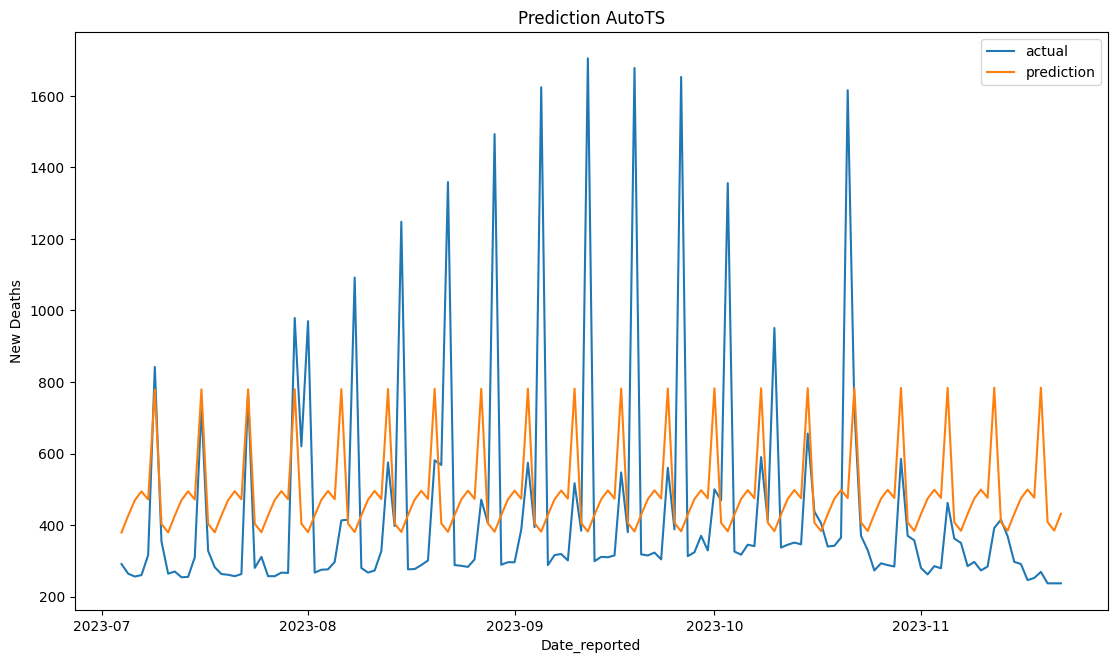

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], prediction.forecast[target_column], label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [21]:
non_zero = []
import sys
 
for i in prediction.forecast[target_column]:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column])

Evaluation Metrics:
MSE: 119080.05
RMSE: 345.08
MAE: 225.56
MAPE: 50.09
SMAPE: 43.14
